## Problem Statement

### Context

As an analyst at ABC Estate Wines, we are presented with historical data encompassing the sales of different types of wines throughout the 20th century. These datasets originate from the same company but represent sales figures for distinct wine varieties. Our objective is to delve into the data, analyze trends, patterns, and factors influencing wine sales over the course of the century. By leveraging data analytics and forecasting techniques, we aim to gain actionable insights that can inform strategic decision-making and optimize sales strategies for the future.

### Objective:

The primary objective of this project is to analyze and forecast wine sales trends for the 20th century based on historical data provided by ABC Estate Wines. We aim to equip ABC Estate Wines with the necessary insights and foresight to enhance sales performance, capitalize on emerging market opportunities, and maintain a competitive edge in the wine industry.


# Importing necessary libraries

In [65]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# To display multiple dataframes from one cell
from IPython.display import display

# To perform decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# To build a logistic regression model
from sklearn.linear_model import LinearRegression

#To build exponential smoothening models
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# To visualize ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# To build ARIMA model
from statsmodels.tsa.arima.model import ARIMA

#  To perform date arithmetic, allowing easy calculations and manipulations
from dateutil.relativedelta import relativedelta


# To evaluate the performance of the model
from sklearn.metrics import mean_squared_error

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

# Loading the data

In [66]:
# run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')
# drive already mounted if mounted

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
dfr = pd.read_csv('/content/drive/MyDrive/Python Course/Rose.csv') ##  Fill the blank to read the data


In [68]:
dfs = pd.read_csv('/content/drive/MyDrive/Python Course/Sparkling.csv') ##  Fill the blank to read the data

# Data Overview

In [69]:
dfr.head(5) #Complete the code to view first 5 rows of the data

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [70]:
dfs.head(5)

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [71]:
dfr.tail(5) #Complete the code to view last 5 rows of the data

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [72]:
dfs.tail(5) #Complete the code to view last 5 rows of the data

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [73]:
dfr.shape ##  Complete the code to view dimensions of the data
print("no. of rows: ",dfr.shape[0], "\n""no. of columns: ",dfr.shape[1])

no. of rows:  187 
no. of columns:  2


In [74]:
dfs.shape ##  Complete the code to view dimensions of the data
print("no. of rows: ",dfs.shape[0], "\n""no. of columns: ",dfs.shape[1])

no. of rows:  187 
no. of columns:  2


In [75]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [76]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [77]:
dfr.describe().T ##  Complete the code to print the statistical summary of the data

count       mean        std   min   25%   50%    75%    max
Rose  185.0  90.394595  39.175344  28.0  63.0  86.0  112.0  267.0

In [78]:
dfs.describe().T ##  Complete the code to print the statistical summary of the data

count         mean         std     min     25%     50%     75%  \
Sparkling  187.0  2402.417112  1295.11154  1070.0  1605.0  1874.0  2549.0   

              max  
Sparkling  7242.0

In [79]:
#df.'_______' #Check for null values
dfr.isnull().sum()

YearMonth    0
Rose         2
dtype: int64

In [80]:
#df.'_______' #Check for null values
dfs.isnull().sum()

YearMonth    0
Sparkling    0
dtype: int64

In [81]:
# Impute Missing Values
dfr=dfr.interpolate()

In [82]:
dfr.isnull().sum()

YearMonth    0
Rose         0
dtype: int64

#Rose Time Series

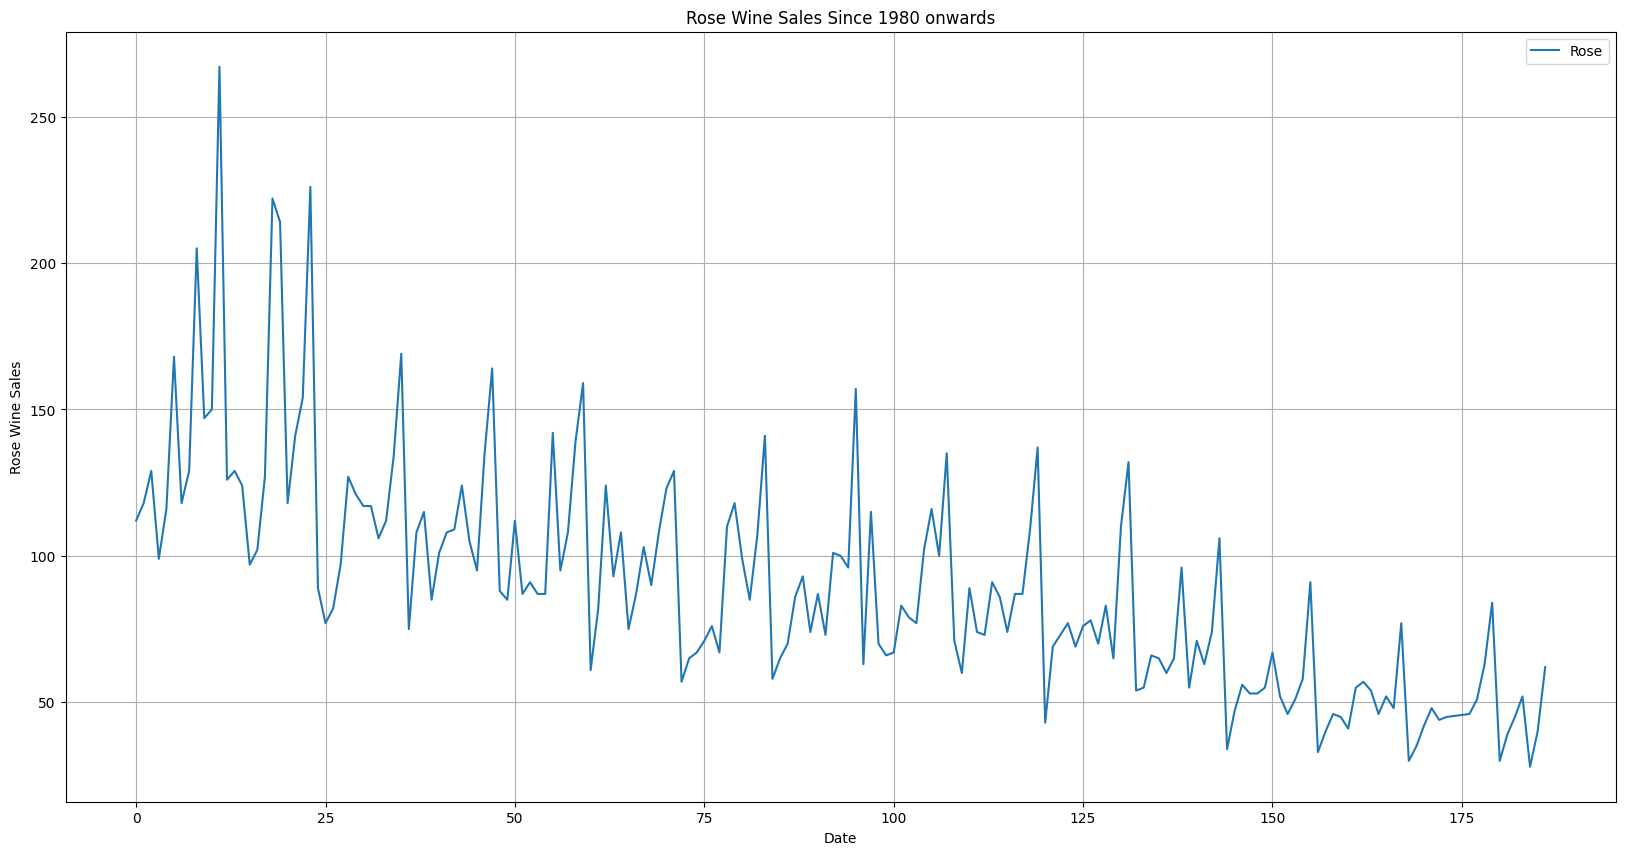

In [83]:
dfr.plot(figsize=(20,10))
plt.title('Rose Wine Sales Since 1980 onwards')
plt.xlabel('Date')
plt.ylabel('Rose Wine Sales')
plt.grid()

#Sparkling Time Series

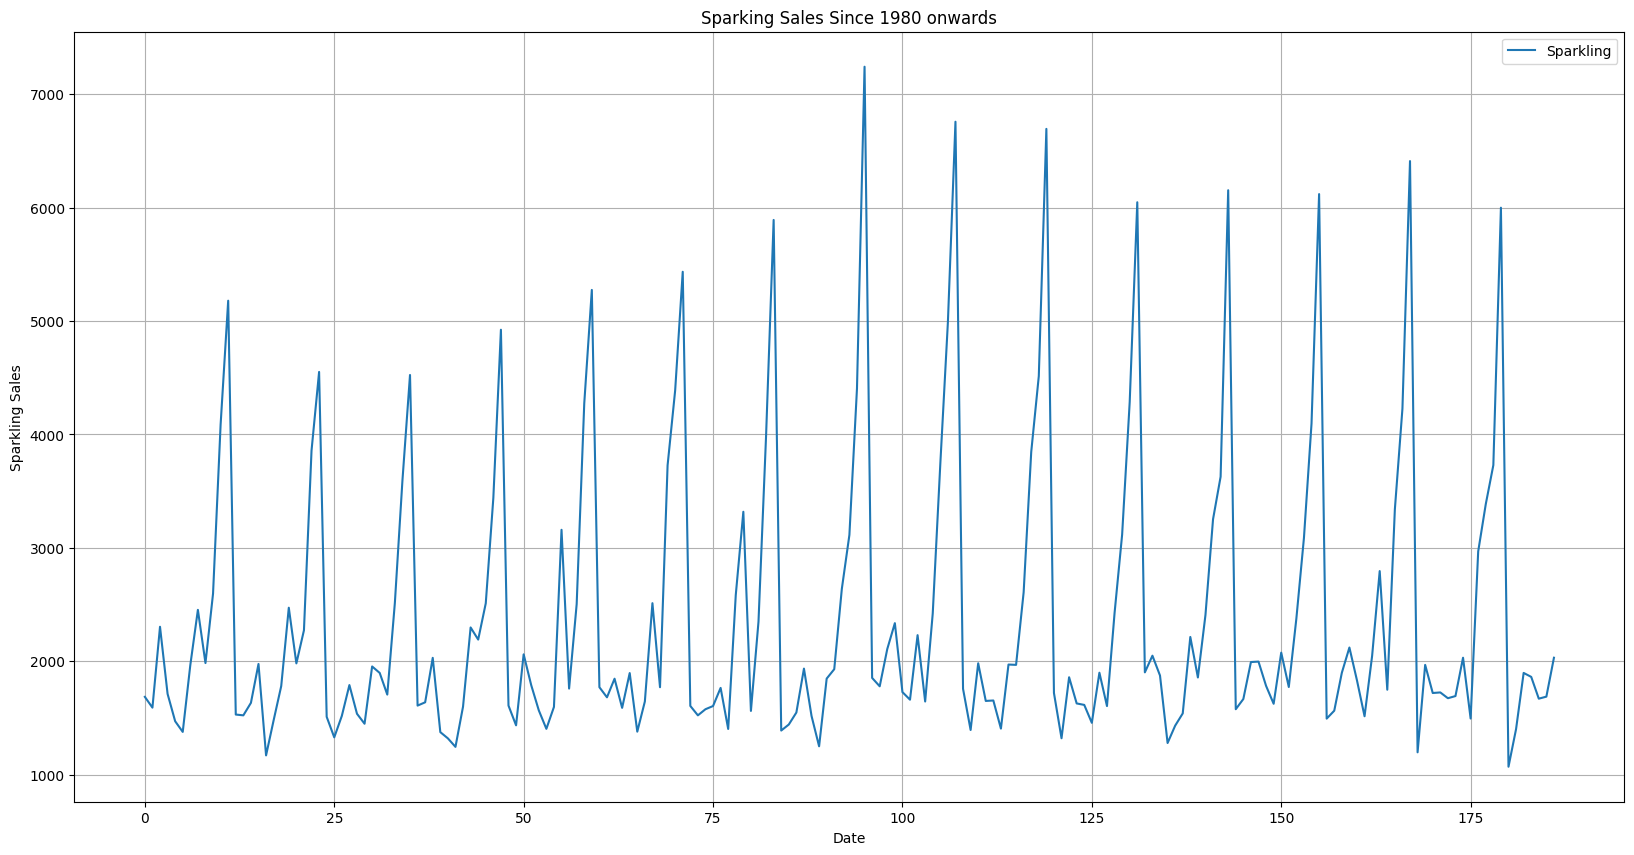

In [84]:
dfs.plot(figsize=(20,10))
plt.title('Sparking Sales Since 1980 onwards')
plt.xlabel('Date')
plt.ylabel('Sparkling Sales')
plt.grid()

##Check the basic measures of descriptive
##statistics of the Time Series

In [85]:
round(dfr.describe().T,3).to_csv('rose_describe.csv')
round(dfr.describe().T,3)

count    mean     std   min   25%   50%    75%    max
Rose  187.0  89.914  39.238  28.0  62.5  85.0  111.0  267.0

In [86]:
round(dfs.describe().T,3).to_csv('spark_describe.csv')
round(dfs.describe().T,3)

count      mean       std     min     25%     50%     75%     max
Sparkling  187.0  2402.417  1295.112  1070.0  1605.0  1874.0  2549.0  7242.0

## Date Range of Wine Sales

In [87]:
# Date Range of Rose Wine Sales
dfr.loc[:,"YearMonth"][0] , dfr.loc[:,"YearMonth"][len(dfr)-1]


('1980-01', '1995-07')

In [88]:
# Date Range of Sparkling Wine Sales
dfs.loc[:,"YearMonth"][0] , dfs.loc[:,"YearMonth"][len(dfs)-1]

('1980-01', '1995-07')

In [89]:
date=pd.date_range(start='1/1/1980',end='8/1/1995',freq='M')

In [90]:
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [91]:
dfr.head(5)

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [92]:
dfr['Month']=date
dfr.drop("YearMonth",axis=1,inplace=True)
dfr=dfr.set_index('Month')
dfr.head()

Rose
Month            
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [93]:
dfs.head(5)

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [94]:
dfs['Month']=date
dfs.drop("YearMonth",axis=1,inplace=True)
dfs=dfs.set_index('Month')
dfs.head()

Sparkling
Month                
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [95]:
dfs.head(5)

Sparkling
Month                
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

# EDA (Exploratatory Data Analysis)

#Plot Box-plot Monthwise

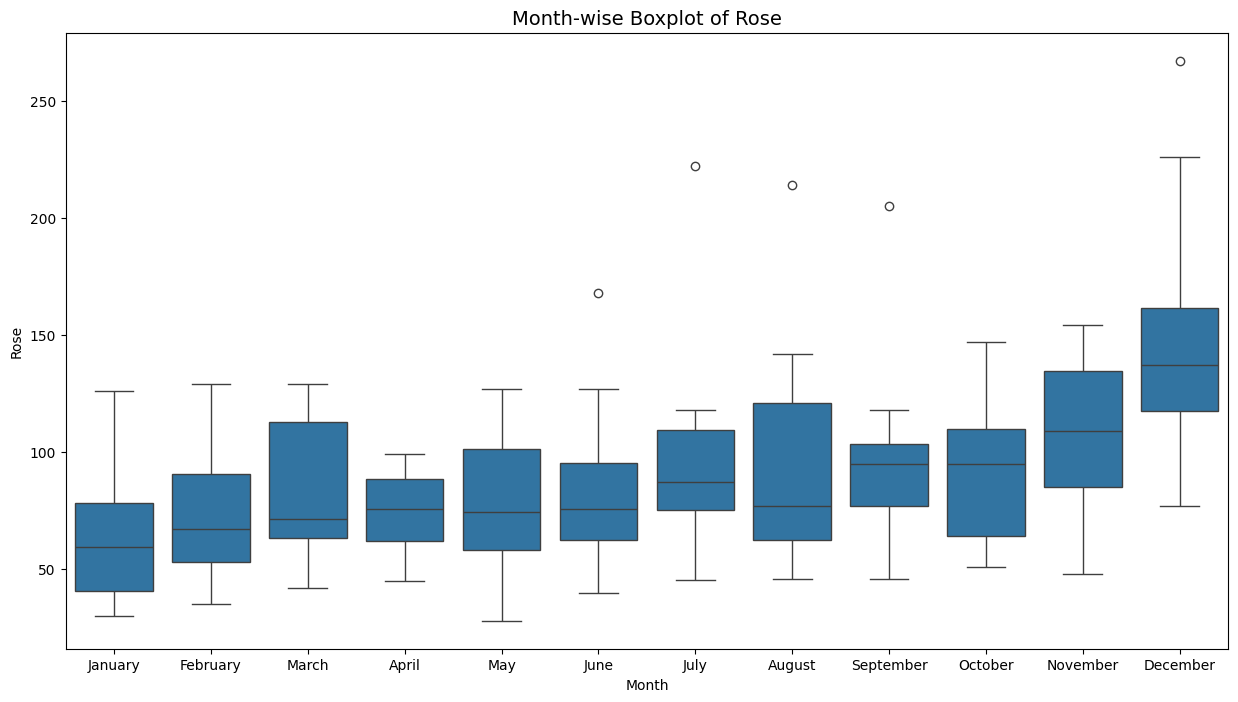

In [96]:
_,ax=plt.subplots(figsize=(15,8))
sns.boxplot(x = dfr.index.month_name(), y = dfr['Rose']);
#plt.grid();
plt.title('Month-wise Boxplot of Rose', fontsize=14);
#plt.savefig('rose_monthwise_box.jpg', bbox_inches='tight');

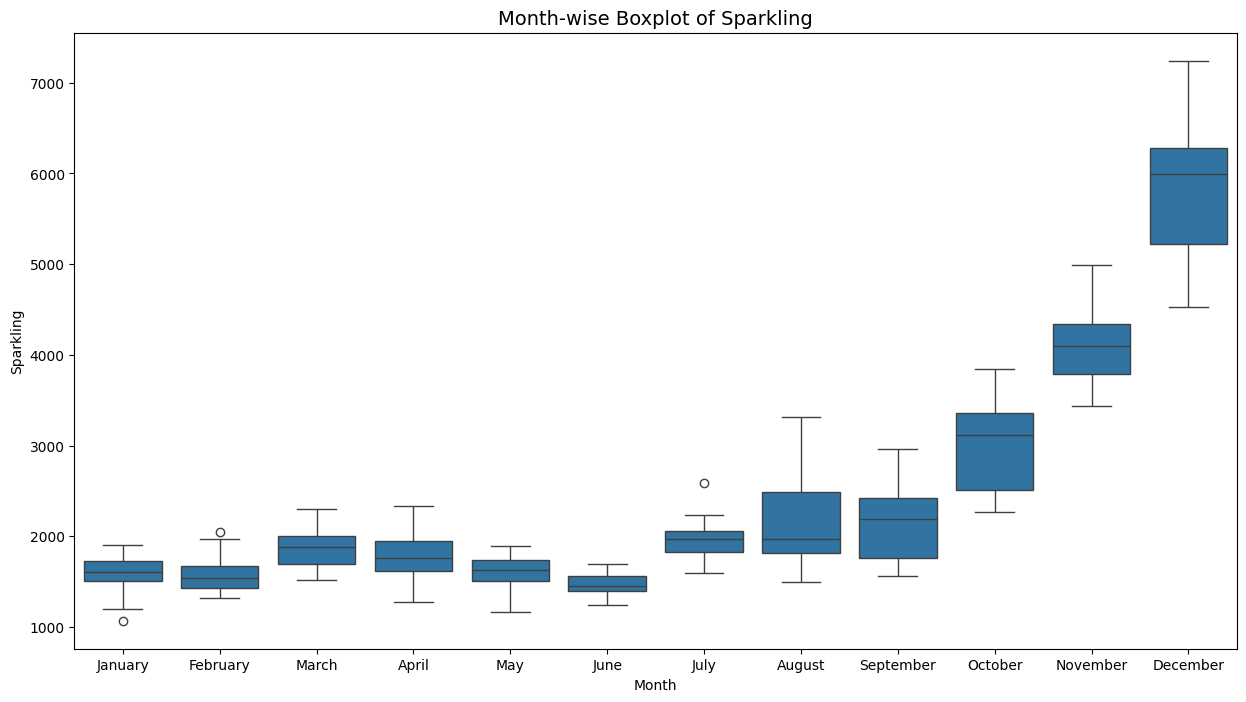

In [97]:
_,ax=plt.subplots(figsize=(15,8))
sns.boxplot(x = dfs.index.month_name(), y = dfs['Sparkling']);
#plt.grid();
plt.title('Month-wise Boxplot of Sparkling', fontsize=14);
#plt.savefig('rose_monthwise_box.jpg', bbox_inches='tight');

In [98]:
monthly_sales_across_years = pd.pivot_table(dfr, values = 'Rose', columns = dfr.index.month_name(), index = dfr.index.year)
monthly_sales_across_years

Month  April      August  December  February  January        July   June  \
Month                                                                      
1980    99.0  129.000000     267.0     118.0    112.0  118.000000  168.0   
1981    97.0  214.000000     226.0     129.0    126.0  222.000000  127.0   
1982    97.0  117.000000     169.0      77.0     89.0  117.000000  121.0   
1983    85.0  124.000000     164.0     108.0     75.0  109.000000  108.0   
1984    87.0  142.000000     159.0      85.0     88.0   87.000000   87.0   
1985    93.0  103.000000     129.0      82.0     61.0   87.000000   75.0   
1986    71.0  118.000000     141.0      65.0     57.0  110.000000   67.0   
1987    86.0   73.000000     157.0      65.0     58.0   87.000000   74.0   
1988    66.0   77.000000     135.0     115.0     63.0   79.000000   83.0   
1989    74.0   74.000000     137.0      60.0     71.0   86.000000   91.0   
1990    77.0   70.000000     132.0      69.0     43.0   78.000000   76.0   
1991    65.0   55.000000     106.0      55.0     54.0   96.000000   65.0   
1992    53.0   52.000000      91.0      47.0     34.0   67.000000   55.0   
1993    45.0   54.000000      77.0      40.0     33.0   57.000000   55.0   
1994    48.0   45.666667      84.0      35.0     30.0   45.333333   45.0   
1995    52.0         NaN       NaN      39.0     30.0   62.000000   40.0   

Month  March    May  November  October  September  
Month                                              
1980   129.0  116.0     150.0    147.0      205.0  
1981   124.0  102.0     154.0    141.0      118.0  
1982    82.0  127.0     134.0    112.0      106.0  
1983   115.0  101.0     135.0     95.0      105.0  
1984   112.0   91.0     139.0    108.0       95.0  
1985   124.0  108.0     123.0    108.0       90.0  
1986    67.0   76.0     107.0     85.0       99.0  
1987    70.0   93.0      96.0    100.0      101.0  
1988    70.0   67.0     100.0    116.0      102.0  
1989    89.0   73.0     109.0     87.0       87.0  
1990    73.0   69.0     110.0     65.0       83.0  
1991    66.0   60.0      74.0     63.0       71.0  
1992    56.0   53.0      58.0     51.0       46.0  
1993    46.0   41.0      48.0     52.0       46.0  
1994    42.0   44.0      63.0     51.0       46.0  
1995    45.0   28.0       NaN      NaN        NaN

Text(0.5, 1.0, 'Monthly sales of Rose Wine over years')

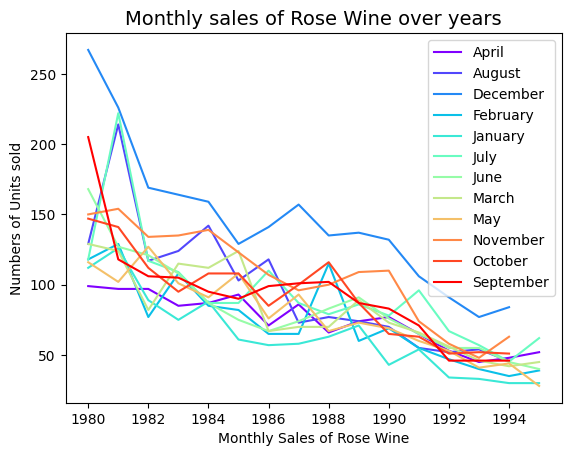

In [99]:
plt.figure.figsize=(20,12)
monthly_sales_across_years.plot(colormap='rainbow')
plt.legend(loc='best')
plt.ylabel('Numbers of Units sold')
plt.xlabel('Monthly Sales of Rose Wine')
plt.title('Monthly sales of Rose Wine over years', fontsize=14)

In [100]:
monthly_sales_across_years_spark = pd.pivot_table(dfs, values = 'Sparkling', columns = dfs.index.month_name(), index = dfs.index.year)
monthly_sales_across_years_spark

Month   April  August  December  February  January    July    June   March  \
Month                                                                        
1980   1712.0  2453.0    5179.0    1591.0   1686.0  1966.0  1377.0  2304.0   
1981   1976.0  2472.0    4551.0    1523.0   1530.0  1781.0  1480.0  1633.0   
1982   1790.0  1897.0    4524.0    1329.0   1510.0  1954.0  1449.0  1518.0   
1983   1375.0  2298.0    4923.0    1638.0   1609.0  1600.0  1245.0  2030.0   
1984   1789.0  3159.0    5274.0    1435.0   1609.0  1597.0  1404.0  2061.0   
1985   1589.0  2512.0    5434.0    1682.0   1771.0  1645.0  1379.0  1846.0   
1986   1605.0  3318.0    5891.0    1523.0   1606.0  2584.0  1403.0  1577.0   
1987   1935.0  1930.0    7242.0    1442.0   1389.0  1847.0  1250.0  1548.0   
1988   2336.0  1645.0    6757.0    1779.0   1853.0  2230.0  1661.0  2108.0   
1989   1650.0  1968.0    6694.0    1394.0   1757.0  1971.0  1406.0  1982.0   
1990   1628.0  1605.0    6047.0    1321.0   1720.0  1899.0  1457.0  1859.0   
1991   1279.0  1857.0    6153.0    2049.0   1902.0  2214.0  1540.0  1874.0   
1992   1997.0  1773.0    6119.0    1667.0   1577.0  2076.0  1625.0  1993.0   
1993   2121.0  2795.0    6410.0    1564.0   1494.0  2048.0  1515.0  1898.0   
1994   1725.0  1495.0    5999.0    1968.0   1197.0  2031.0  1693.0  1720.0   
1995   1862.0     NaN       NaN    1402.0   1070.0  2031.0  1688.0  1897.0   

Month     May  November  October  September  
Month                                        
1980   1471.0    4087.0   2596.0     1984.0  
1981   1170.0    3857.0   2273.0     1981.0  
1982   1537.0    3593.0   2514.0     1706.0  
1983   1320.0    3440.0   2511.0     2191.0  
1984   1567.0    4273.0   2504.0     1759.0  
1985   1896.0    4388.0   3727.0     1771.0  
1986   1765.0    3987.0   2349.0     1562.0  
1987   1518.0    4405.0   3114.0     2638.0  
1988   1728.0    4988.0   3740.0     2421.0  
1989   1654.0    4514.0   3845.0     2608.0  
1990   1615.0    4286.0   3116.0     2424.0  
1991   1432.0    3627.0   3252.0     2408.0  
1992   1783.0    4096.0   3088.0     2377.0  
1993   1831.0    4227.0   3339.0     1749.0  
1994   1674.0    3729.0   3385.0     2968.0  
1995   1670.0       NaN      NaN        NaN

Text(0.5, 1.0, 'Monthly sales of Sparkling Wine over years')

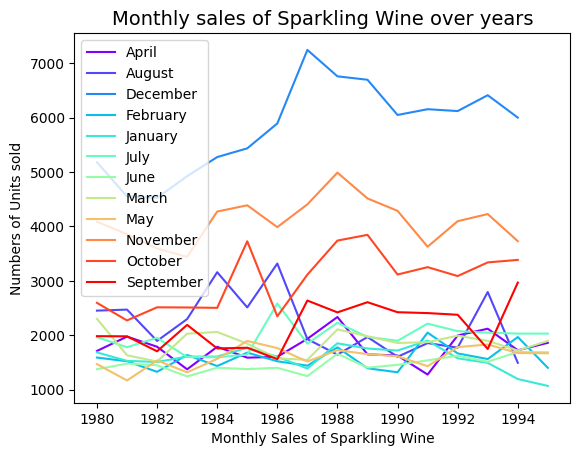

In [101]:
plt.figure.figsize=(20,12)
monthly_sales_across_years_spark.plot(colormap='rainbow')
plt.legend(loc='best')
plt.ylabel('Numbers of Units sold')
plt.xlabel('Monthly Sales of Sparkling Wine')
plt.title('Monthly sales of Sparkling Wine over years', fontsize=14)

## Decompose the Time Series and plot the different components

### Additive Decomposition of Rose

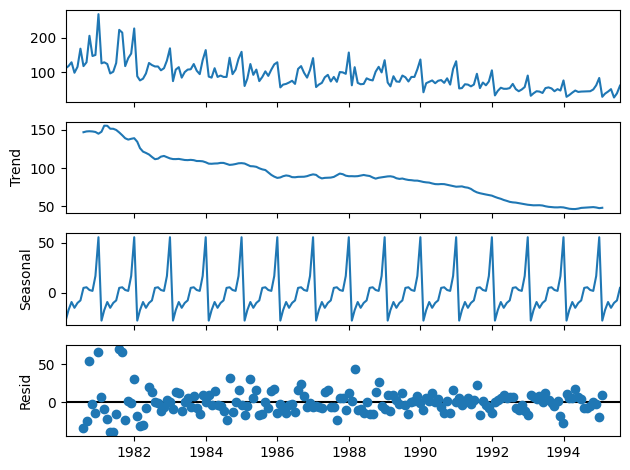

In [102]:
decompositionr = seasonal_decompose(dfr,model='additive')
decompositionr.plot()
plt.savefig('decomposer.jpg', bbox_inches='tight');

In [103]:
trend = decompositionr.trend
seasonality = decompositionr.seasonal
residual = decompositionr.resid
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')
trend.head(12).to_csv('rose_trend.csv')
seasonality.head(12).to_csv('rose_season.csv')
residual.head(12).to_csv('rose_resid.csv')

Trend 
 Month
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Month
1980-01-31   -27.908647
1980-02-29   -17.435632
1980-03-31    -9.285830
1980-04-30   -15.098330
1980-05-31   -10.196544
1980-06-30    -7.678687
1980-07-31     4.896908
1980-08-31     5.499686
1980-09-30     2.774686
1980-10-31     1.871908
1980-11-30    16.846908
1980-12-31    55.713575
Name: seasonal, dtype: float64 

Residual 
 Month
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980241
1980-08-31   -24.624686
1980-09-30    53.850314
1980-10-31    -2.955241
1980-11-30   -14.263575
1980-12-31    66.161425
Name: resi

<Axes: xlabel='Month'>

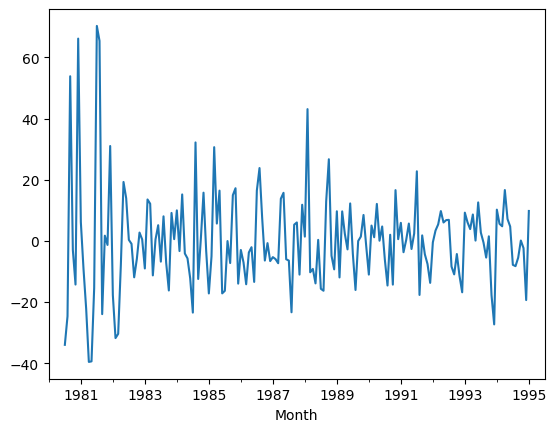

In [104]:
residual.plot()

### Additive Decomposition of Sparkling

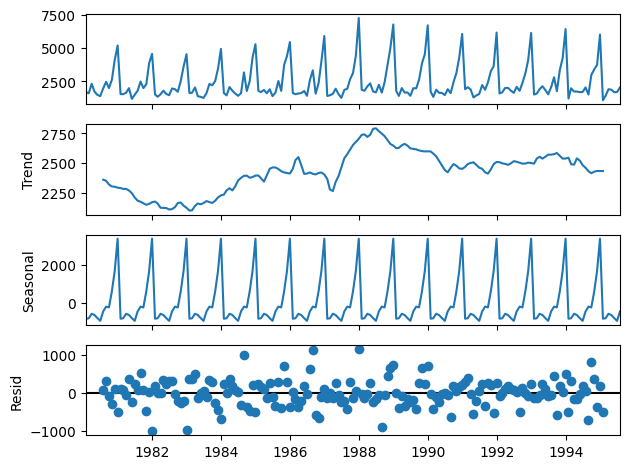

In [105]:
decompositions = seasonal_decompose(dfs,model='additive')
decompositions.plot();
plt.savefig('decomposes.jpg', bbox_inches='tight');


In [106]:
trend = decompositions.trend
seasonality = decompositions.seasonal
residual = decompositions.resid
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')
trend.head(12).to_csv('spark_trend.csv')
seasonality.head(12).to_csv('spark_season.csv')
residual.head(12).to_csv('spark_resid.csv')

Trend 
 Month
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Month
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Month
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.353290
1980-11-30  

In [107]:
cvsa = residual.std()/residual.mean()
cvsa

-296.0833529414326

###Multiplicative Decomposition of Rose

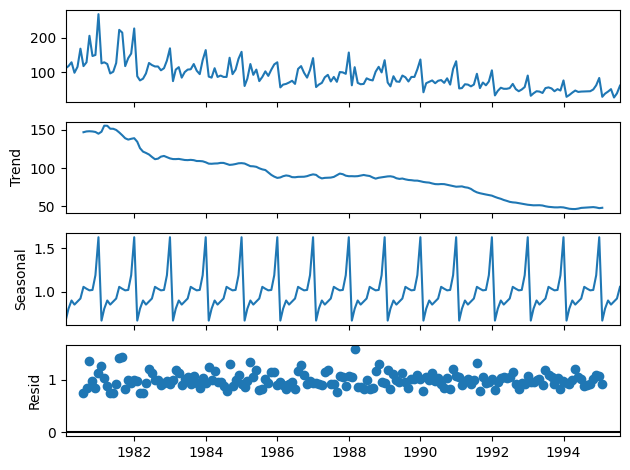

In [108]:
decompositionmr = seasonal_decompose(dfr,model='multiplicative')
decompositionmr.plot();
plt.savefig('decomposemr.jpg', bbox_inches='tight');

In [109]:
trend = decompositionmr.trend
seasonality = decompositionmr.seasonal
residual = decompositionmr.resid
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')
trend.head(12).to_csv('rose_trend_m.csv')
seasonality.head(12).to_csv('rose_season_m.csv')
residual.head(12).to_csv('rose_resid_m.csv')

Trend 
 Month
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Month
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901164
1980-04-30    0.854024
1980-05-31    0.889415
1980-06-30    0.923985
1980-07-31    1.058038
1980-08-31    1.035881
1980-09-30    1.017648
1980-10-31    1.022573
1980-11-30    1.192349
1980-12-31    1.628646
Name: seasonal, dtype: float64 

Residual 
 Month
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758258
1980-08-31    0.840720
1980-09-30    1.357674
1980-10-31    0.970771
1980-11-30    0.853378
1980-12-31    1.129646
Name: resid, dtype: float64 



<Axes: xlabel='Month'>

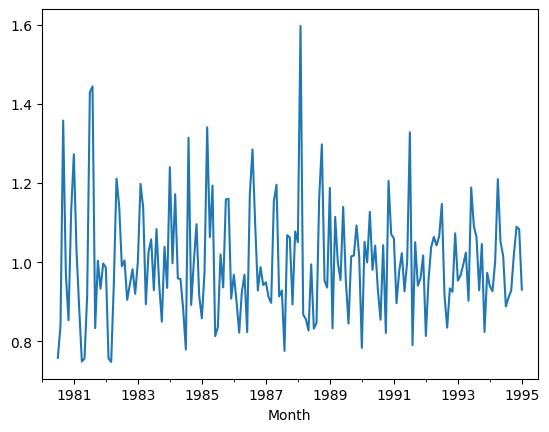

In [110]:
residual.plot()

### For the multiplicative series, we see that a lot of residuals are located around 1.

### Multiplicative Decomposition of Sparkling


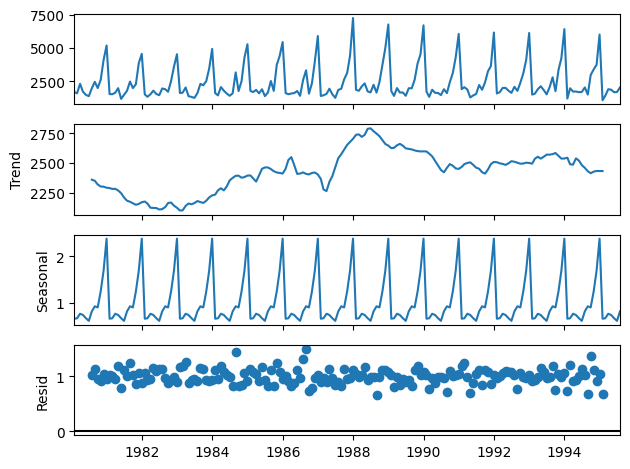

In [111]:
decompositionms = seasonal_decompose(dfs,model='multiplicative')
decompositionms.plot();
plt.savefig('decomposems.jpg', bbox_inches='tight');

In [112]:
trend = decompositionms.trend
seasonality = decompositionms.seasonal
residual = decompositionms.resid
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')
trend.head(12).to_csv('spark_trend_m.csv')
seasonality.head(12).to_csv('spark_season_m.csv')
residual.head(12).to_csv('spark_resid_m.csv')


Trend 
 Month
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Month
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Month
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: resid, dtype: fl

In [113]:

cvsm = residual.std()/residual.mean()
cvsm


0.13886244212828966

##Split the data into train and test and plot the training and test data. [Test Data should start from 1991]

In [114]:
# ROSE DATA SPLIT
rtrain = dfr[dfr.index<'1991']
rtest = dfr[dfr.index>='1991']


In [115]:
# SPARKLING DATA SPLIT
strain = dfs[dfs.index<'1991']
stest = dfs[dfs.index>='1991']

In [116]:
print(rtrain.shape)
print(rtest.shape)

(132, 1)
(55, 1)


In [117]:
print(strain.shape)
print(stest.shape)

(132, 1)
(55, 1)


In [118]:
# ROSE DATA TRAIN AND TEST
print('First few rows of Rose Training Data')
display(rtrain.head())
print('Last few rows of Rose Training Data')
display(rtrain.tail())
print('First few rows of Rose Test Data')
display(rtest.head())
print('Last few rows of Rose Test Data')
display(rtest.tail())
rtrain.to_csv('rose_train.csv')
rtest.to_csv('rose_test.csv')


First few rows of Rose Training Data


Rose
Month            
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

Last few rows of Rose Training Data


Rose
Month            
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

First few rows of Rose Test Data


Rose
Month           
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0

Last few rows of Rose Test Data


Rose
Month           
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0

In [119]:
# SPARKLING DATA TRAIN AND TEST
print('First few rows of Sparkling Training Data')
display(strain.head())
print('Last few rows of Sparkling Training Data')
display(strain.tail())
print('First few rows of Sparkling Test Data')
display(stest.head())
print('Last few rows of Sparkling Test Data')
display(stest.tail())
strain.to_csv('spark_train.csv')
stest.to_csv('spark_test.csv')


First few rows of Sparkling Training Data


Sparkling
Month                
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Last few rows of Sparkling Training Data


Sparkling
Month                
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

First few rows of Sparkling Test Data


Sparkling
Month                
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

Last few rows of Sparkling Test Data


Sparkling
Month                
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

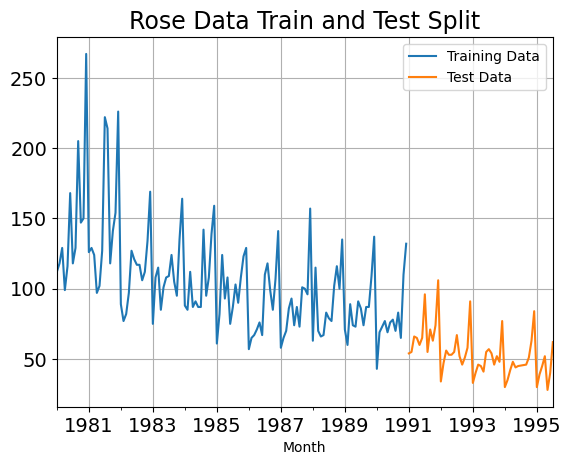

In [120]:
# ROSE DATA TRAIN TEST SPLIT TIME SERIES
rtrain['Rose'].plot(fontsize=14)
rtest['Rose'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Rose Data Train and Test Split', fontsize=17)
plt.savefig('rose_split_ts.jpg', bbox_inches='tight')
plt.show();

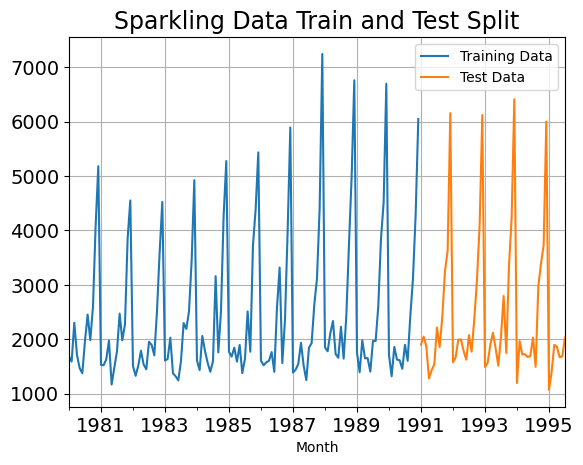

In [121]:
# SPARKLING DATA TRAIN TEST SPLIT TIME SERIES
strain['Sparkling'].plot(fontsize=14)
stest['Sparkling'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Sparkling Data Train and Test Split', fontsize=17)
plt.savefig('spark_split_ts.jpg', bbox_inches='tight')
plt.show()

#Building different models and comparing the accuracy metrics.

## Model 1: Linear Regression on Rose

###For this particular linear regression, we are going to regress the 'Rose' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.


In [122]:
rtrain.shape
rtest.shape

(55, 1)

In [123]:
train_time = [i+1 for i in range(len(rtrain))]
test_time = [i+133 for i in range(len(rtest))]
print('Training Time Instance :','\n',train_time)
print('Test Time Instance :','\n',test_time)

Training Time Instance : 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time Instance : 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [124]:
LinearRegression_train = rtrain.copy()
LinearRegression_test = rtest.copy()


In [125]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time
print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Rose  time
Month                  
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5

Last few rows of Training Data


Rose  time
Month                  
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132

First few rows of Test Data


Rose  time
Month                 
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137

Last few rows of Test Data


Rose  time
Month                 
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187

Now that our training and test data has been modified, let us go ahead use
LinearRegression() to build the model on the training data and test the model on
the test data.



In [126]:
lr = LinearRegression()

In [127]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])


LinearRegression()

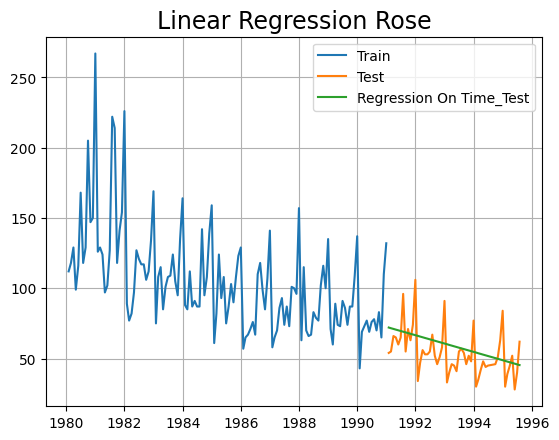

In [128]:
train_predictions_model1 = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1
import matplotlib.pyplot as plt

plt.plot(rtrain['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test')
plt.title('Linear Regression Rose', fontsize=17)
plt.legend(loc='best')
plt.grid();
plt.savefig('lr_rose.jpg', bbox_inches='tight');

Defining the functions for calculating the accuracy metrics.

In [129]:
rmse_model11_test = metrics.mean_squared_error(rtest['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model11_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269 


In [130]:
resultsDf = pd.DataFrame({'Test RMSE Rose': [rmse_model11_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE Rose
RegressionOnTime       15.268955

##Model 1: Linear Regression Sparkling

In [131]:
train_time = [i+1 for i in range(len(strain))]
test_time = [i+133 for i in range(len(stest))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [132]:
LinearRegression_train = strain.copy()
LinearRegression_test = stest.copy()

In [133]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Sparkling  time
Month                      
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5

Last few rows of Training Data


Sparkling  time
Month                      
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132

First few rows of Test Data


Sparkling  time
Month                      
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137

Last few rows of Test Data


Sparkling  time
Month                      
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187

Now that our training and test data has been modified, let us go ahead use  Linear Regression to build the model on the training data and test the model on the test data.

In [134]:
lr = LinearRegression()

In [135]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

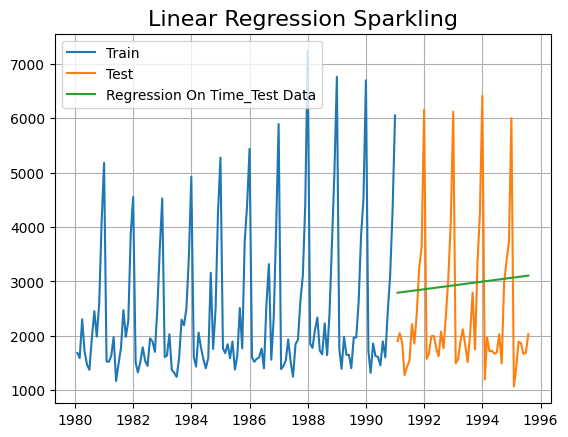

In [136]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot(strain['Sparkling'], label='Train')
plt.plot(stest['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.title('Linear Regression Sparkling', fontsize=16)
plt.grid();
plt.savefig('spark_lr.jpg', bbox_inches='tight');

### Defining the functions for calculating the accuracy metrics.

In [137]:
rmse_model12_test = metrics.mean_squared_error(stest['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model12_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 


In [138]:
resultsDf_12 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model12_test]},index=['RegressionOnTime'])

resultsDf = pd.merge(resultsDf, resultsDf_12, left_index=True, right_index=True)
resultsDf.to_csv('results_lr.csv')
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       15.268955          1389.135175

##Model 2: Naive Approach Rose

### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [139]:
NaiveModel_train = rtrain.copy()
NaiveModel_test = rtest.copy()

In [140]:
rtrain.tail()

Rose
Month            
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

In [141]:
NaiveModel_test['naive'] = np.asarray(rtrain['Rose'])[len(np.asarray(rtrain['Rose']))-1]
NaiveModel_test['naive'].head()

Month
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

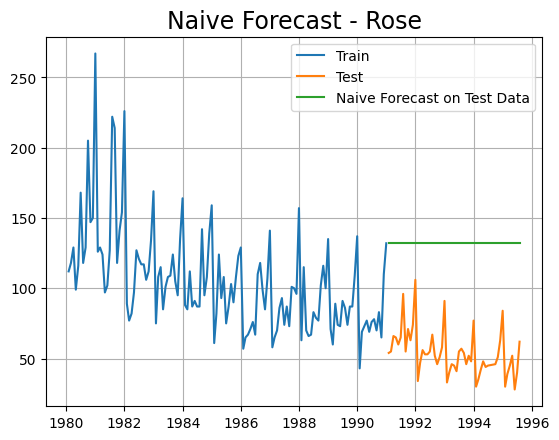

In [142]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast - Rose", fontsize=17)
plt.grid();
plt.savefig('rose_naive.jpg', bbox_inches='tight');

## Model Evaluation

In [143]:
rmse_model21_test = metrics.mean_squared_error(rtest['Rose'],NaiveModel_test['naive'],squared=False)
print("For NaiveModel forecast on the Test Data,  RMSE is %3.3f" %(rmse_model21_test))

For NaiveModel forecast on the Test Data,  RMSE is 79.719


In [144]:
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       15.268955          1389.135175

In [145]:
resultsDf_21 = pd.DataFrame({'Test RMSE Rose': [rmse_model21_test]},index=['NaiveModel'])

## Model 2: Naive Approach Sparkling

### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [146]:
NaiveModel_train = strain.copy()
NaiveModel_test = stest.copy()

In [147]:
strain.tail()

Sparkling
Month                
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

In [148]:
NaiveModel_test['naive'] = np.asarray(strain['Sparkling'])[len(np.asarray(strain['Sparkling']))-1]
NaiveModel_test['naive'].head()

Month
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

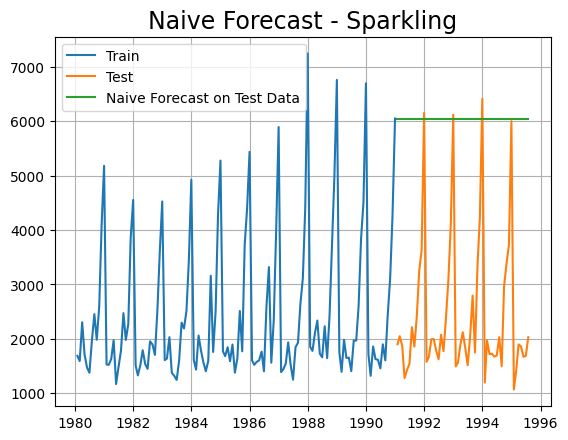

In [149]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(stest['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast - Sparkling", fontsize=17)
plt.grid();
plt.savefig('Sparkling_naive.jpg', bbox_inches='tight');

### Model Evaluation

In [150]:
rmse_model22_test = metrics.mean_squared_error(stest['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For NaiveModel forecast on the Test Data,  RMSE is %3.3f" %(rmse_model22_test))

For NaiveModel forecast on the Test Data,  RMSE is 3864.279


In [151]:
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       15.268955          1389.135175

In [152]:
resultsDf_21

Test RMSE Rose
NaiveModel       79.718773

In [153]:
resultsDf_22 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model22_test]},index=['NaiveModel'])
resultsDf1 = resultsDf_21.join(resultsDf_22, how='outer')
resultsDf1

Test RMSE Rose  Test RMSE Sparkling
NaiveModel       79.718773          3864.279352

In [154]:
resultsDf3 = pd.concat([resultsDf, resultsDf1], axis=0)
resultsDf3

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       15.268955          1389.135175
NaiveModel             79.718773          3864.279352

In [155]:
resultsDf = resultsDf3.copy()
resultsDf.to_csv('results_nb.csv')
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       15.268955          1389.135175
NaiveModel             79.718773          3864.279352

## Model 3: Simple Average Rose

For this particular simple average method, we will forecast by using the average of the training values.

In [156]:
SimpleAverage_train = rtrain.copy()
SimpleAverage_test = rtest.copy()

In [157]:
SimpleAverage_test['mean_forecast'] = rtrain['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
Month                          
1991-01-31  54.0     104.939394
1991-02-28  55.0     104.939394
1991-03-31  66.0     104.939394
1991-04-30  65.0     104.939394
1991-05-31  60.0     104.939394

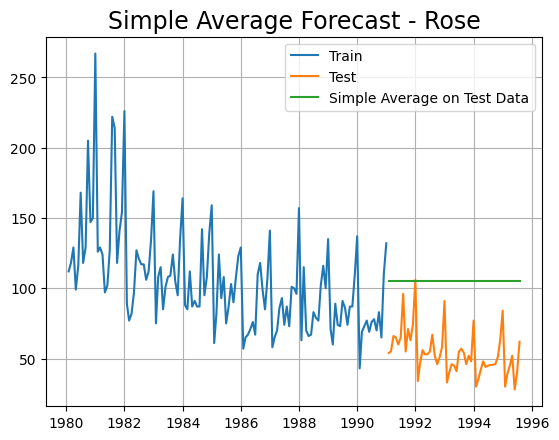

In [158]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast - Rose", fontsize=17)
plt.grid();
plt.savefig('rose_simpleaverage.jpg', bbox_inches='tight');

##Model Evaluation

In [159]:
rmse_model31_test = metrics.mean_squared_error(rtest['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on Rose Test Data,  RMSE is %3.3f" %(rmse_model31_test))

For Simple Average forecast on Rose Test Data,  RMSE is 53.461


In [160]:
resultsDf_31 = pd.DataFrame({'Test RMSE Rose': [rmse_model31_test]}
                           ,index=['SimpleAverageModel'])
resultsDf_31

Test RMSE Rose
SimpleAverageModel        53.46057

##Model 3: Simple Average Sparkling

For this particular simple average method, we will forecast by using the average of the training values.

In [161]:
SimpleAverage_train = strain.copy()
SimpleAverage_test = stest.copy()

In [162]:
SimpleAverage_test['mean_forecast'] = strain['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
Month                               
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

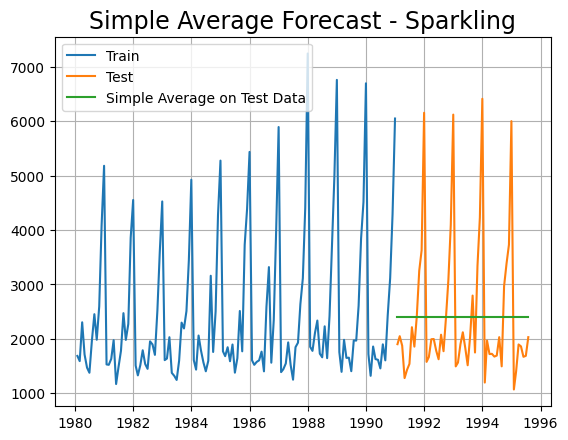

In [163]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast - Sparkling", fontsize=17)
plt.grid();
plt.savefig('Sparkling_simpleaverage.jpg', bbox_inches='tight');

##Model Evaluation

In [164]:
rmse_model32_test = metrics.mean_squared_error(stest['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on Sparkling Test Data,  RMSE is %3.3f" %(rmse_model32_test))

For Simple Average forecast on Sparkling Test Data,  RMSE is 1275.082


In [165]:
resultsDf_32 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model32_test]}
                           ,index=['SimpleAverageModel'])
resultsDf_32

Test RMSE Sparkling
SimpleAverageModel          1275.081804

In [166]:
resultsDf4 = resultsDf_31.join(resultsDf_32, how='outer')
resultsDf4

Test RMSE Rose  Test RMSE Sparkling
SimpleAverageModel        53.46057          1275.081804

In [167]:
resultsDf5 = pd.concat([resultsDf, resultsDf4], axis=0)
resultsDf5

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime         15.268955          1389.135175
NaiveModel               79.718773          3864.279352
SimpleAverageModel       53.460570          1275.081804

In [168]:
resultsDf = resultsDf5.copy()
resultsDf.to_csv('results_sa.csv')
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime         15.268955          1389.135175
NaiveModel               79.718773          3864.279352
SimpleAverageModel       53.460570          1275.081804

##Model 4: Moving Average(MA) - Rose

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

In [169]:
MovingAverage = dfr.copy()
MovingAverage.head()

Rose
Month            
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

### Trailing moving averages

In [170]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Month                                                            
1980-01-31  112.0         NaN         NaN         NaN         NaN
1980-02-29  118.0       115.0         NaN         NaN         NaN
1980-03-31  129.0       123.5         NaN         NaN         NaN
1980-04-30   99.0       114.0       114.5         NaN         NaN
1980-05-31  116.0       107.5       115.5         NaN         NaN

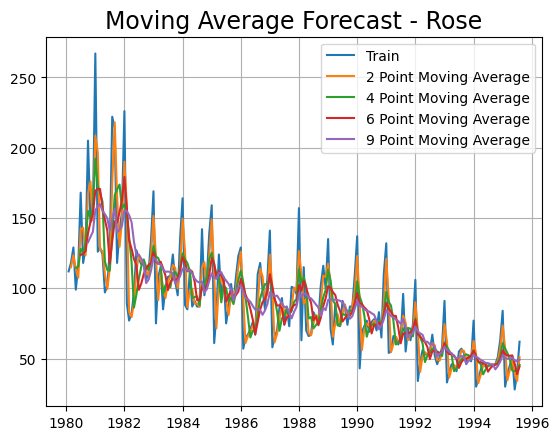

In [171]:
## Plotting on the whole data

plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Rose', fontsize=17)
plt.savefig('rose_ma.jpg', bbox_inches='tight');

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

### Creating train and test set

In [172]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991']
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

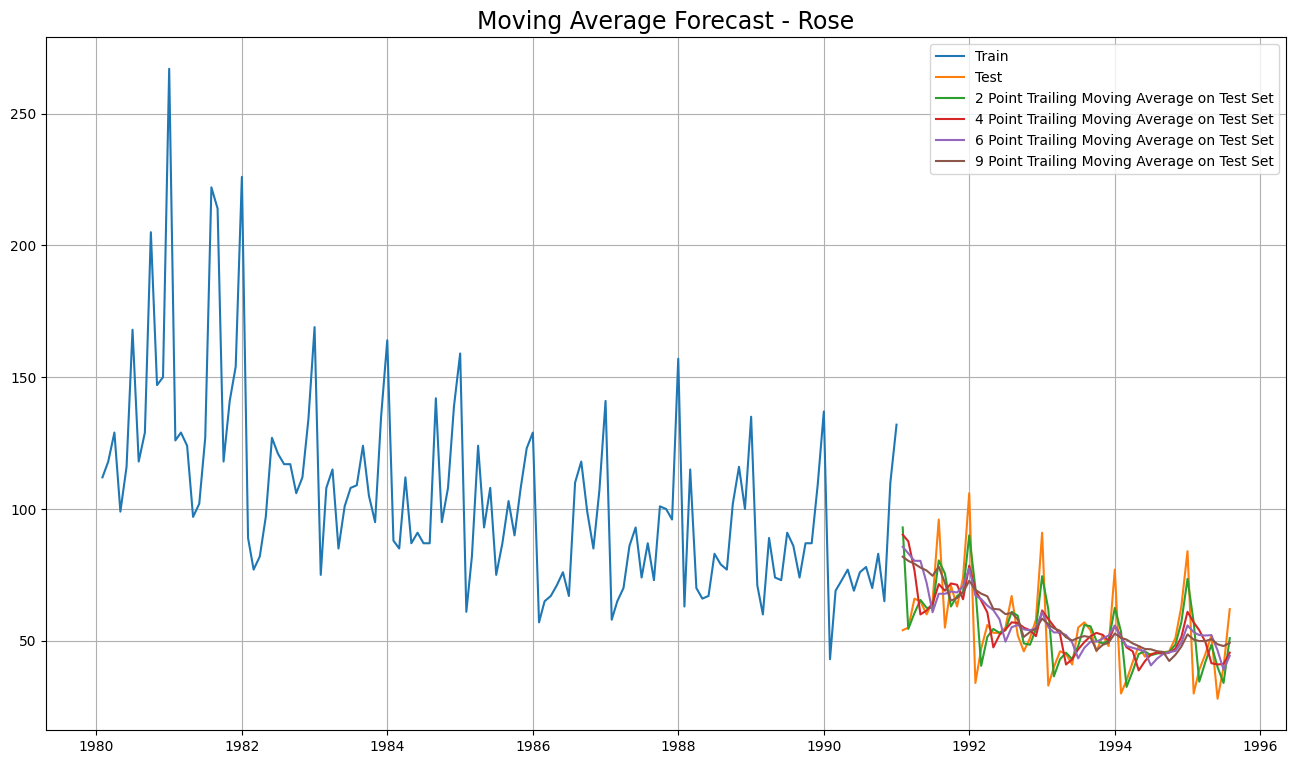

In [173]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Rose', fontsize=17);
plt.savefig('rose_ma_test.jpg', bbox_inches='tight');

### Model Evaluation
Done only on the test data.

In [174]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on Rose Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.728


In [175]:
resultsDf_41 = pd.DataFrame({'Test RMSE Rose': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf_41.to_csv('rose_ma.csv')
resultsDf_41

Test RMSE Rose
2pointTrailingMovingAverage       11.529278
4pointTrailingMovingAverage       14.451403
6pointTrailingMovingAverage       14.566327
9pointTrailingMovingAverage       14.727630

## Method 4: Moving Average(MA) - Sparkling

In [176]:
MovingAverage = dfs.copy()
MovingAverage.head()

Sparkling
Month                
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Trailing moving averages

In [177]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Month                                                                
1980-01-31       1686         NaN         NaN         NaN         NaN
1980-02-29       1591      1638.5         NaN         NaN         NaN
1980-03-31       2304      1947.5         NaN         NaN         NaN
1980-04-30       1712      2008.0     1823.25         NaN         NaN
1980-05-31       1471      1591.5     1769.50         NaN         NaN

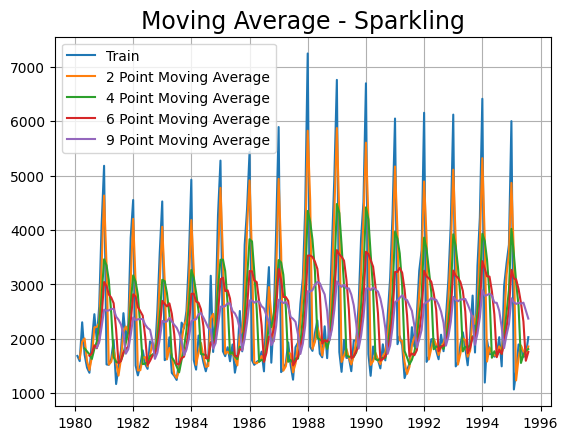

In [178]:
## Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average - Sparkling', fontsize=17)
plt.savefig('spark_ma.jpg', bbox_inches='tight');

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

### Split the Data into Train and Test

In [179]:
#Creating train and test set
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991']
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

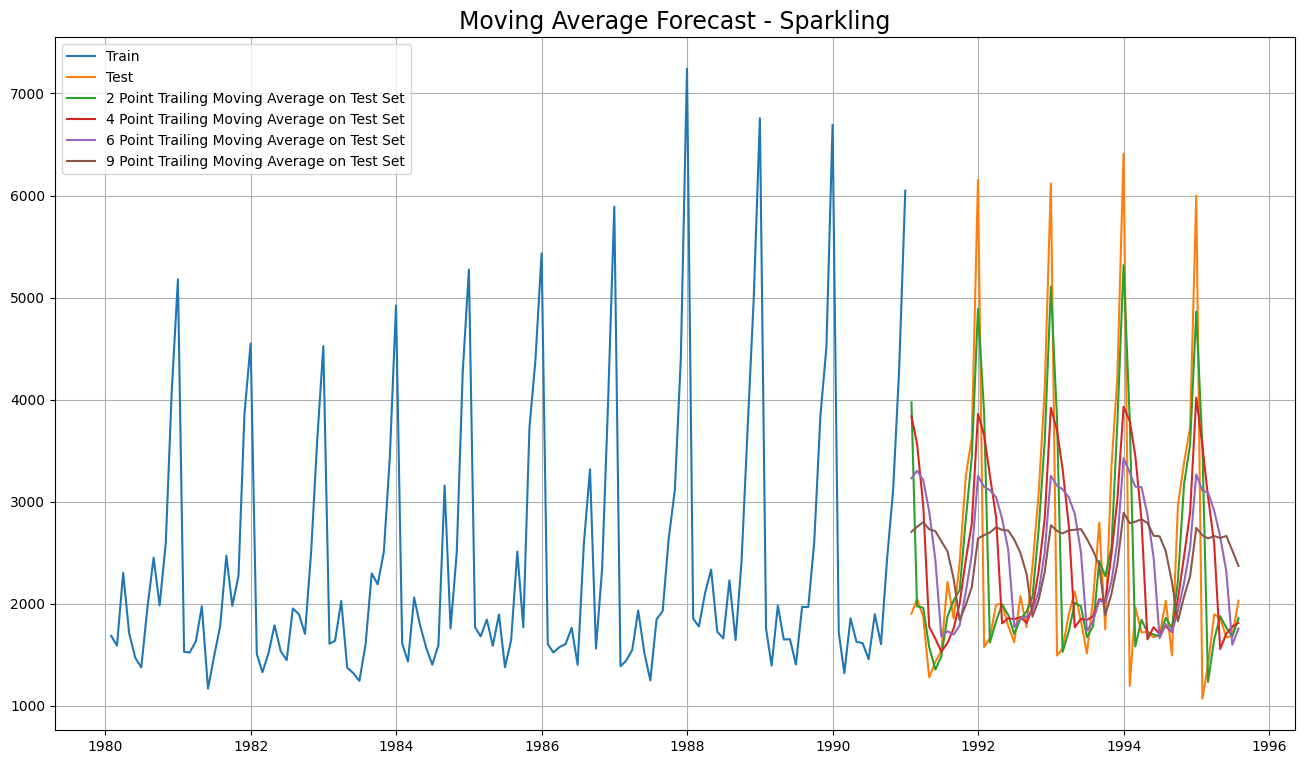

In [180]:
## Plotting on Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Sparkling', fontsize=17)
plt.savefig('spark_ma_test.jpg', bbox_inches='tight');

## Model Evaluation
Done only on the test data.

In [181]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1346.278


In [182]:
resultsDf_42 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf_42.to_csv('spark_ma.csv')
resultsDf_42

Test RMSE Sparkling
2pointTrailingMovingAverage           813.400684
4pointTrailingMovingAverage          1156.589694
6pointTrailingMovingAverage          1283.927428
9pointTrailingMovingAverage          1346.278315

In [183]:
resultsDf6 = resultsDf_41.join(resultsDf_42, how='outer')
resultsDf6

Test RMSE Rose  Test RMSE Sparkling
2pointTrailingMovingAverage       11.529278           813.400684
4pointTrailingMovingAverage       14.451403          1156.589694
6pointTrailingMovingAverage       14.566327          1283.927428
9pointTrailingMovingAverage       14.727630          1346.278315

In [184]:
resultsDf7 = pd.concat([resultsDf, resultsDf6], axis=0)
resultsDf7

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                  15.268955          1389.135175
NaiveModel                        79.718773          3864.279352
SimpleAverageModel                53.460570          1275.081804
2pointTrailingMovingAverage       11.529278           813.400684
4pointTrailingMovingAverage       14.451403          1156.589694
6pointTrailingMovingAverage       14.566327          1283.927428
9pointTrailingMovingAverage       14.727630          1346.278315

In [185]:
resultsDf = resultsDf7.copy()
resultsDf.to_csv('results_ma.csv')
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                  15.268955          1389.135175
NaiveModel                        79.718773          3864.279352
SimpleAverageModel                53.460570          1275.081804
2pointTrailingMovingAverage       11.529278           813.400684
4pointTrailingMovingAverage       14.451403          1156.589694
6pointTrailingMovingAverage       14.566327          1283.927428
9pointTrailingMovingAverage       14.727630          1346.278315

In [186]:
## Consolidated plots of All Models- Rose

In [187]:
# LR on Rose
train_time = [i+1 for i in range(len(rtrain))]
test_time = [i+133 for i in range(len(rtest))]
LinearRegression_train = rtrain.copy()
LinearRegression_test = rtest.copy()
LinearRegression_test['time'] = test_time
LinearRegression_train['time'] = train_time
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

# NB on Rose
NaiveModel_train = rtrain.copy()
NaiveModel_test = rtest.copy()
NaiveModel_test['naive'] = np.asarray(rtrain['Rose'])[len(np.asarray(rtrain['Rose']))-1]

# SA on Rose
SimpleAverage_train = rtrain.copy()
SimpleAverage_test = rtest.copy()
SimpleAverage_test['mean_forecast'] = rtrain['Rose'].mean()

# MA on Rose

MovingAverage = dfr.copy()
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
trailing_MovingAverage_test = MovingAverage[MovingAverage.index>='1991']

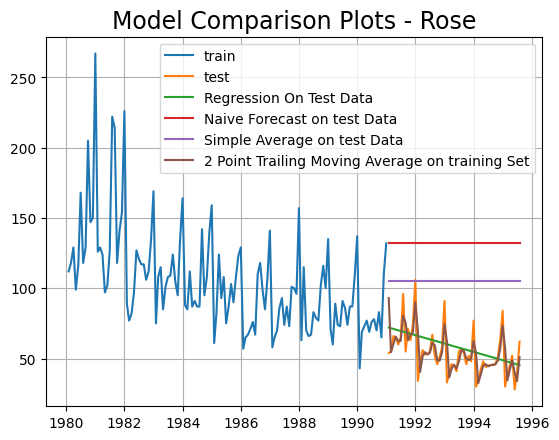

In [188]:
## Plotting on both rtraining and rtest data

plt.plot(rtrain['Rose'], label='train')
plt.plot(rtest['Rose'], label='test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots - Rose", fontsize=17)
plt.grid();

##Consolidated plots of All Models- Sparkling

In [189]:
# LR on Sparkling
train_time = [i+1 for i in range(len(strain))]
test_time = [i+133 for i in range(len(stest))]
LinearRegression_train = strain.copy()
LinearRegression_test = stest.copy()
LinearRegression_test['time'] = test_time
LinearRegression_train['time'] = train_time
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

# NB on Sparkling
NaiveModel_train = strain.copy()
NaiveModel_test = stest.copy()
NaiveModel_test['naive'] = np.asarray(strain['Sparkling'])[len(np.asarray(strain['Sparkling']))-1]

# SA on Sparkling
SimpleAverage_train = strain.copy()
SimpleAverage_test = stest.copy()
SimpleAverage_test['mean_forecast'] = strain['Sparkling'].mean()

# MA on Sparkling

MovingAverage = dfs.copy()
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
trailing_MovingAverage_test = MovingAverage[MovingAverage.index>='1991']

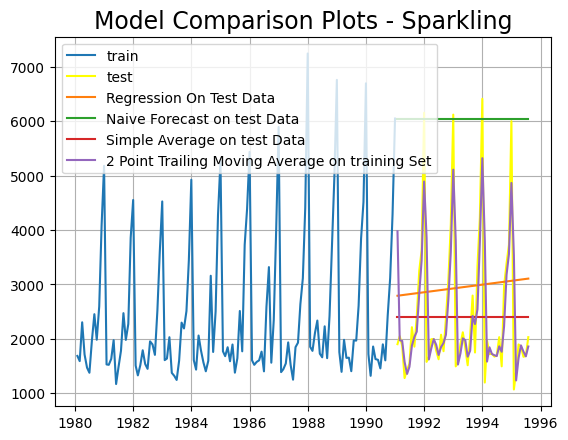

In [190]:
## Plotting on both rtraining and rtest data

plt.plot(strain['Sparkling'], label='train')
plt.plot(stest['Sparkling'], label='test', c='yellow')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots - Sparkling", fontsize=17)
plt.grid();

##Simple Exponential Smoothing, Holt's Model (Double Exponential Smoothing) & Holt-Winter's Model (Triple Exponential Smoothing)

In [191]:
# Importing the necessary packages

import statsmodels.tools.eval_measures as      em
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt

SES - ETS(A, N, N) - Simple Exponential Smoothing with additive errors - ROSE

In [192]:
# create class
model_SES = SimpleExpSmoothing(rtrain,initialization_method='estimated' )

In [193]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [194]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.09874920899865502,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.3871074301239,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [195]:
# Using the fitted model on the training set to forecast on the test set
SES_predict_rose = model_SES_autofit.forecast(steps=len(rtest))
SES_predict_rose

1991-01-31    87.10498
1991-02-28    87.10498
1991-03-31    87.10498
1991-04-30    87.10498
1991-05-31    87.10498
1991-06-30    87.10498
1991-07-31    87.10498
1991-08-31    87.10498
1991-09-30    87.10498
1991-10-31    87.10498
1991-11-30    87.10498
1991-12-31    87.10498
1992-01-31    87.10498
1992-02-29    87.10498
1992-03-31    87.10498
1992-04-30    87.10498
1992-05-31    87.10498
1992-06-30    87.10498
1992-07-31    87.10498
1992-08-31    87.10498
1992-09-30    87.10498
1992-10-31    87.10498
1992-11-30    87.10498
1992-12-31    87.10498
1993-01-31    87.10498
1993-02-28    87.10498
1993-03-31    87.10498
1993-04-30    87.10498
1993-05-31    87.10498
1993-06-30    87.10498
1993-07-31    87.10498
1993-08-31    87.10498
1993-09-30    87.10498
1993-10-31    87.10498
1993-11-30    87.10498
1993-12-31    87.10498
1994-01-31    87.10498
1994-02-28    87.10498
1994-03-31    87.10498
1994-04-30    87.10498
1994-05-31    87.10498
1994-06-30    87.10498
1994-07-31    87.10498
1994-08-31 

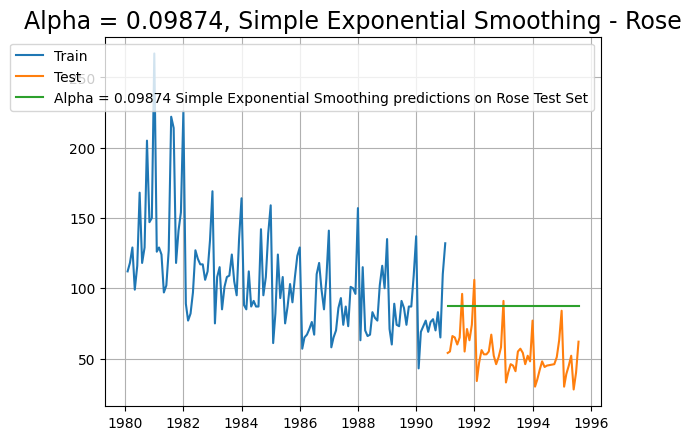

In [196]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha = 0.09874 Simple Exponential Smoothing predictions on Rose Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.09874, Simple Exponential Smoothing - Rose', fontsize=17);
plt.savefig('rose_ses.jpg', bbox_inches='tight');

In [197]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [198]:
print('SES RMSE:',mean_squared_error(rtest.values,SES_predict_rose.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(rtest.values,SES_predict_rose.values)[0])

SES RMSE: 36.79622482462249
SES RMSE (calculated using statsmodels): 36.796224824622485


In [199]:
resultsDf_rses = pd.DataFrame({'Test RMSE Rose': [em.rmse(rtest.values,SES_predict_rose.values)[0]]},index=['Simple Exponential Smoothing'])
resultsDf_rses

Test RMSE Rose
Simple Exponential Smoothing       36.796225

##SES - ETS(A, N, N) - Simple Exponential Smoothing with additive errors - SPARKLING

In [200]:
# create class
model_SES = SimpleExpSmoothing(strain,initialization_method='estimated' )

In [201]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [202]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.07028781460389563,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1763.9269926897732,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [203]:
# Using the fitted model on the training set to forecast on the test set
SES_predict_spark = model_SES_autofit.forecast(steps=len(stest))
SES_predict_spark

1991-01-31    2804.662714
1991-02-28    2804.662714
1991-03-31    2804.662714
1991-04-30    2804.662714
1991-05-31    2804.662714
1991-06-30    2804.662714
1991-07-31    2804.662714
1991-08-31    2804.662714
1991-09-30    2804.662714
1991-10-31    2804.662714
1991-11-30    2804.662714
1991-12-31    2804.662714
1992-01-31    2804.662714
1992-02-29    2804.662714
1992-03-31    2804.662714
1992-04-30    2804.662714
1992-05-31    2804.662714
1992-06-30    2804.662714
1992-07-31    2804.662714
1992-08-31    2804.662714
1992-09-30    2804.662714
1992-10-31    2804.662714
1992-11-30    2804.662714
1992-12-31    2804.662714
1993-01-31    2804.662714
1993-02-28    2804.662714
1993-03-31    2804.662714
1993-04-30    2804.662714
1993-05-31    2804.662714
1993-06-30    2804.662714
1993-07-31    2804.662714
1993-08-31    2804.662714
1993-09-30    2804.662714
1993-10-31    2804.662714
1993-11-30    2804.662714
1993-12-31    2804.662714
1994-01-31    2804.662714
1994-02-28    2804.662714
1994-03-31  

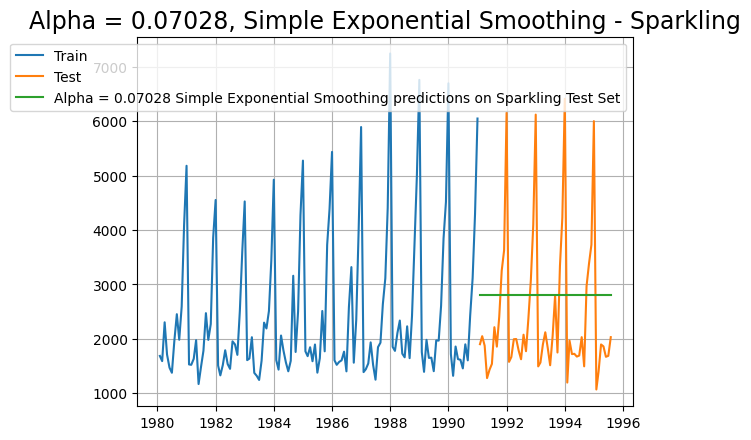

In [204]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha = 0.07028 Simple Exponential Smoothing predictions on Sparkling Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.07028, Simple Exponential Smoothing - Sparkling', fontsize=17);
plt.savefig('spark_ses.jpg', bbox_inches='tight');

In [205]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [206]:
print('SES RMSE:',mean_squared_error(stest.values,SES_predict_spark.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(rtest.values,SES_predict_spark.values)[0])

SES RMSE: 1338.0046232563645
SES RMSE (calculated using statsmodels): 2750.8533130338337


In [207]:
resultsDf_sses = pd.DataFrame({'Test RMSE Sparkling': [em.rmse(stest.values,SES_predict_spark.values)[0]]},index=['Simple Exponential Smoothing'])
resultsDf_sses

Test RMSE Sparkling
Simple Exponential Smoothing          1338.004623

In [208]:
resultsDf7 = resultsDf_rses.join(resultsDf_sses, how='outer')
resultsDf7

Test RMSE Rose  Test RMSE Sparkling
Simple Exponential Smoothing       36.796225          1338.004623

In [209]:
resultsDf8 = pd.concat([resultsDf, resultsDf7], axis=0)
resultsDf8

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                   15.268955          1389.135175
NaiveModel                         79.718773          3864.279352
SimpleAverageModel                 53.460570          1275.081804
2pointTrailingMovingAverage        11.529278           813.400684
4pointTrailingMovingAverage        14.451403          1156.589694
6pointTrailingMovingAverage        14.566327          1283.927428
9pointTrailingMovingAverage        14.727630          1346.278315
Simple Exponential Smoothing       36.796225          1338.004623

In [210]:
resultsDf = resultsDf8.copy()

##Holt - ETS(A, A, N) - Holt's linear method with additive errors - Rose
Double Exponential Smoothing - Rose

One of the drawbacks of the simple exponential smoothing is that the model does
not do well in the presence of the trend.

This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.

Applicable when data has Trend but no seasonality.

Two separate components are considered:
*   Level and Trend
*   Level is the local mean.

One smoothing parameter α corresponds to the level series
A second smoothing parameter β corresponds to the trend series.


In [211]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(rtrain,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('Holt model Exponential Smoothing Estimated Parameters :')
print('')
print(model_DES.params)


Holt model Exponential Smoothing Estimated Parameters :

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 5.448169774560283e-09, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81762949544608, 'initial_trend': -0.4943507283995123, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [212]:
# Forecasting using this model for the duration of the test set
DES_predict_rose =  model_DES.forecast(len(rtest))
DES_predict_rose

1991-01-31    72.068983
1991-02-28    71.574632
1991-03-31    71.080281
1991-04-30    70.585930
1991-05-31    70.091580
1991-06-30    69.597229
1991-07-31    69.102878
1991-08-31    68.608528
1991-09-30    68.114177
1991-10-31    67.619826
1991-11-30    67.125475
1991-12-31    66.631125
1992-01-31    66.136774
1992-02-29    65.642423
1992-03-31    65.148072
1992-04-30    64.653722
1992-05-31    64.159371
1992-06-30    63.665020
1992-07-31    63.170669
1992-08-31    62.676319
1992-09-30    62.181968
1992-10-31    61.687617
1992-11-30    61.193267
1992-12-31    60.698916
1993-01-31    60.204565
1993-02-28    59.710214
1993-03-31    59.215864
1993-04-30    58.721513
1993-05-31    58.227162
1993-06-30    57.732811
1993-07-31    57.238461
1993-08-31    56.744110
1993-09-30    56.249759
1993-10-31    55.755409
1993-11-30    55.261058
1993-12-31    54.766707
1994-01-31    54.272356
1994-02-28    53.778006
1994-03-31    53.283655
1994-04-30    52.789304
1994-05-31    52.294953
1994-06-30    51

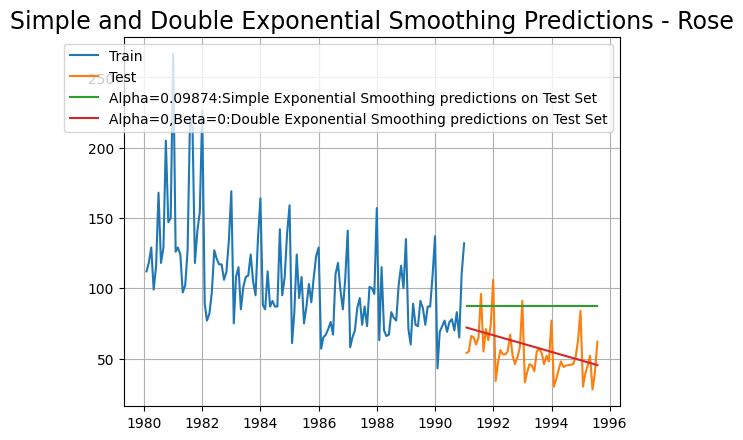

In [213]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions - Rose', fontsize=17);
plt.savefig('rose_rdes.jpg', bbox_inches='tight');

We see that the double exponential smoothing is picking up the trend component along with the level component as well.

In [214]:
print('DES RMSE:',mean_squared_error(rtest.values,DES_predict_rose.values,squared=False))

DES RMSE: 15.27096843395306


In [215]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,DES_predict_rose.values,squared=False)]}
                           ,index=['Double Exponential Smoothing'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp

Test RMSE Rose
Double Exponential Smoothing       15.270968

## Holt - ETS(A, A, N) - Holt's linear method with additive errors - Sparkling
Double Exponential Smoothing - Sparkling

In [216]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(strain,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('Holt model Exponential Smoothing Estimated Parameters :')
print('')
print(model_DES.params)


Holt model Exponential Smoothing Estimated Parameters :

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999998, 'initial_trend': 74.87272727272733, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [217]:
# Forecasting using this model for the duration of the test set
DES_predict_spark =  model_DES.forecast(len(stest))
DES_predict_spark

1991-01-31    5401.733026
1991-02-28    5476.005230
1991-03-31    5550.277433
1991-04-30    5624.549637
1991-05-31    5698.821840
1991-06-30    5773.094044
1991-07-31    5847.366248
1991-08-31    5921.638451
1991-09-30    5995.910655
1991-10-31    6070.182858
1991-11-30    6144.455062
1991-12-31    6218.727266
1992-01-31    6292.999469
1992-02-29    6367.271673
1992-03-31    6441.543876
1992-04-30    6515.816080
1992-05-31    6590.088284
1992-06-30    6664.360487
1992-07-31    6738.632691
1992-08-31    6812.904894
1992-09-30    6887.177098
1992-10-31    6961.449302
1992-11-30    7035.721505
1992-12-31    7109.993709
1993-01-31    7184.265912
1993-02-28    7258.538116
1993-03-31    7332.810320
1993-04-30    7407.082523
1993-05-31    7481.354727
1993-06-30    7555.626930
1993-07-31    7629.899134
1993-08-31    7704.171338
1993-09-30    7778.443541
1993-10-31    7852.715745
1993-11-30    7926.987948
1993-12-31    8001.260152
1994-01-31    8075.532356
1994-02-28    8149.804559
1994-03-31  

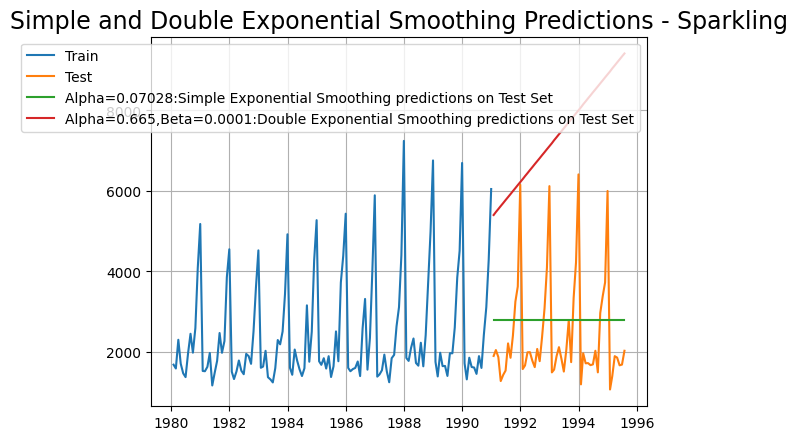

In [218]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions - Sparkling', fontsize=17);
plt.savefig('spark_des.jpg', bbox_inches='tight');

In [219]:
print('DES RMSE:',mean_squared_error(stest.values,DES_predict_spark.values,squared=False))

DES RMSE: 5291.879833226911


In [220]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,DES_predict_spark.values,squared=False)]}
                           ,index=['Double Exponential Smoothing'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp1

Test RMSE Sparkling
Double Exponential Smoothing          5291.879833

In [221]:
resultsDf9 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf9

Test RMSE Rose  Test RMSE Sparkling
Double Exponential Smoothing       15.270968          5291.879833

In [222]:
resultsDf10 = pd.concat([resultsDf, resultsDf9], axis=0)
resultsDf10

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                   15.268955          1389.135175
NaiveModel                         79.718773          3864.279352
SimpleAverageModel                 53.460570          1275.081804
2pointTrailingMovingAverage        11.529278           813.400684
4pointTrailingMovingAverage        14.451403          1156.589694
6pointTrailingMovingAverage        14.566327          1283.927428
9pointTrailingMovingAverage        14.727630          1346.278315
Simple Exponential Smoothing       36.796225          1338.004623
Double Exponential Smoothing       15.270968          5291.879833

In [223]:
resultsDf = resultsDf10.copy()
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                   15.268955          1389.135175
NaiveModel                         79.718773          3864.279352
SimpleAverageModel                 53.460570          1275.081804
2pointTrailingMovingAverage        11.529278           813.400684
4pointTrailingMovingAverage        14.451403          1156.589694
6pointTrailingMovingAverage        14.566327          1283.927428
9pointTrailingMovingAverage        14.727630          1346.278315
Simple Exponential Smoothing       36.796225          1338.004623
Double Exponential Smoothing       15.270968          5291.879833

## Inference

Here, we see that the Double Exponential Smoothing has actually done well when compared to the Simple Exponential Smoothing. This is because of the fact that the Double Exponential Smoothing model has picked up the trend component as well.

## Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors - ROSE

In [224]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(rtrain,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.08491574907842013, 'smoothing_trend': 5.5205494088745035e-06, 'smoothing_seasonal': 0.0005477182208247348, 'damping_trend': nan, 'initial_level': 147.05898703809248, 'initial_trend': -0.5496981430927392, 'initial_seasons': array([-31.16021285, -18.81317648, -10.81406896, -21.41413199,
       -12.6036696 ,  -7.23553106,   2.76744902,   8.85548059,
         4.83969803,   2.95125217,  21.07934859,  63.31472515]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [225]:
# Forecasting using this model for the duration of the test set
TES_predict_add_rose =  model_TES.forecast(len(rtest))
TES_predict_add_rose

1991-01-31     42.574560
1991-02-28     54.372099
1991-03-31     61.821511
1991-04-30     50.671639
1991-05-31     58.932400
1991-06-30     63.751320
1991-07-31     73.204015
1991-08-31     78.742349
1991-09-30     74.177124
1991-10-31     71.738917
1991-11-30     89.317129
1991-12-31    131.006255
1992-01-31     35.978169
1992-02-29     47.775707
1992-03-31     55.225119
1992-04-30     44.075248
1992-05-31     52.336008
1992-06-30     57.154928
1992-07-31     66.607623
1992-08-31     72.145958
1992-09-30     67.580733
1992-10-31     65.142526
1992-11-30     82.720737
1992-12-31    124.409864
1993-01-31     29.381777
1993-02-28     41.179316
1993-03-31     48.628728
1993-04-30     37.478856
1993-05-31     45.739616
1993-06-30     50.558536
1993-07-31     60.011232
1993-08-31     65.549566
1993-09-30     60.984341
1993-10-31     58.546134
1993-11-30     76.124346
1993-12-31    117.813472
1994-01-31     22.785386
1994-02-28     34.582924
1994-03-31     42.032336
1994-04-30     30.882464


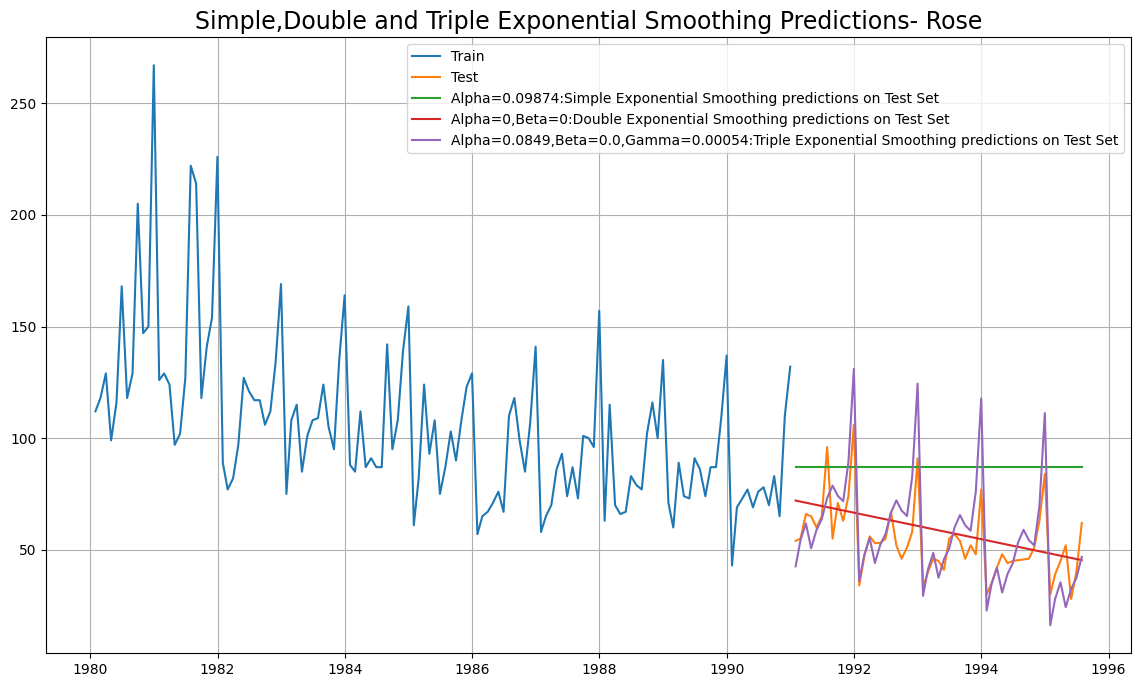

In [226]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(14, 8))
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions- Rose', fontsize=17);
plt.savefig('rose_add_tes.jpg', bbox_inches='tight');

We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

In [227]:
print('TES RMSE:',mean_squared_error(rtest.values,TES_predict_add_rose.values,squared=False))

TES RMSE: 14.24323950074202


In [228]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_add_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp

Test RMSE Rose
Triple Exponential Smoothing (Additive Season)        14.24324

## Inference

Triple Exponential Smoothing has performed the best on the test as expected since the data had both trend and seasonality.

##Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors - SPARKLING

In [229]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(strain,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11127217859992398, 'smoothing_trend': 0.01236078328796452, 'smoothing_seasonal': 0.4607177642170641, 'damping_trend': nan, 'initial_level': 2356.578308185137, 'initial_trend': -0.01853556812789492, 'initial_seasons': array([-636.23360535, -722.98363367, -398.6436108 , -473.43084469,
       -808.42525514, -815.35024951, -384.23066987,   72.99508063,
       -237.44272911,  272.32584554, 1541.3782103 , 2590.0775386 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [230]:
# Forecasting using this model for the duration of the test set
TES_predict_add_spark =  model_TES.forecast(len(stest))
TES_predict_add_spark

1991-01-31    1490.574426
1991-02-28    1204.714325
1991-03-31    1688.941106
1991-04-30    1551.450810
1991-05-31    1461.440427
1991-06-30    1278.907163
1991-07-31    1805.164022
1991-08-31    1679.251392
1991-09-30    2315.687649
1991-10-31    3225.308906
1991-11-30    4299.652360
1991-12-31    6411.161332
1992-01-31    1483.296578
1992-02-29    1197.436477
1992-03-31    1681.663258
1992-04-30    1544.172962
1992-05-31    1454.162580
1992-06-30    1271.629315
1992-07-31    1797.886174
1992-08-31    1671.973544
1992-09-30    2308.409801
1992-10-31    3218.031058
1992-11-30    4292.374513
1992-12-31    6403.883484
1993-01-31    1476.018731
1993-02-28    1190.158629
1993-03-31    1674.385411
1993-04-30    1536.895114
1993-05-31    1446.884732
1993-06-30    1264.351467
1993-07-31    1790.608327
1993-08-31    1664.695696
1993-09-30    2301.131954
1993-10-31    3210.753211
1993-11-30    4285.096665
1993-12-31    6396.605637
1994-01-31    1468.740883
1994-02-28    1182.880782
1994-03-31  

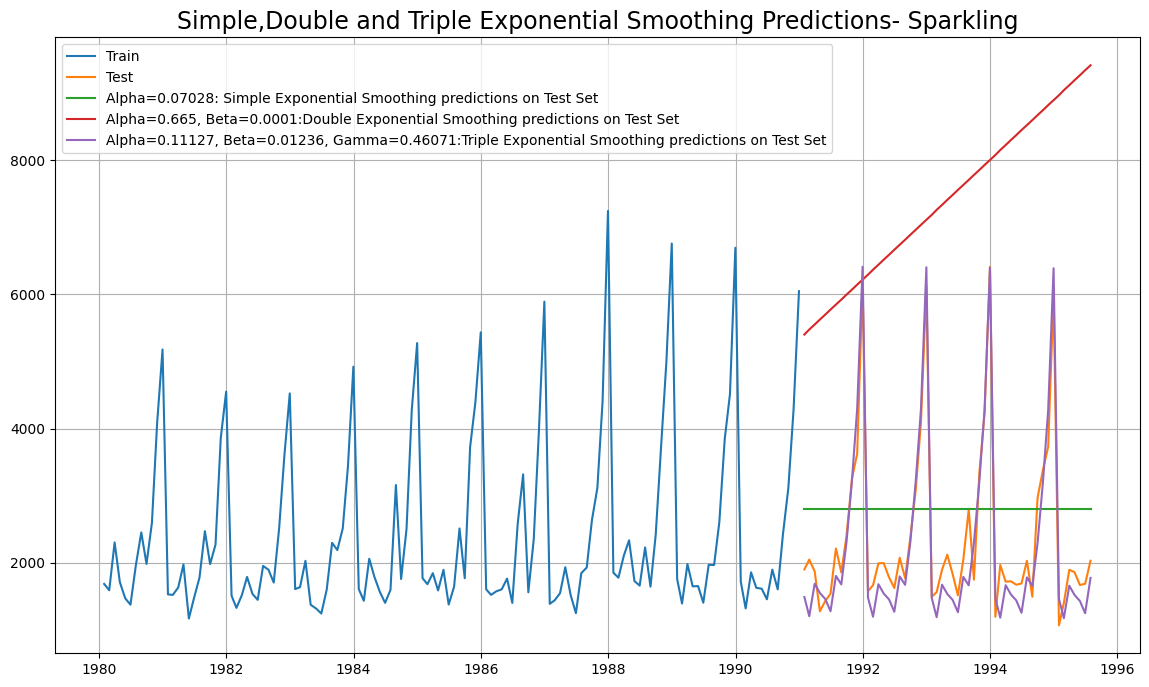

In [231]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(14, 8))

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11127, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions- Sparkling', fontsize=17);
plt.savefig('spark_add_tes.jpg', bbox_inches='tight');

We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

In [232]:
print('TES RMSE:',mean_squared_error(stest.values,TES_predict_add_spark.values,squared=False))

TES RMSE: 378.6262408893861


In [233]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_add_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp1

Test RMSE Sparkling
Triple Exponential Smoothing (Additive Season)           378.626241

In [234]:
resultsDf11 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf11

Test RMSE Rose  \
Triple Exponential Smoothing (Additive Season)        14.24324   

                                                Test RMSE Sparkling  
Triple Exponential Smoothing (Additive Season)           378.626241

In [235]:
resultsDf12 = pd.concat([resultsDf, resultsDf11], axis=0)
resultsDf12

Test RMSE Rose  \
RegressionOnTime                                     15.268955   
NaiveModel                                           79.718773   
SimpleAverageModel                                   53.460570   
2pointTrailingMovingAverage                          11.529278   
4pointTrailingMovingAverage                          14.451403   
6pointTrailingMovingAverage                          14.566327   
9pointTrailingMovingAverage                          14.727630   
Simple Exponential Smoothing                         36.796225   
Double Exponential Smoothing                         15.270968   
Triple Exponential Smoothing (Additive Season)       14.243240   

                                                Test RMSE Sparkling  
RegressionOnTime                                        1389.135175  
NaiveModel                                              3864.279352  
SimpleAverageModel                                      1275.081804  
2pointTrailingMovingAverage                              813.400684  
4pointTrailingMovingAverage                             1156.589694  
6pointTrailingMovingAverage                             1283.927428  
9pointTrailingMovingAverage                             1346.278315  
Simple Exponential Smoothing                            1338.004623  
Double Exponential Smoothing                            5291.879833  
Triple Exponential Smoothing (Additive Season)           378.626241

In [236]:
resultsDf = resultsDf12.copy()

## Holt-Winters - ETS(A, A, M) - Holt Winter's linear method - ROSE
### ETS(A, A, M) model - Taking MULTIPLICATIVE SEASONALITY

In [237]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(rtrain,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07736040004765096, 'smoothing_trend': 0.03936496779735522, 'smoothing_seasonal': 0.0008375039104357999, 'damping_trend': nan, 'initial_level': 156.90674503596637, 'initial_trend': -0.9061396720042346, 'initial_seasons': array([0.7142168 , 0.80982439, 0.88543128, 0.77363782, 0.87046319,
       0.94699283, 1.04196135, 1.11012703, 1.04835489, 1.0276963 ,
       1.19783562, 1.6514144 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [238]:
# Forecasting using this model for the duration of the test set
TES_predict_am_rose =  model_TES_am.forecast(len(rtest))
TES_predict_am_rose

1991-01-31     55.942246
1991-02-28     63.240624
1991-03-31     68.899674
1991-04-30     60.007486
1991-05-31     67.257150
1991-06-30     72.880875
1991-07-31     79.913317
1991-08-31     84.831135
1991-09-30     79.856761
1991-10-31     78.009465
1991-11-30     90.608817
1991-12-31    124.421985
1992-01-31     53.620022
1992-02-29     60.606323
1992-03-31     66.019647
1992-04-30     57.490388
1992-05-31     64.426058
1992-06-30     69.802261
1992-07-31     76.525716
1992-08-31     81.222314
1992-09-30     76.447471
1992-10-31     74.667150
1992-11-30     86.712771
1992-12-31    119.052784
1993-01-31     51.297798
1993-02-28     57.972023
1993-03-31     63.139621
1993-04-30     54.973289
1993-05-31     61.594966
1993-06-30     66.723648
1993-07-31     73.138115
1993-08-31     77.613494
1993-09-30     73.038180
1993-10-31     71.324834
1993-11-30     82.816725
1993-12-31    113.683583
1994-01-31     48.975574
1994-02-28     55.337723
1994-03-31     60.259594
1994-04-30     52.456191


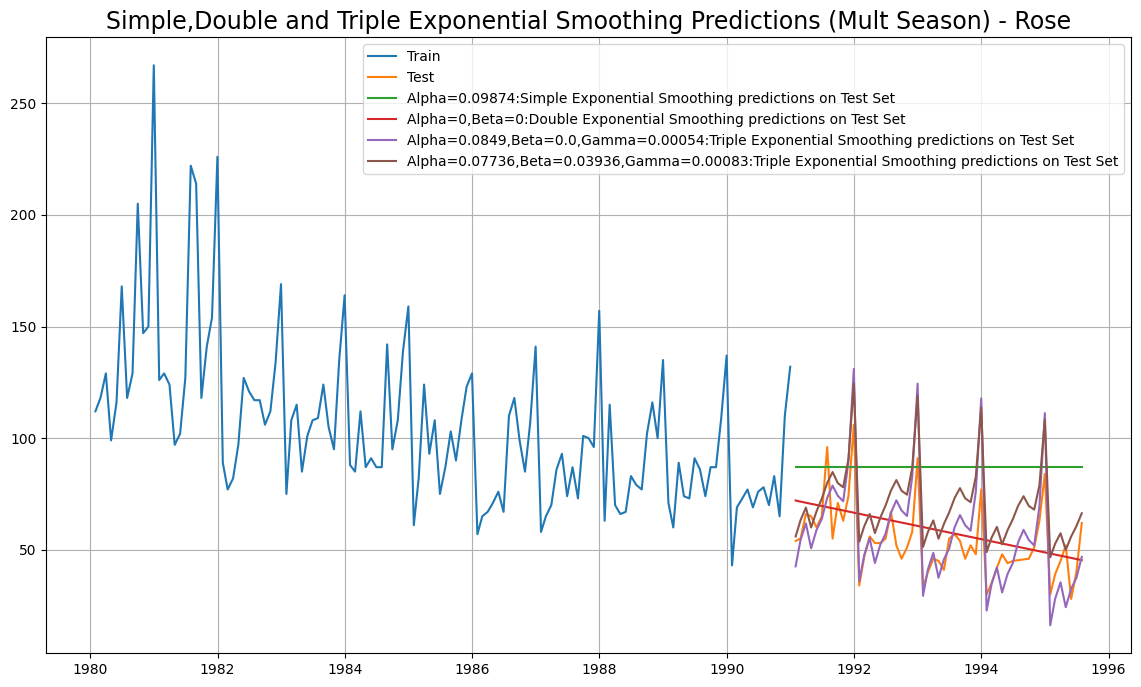

In [239]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(14, 8))
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_rose, label='Alpha=0.07736,Beta=0.03936,Gamma=0.00083:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season) - Rose', fontsize=17);

plt.savefig('rose_mul_tes.jpg', bbox_inches='tight');

##Report model accuracy

In [240]:
print('TES_am RMSE_rose:',mean_squared_error(rtest.values,TES_predict_am_rose.values,squared=False))

TES_am RMSE_rose: 19.113110215160134


In [241]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_am_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season)'])



resultsDf_temp

Test RMSE Rose
Triple Exponential Smoothing (Multiplicative Se...        19.11311

We see that the multiplicative seasonality model has not done that well when compared to the additive seasonality Triple Exponential Smoothing model.

## Holt-Winters - ETS(A, A, M) - Holt Winter's linear method - SPARKLING
ETS(A, A, M) model - Taking MULTIPLICATIVE SEASONALITY

In [242]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(strain,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11119949831569428, 'smoothing_trend': 0.049430920023313805, 'smoothing_seasonal': 0.3620525701498937, 'damping_trend': nan, 'initial_level': 2356.5264391986907, 'initial_trend': -9.443690175376352, 'initial_seasons': array([0.71325627, 0.68332509, 0.90537798, 0.80561841, 0.65639659,
       0.65451508, 0.88690241, 1.13423953, 0.91927727, 1.21396745,
       1.86941738, 2.3734461 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [243]:
# Forecasting using this model for the duration of the test set
TES_predict_am_spark =  model_TES_am.forecast(len(stest))
TES_predict_am_spark

1991-01-31    1587.685845
1991-02-28    1356.590237
1991-03-31    1763.121866
1991-04-30    1656.379813
1991-05-31    1542.186697
1991-06-30    1355.276292
1991-07-31    1854.460265
1991-08-31    1820.822870
1991-09-30    2277.203230
1991-10-31    3122.460625
1991-11-30    4129.148636
1991-12-31    5891.184787
1992-01-31    1538.578232
1992-02-29    1314.522051
1992-03-31    1708.305381
1992-04-30    1604.748228
1992-05-31    1493.989468
1992-06-30    1312.809887
1992-07-31    1796.200235
1992-08-31    1763.469447
1992-09-30    2205.285676
1992-10-31    3023.588340
1992-11-30    3998.053790
1992-12-31    5703.651532
1993-01-31    1489.470618
1993-02-28    1272.453864
1993-03-31    1653.488895
1993-04-30    1553.116644
1993-05-31    1445.792238
1993-06-30    1270.343481
1993-07-31    1737.940206
1993-08-31    1706.116024
1993-09-30    2133.368122
1993-10-31    2924.716056
1993-11-30    3866.958944
1993-12-31    5516.118277
1994-01-31    1440.363005
1994-02-28    1230.385677
1994-03-31  

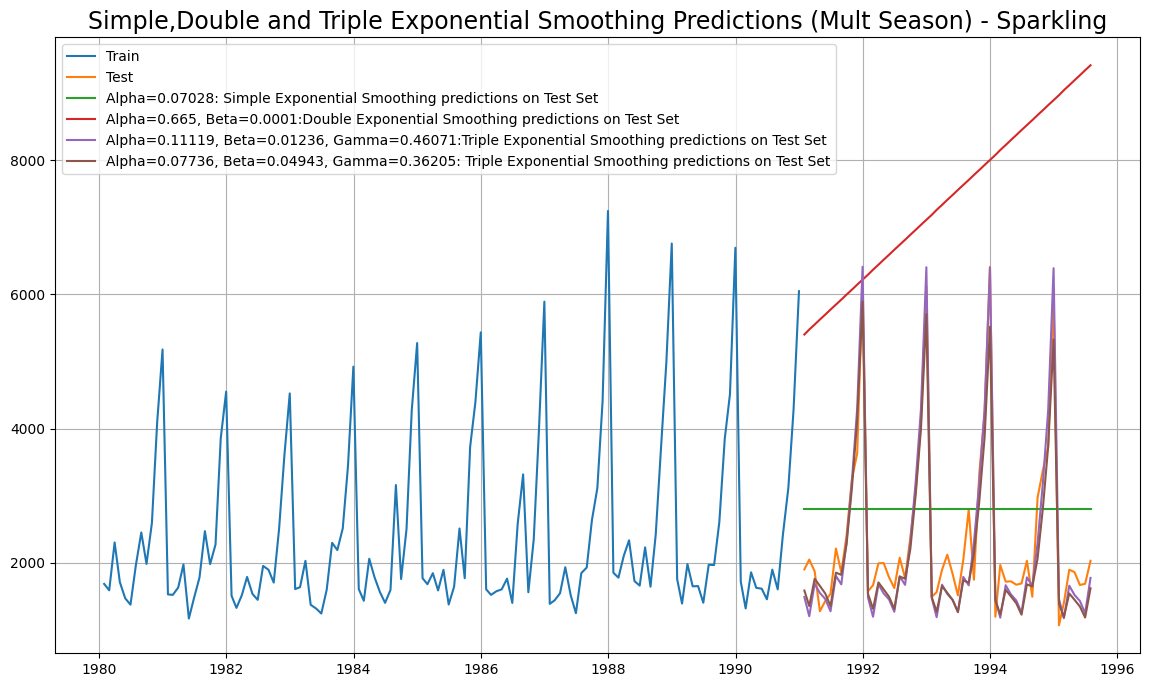

In [244]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(14, 8))
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11119, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')

plt.plot(TES_predict_am_spark, label='Alpha=0.07736, Beta=0.04943, Gamma=0.36205: Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season) - Sparkling', fontsize=17);

plt.savefig('spark_mul_tes.jpg', bbox_inches='tight');

## Report model accuracy

In [245]:
print('TES_am RMSE_spark:',mean_squared_error(stest.values,TES_predict_am_spark.values,squared=False))

TES_am RMSE_spark: 403.7062277856435


In [246]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_am_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season)'])



resultsDf_temp1

Test RMSE Sparkling
Triple Exponential Smoothing (Multiplicative Se...           403.706228

In [247]:
resultsDf13 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf13

Test RMSE Rose  \
Triple Exponential Smoothing (Multiplicative Se...        19.11311   

                                                    Test RMSE Sparkling  
Triple Exponential Smoothing (Multiplicative Se...           403.706228

In [248]:
resultsDf14 = pd.concat([resultsDf, resultsDf13], axis=0)
resultsDf14

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796225   
Double Exponential Smoothing                             15.270968   
Triple Exponential Smoothing (Additive Season)           14.243240   
Triple Exponential Smoothing (Multiplicative Se...       19.113110   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1389.135175  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Simple Exponential Smoothing                                1338.004623  
Double Exponential Smoothing                                5291.879833  
Triple Exponential Smoothing (Additive Season)               378.626241  
Triple Exponential Smoothing (Multiplicative Se...           403.706228

In [249]:
resultsDf = resultsDf14.copy()
resultsDf

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796225   
Double Exponential Smoothing                             15.270968   
Triple Exponential Smoothing (Additive Season)           14.243240   
Triple Exponential Smoothing (Multiplicative Se...       19.113110   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1389.135175  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Simple Exponential Smoothing                                1338.004623  
Double Exponential Smoothing                                5291.879833  
Triple Exponential Smoothing (Additive Season)               378.626241  
Triple Exponential Smoothing (Multiplicative Se...           403.706228

In [250]:
resultsDf.to_csv('results_all.csv')

# Best Model for Rose till Now - 2 Pt Moving Average

In [251]:
MovingAverage = dfr.copy()
MovingAverage.head()

Rose
Month            
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

## Trailing moving averages

In [252]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()

MovingAverage.head()

Rose  Trailing_2
Month                        
1980-01-31  112.0         NaN
1980-02-29  118.0       115.0
1980-03-31  129.0       123.5
1980-04-30   99.0       114.0
1980-05-31  116.0       107.5

In [253]:
#Creating train and test set
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991']
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

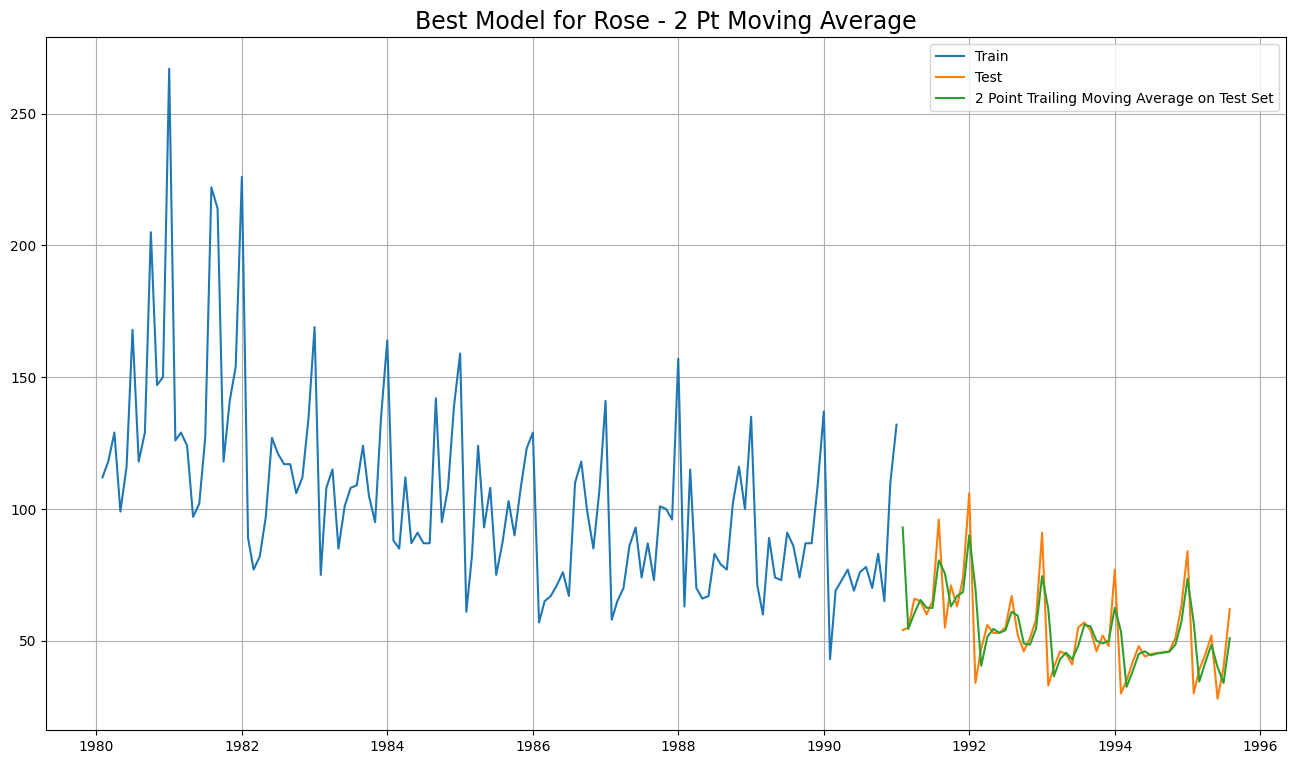

In [254]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')


plt.legend(loc = 'best')
plt.grid();
plt.title('Best Model for Rose - 2 Pt Moving Average', fontsize=17);
plt.savefig('rose_best_model_2pt.jpg', bbox_inches='tight');

#Check Stationarity of ROSE Data

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:

 H0: The Time Series has a unit root and is thus non-stationary.
 H1: The Time Series does not have a unit root and is thus stationary.
We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the
 value.

In [255]:
from statsmodels.tsa.stattools import adfuller

In [256]:
dfrs = adfuller(dfr,regression='ct')
print('DF test statistic is %3.3f' %dfrs[0])
print('DF test p-value is' ,dfrs[1])
print('Number of lags used' ,dfrs[2])

DF test statistic is -2.240
DF test p-value is 0.46713716277931305
Number of lags used 13


We see that at 5% significant level the Time Series is non-stationary.

Let us take one level of differencing to see whether the series becomes stationary.

In [257]:
  dfrs = adfuller(dfr.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dfrs[0])
print('DF test p-value is' ,dfrs[1])
print('Number of lags used' ,dfrs[2])

DF test statistic is -8.162
DF test p-value is 3.0159761158274826e-11
Number of lags used 12


We see that p-value < alpha=0.05 Hence, we reject the Null Hypothesis

We conclude that with a lag 1 - now the Rose data is Stationary

Now, let us go ahead and plot the stationary series.

<Figure size 1600x1000 with 0 Axes>

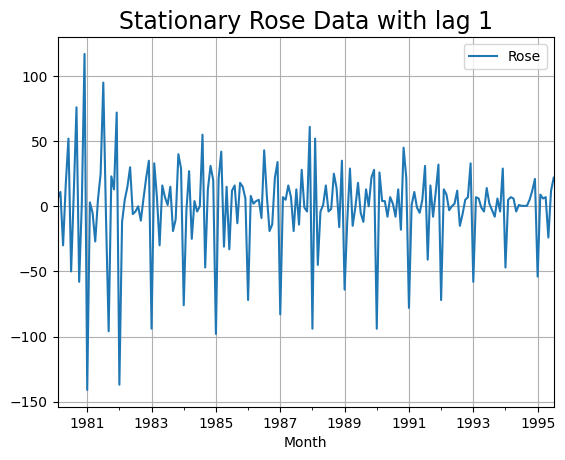

In [258]:
plt.figure(figsize=(16, 10))
#plt.gcf().set_figwidth(30)
dfr.diff().dropna().plot(grid=True);
plt.title('Stationary Rose Data with lag 1', fontsize=17);
#plt.savefig('rose_stationary.jpg', bbox_inches='tight');

##Check Stationarity of SPARKLING Data

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:

 H0: The Time Series has a unit root and is thus non-stationary.

 H1: The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the
 value.

In [259]:
dfss = adfuller(dfs,regression='ct')
print('DF test statistic is %3.3f' %dfss[0])
print('DF test p-value is' ,dfss[1])
print('Number of lags used' ,dfss[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932758
Number of lags used 12


We see that at 5% significant level the Time Series is non-stationary.

Let us take one level of differencing to see whether the series becomes stationary.

In [260]:
dfss = adfuller(dfs.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dfss[0])
print('DF test p-value is' ,dfss[1])
print('Number of lags used' ,dfss[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


We see that p-value < alpha=0.05 Hence, we reject the Null Hypothesis

We conclude that with a lag 1 - now the Sparkling data is Stationary

Now, let us go ahead and plot the stationary series.

<Figure size 1600x1000 with 0 Axes>

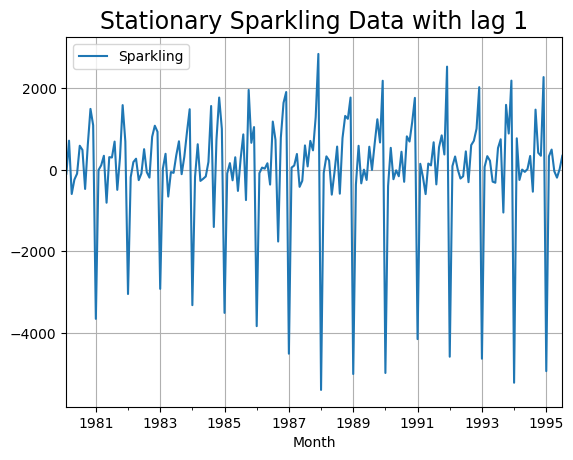

In [261]:
plt.figure(figsize=(16, 10))
dfs.diff().dropna().plot(grid=True);
plt.title('Stationary Sparkling Data with lag 1', fontsize=17);
plt.savefig('spark_stationary.jpg', bbox_inches='tight');

##ARIMA / SARIMA on ROSE
##Check for Stationarity of Rose Train Data
Let us plot the training data once.

<Figure size 1400x800 with 0 Axes>

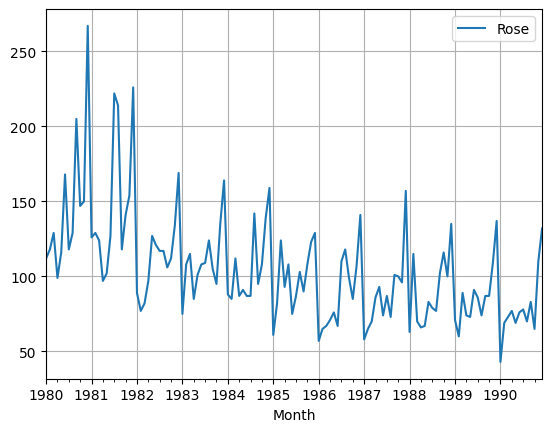

<Figure size 1400x800 with 0 Axes>

In [262]:

rtrain.plot(grid=True);
plt.figure(figsize=(14, 8))

In [263]:
dftest = adfuller(rtrain,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.686
DF test p-value is 0.7569093051047069
Number of lags used 13


The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

In [264]:
dftest = adfuller(rtrain.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -6.804
DF test p-value is 3.894831356782642e-08
Number of lags used 12


p-value < 0.05 ------> So at 95% Confidence Interval. Train Rose data is Stationary with lag 1 Now, let us go ahead and plot the differenced training data.

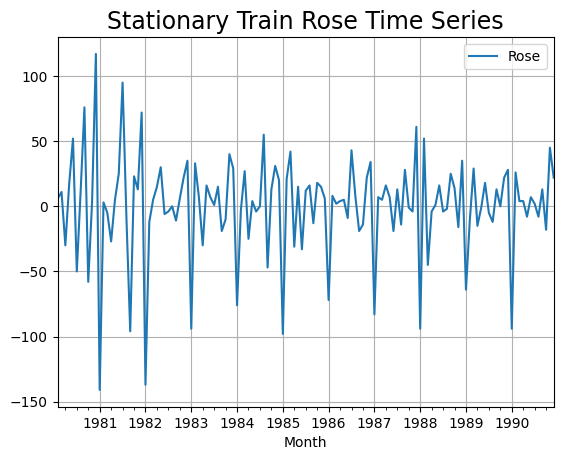

In [265]:
rtrain.diff().dropna().plot(grid=True);
plt.title('Stationary Train Rose Time Series', fontsize=17)
plt.savefig('rose_train_stationary.jpg', bbox_inches='tight');

In [266]:
rtrain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Note: The data has some seasonality so ideally we should build a SARIMA model. But lets test on the lowest Akaike Information Criteria, which one suits best - ARIMA or SARIMA

In [267]:
import itertools

p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))

print('Examples of the parameter combinations for the Model')

for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [268]:
# Creating an empty Dataframe with column names only
ROSE_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ROSE_ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [269]:

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
ROSE_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ROSE_ARIMA_AIC
for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(rtrain['Rose'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    #ROSE_ARIMA_AIC = ROSE_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #ROSE_ARIMA_AIC = ROSE_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    ROSE_ARIMA_AIC.loc[len(ROSE_ARIMA_AIC)] = {'param': param, 'AIC': ARIMA_model.aic}
    #ROSE_ARIMA_AIC = ROSE_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, axis=1, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.309831974832
ARIMA(0, 1, 2) - AIC:1279.6715288535784
ARIMA(0, 1, 3) - AIC:1280.545376173466
ARIMA(1, 1, 0) - AIC:1317.350310538146
ARIMA(1, 1, 1) - AIC:1280.5742295380046
ARIMA(1, 1, 2) - AIC:1279.8707234231929
ARIMA(1, 1, 3) - AIC:1281.8707223309984
ARIMA(2, 1, 0) - AIC:1298.6110341604945
ARIMA(2, 1, 1) - AIC:1281.5078621868563
ARIMA(2, 1, 2) - AIC:1281.870722226456
ARIMA(2, 1, 3) - AIC:1274.6951271827177
ARIMA(3, 1, 0) - AIC:1297.481091727167
ARIMA(3, 1, 1) - AIC:1282.4192776271927
ARIMA(3, 1, 2) - AIC:1283.7207405977094
ARIMA(3, 1, 3) - AIC:1278.6580044819445


In [270]:
ROSE_ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
11  (2, 1, 3)  1274.695127
15  (3, 1, 3)  1278.658004
2   (0, 1, 2)  1279.671529
6   (1, 1, 2)  1279.870723
3   (0, 1, 3)  1280.545376

In [271]:
auto_ARIMA = ARIMA(rtrain, order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sat, 13 Apr 2024   AIC                           1274.695
Time:                        14:57:22   BIC                           1291.946
Sample:                    01-31-1980   HQIC                          1281.705
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6779      0.084    -20.034      0.000      -1.842      -1.514
ar.L2         -0.7288      0.084     -8.702      0.000      -0.893      -0.565
ma.L1          1.0447      0.644      1.622      0.1

##Rose Train Diagnostics plot.

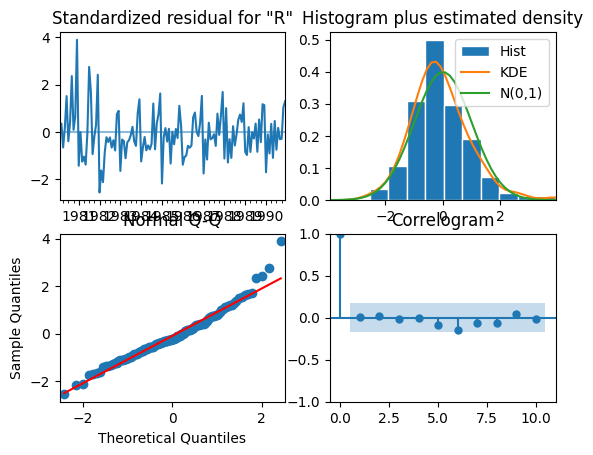

In [272]:
results_auto_ARIMA.plot_diagnostics();

plt.savefig('rose_diag_plot.jpg', bbox_inches='tight')

## Predict on the Rose Test Set using this model and evaluate the model.

In [273]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(rtest))
predicted_auto_ARIMA

1991-01-31    85.615374
1991-02-28    90.529872
1991-03-31    81.971586
1991-04-30    92.750114
1991-05-31    80.901745
1991-06-30    92.927133
1991-07-31    81.384412
1991-08-31    91.988245
1991-09-30    82.608034
1991-10-31    90.619351
1991-11-30    84.013171
1991-12-31    89.259272
1992-01-31    85.271231
1992-02-29    88.139556
1992-03-31    86.233169
1992-04-30    87.341533
1992-05-31    86.871139
1992-06-30    86.852660
1992-07-31    87.226486
1992-08-31    86.612700
1992-09-30    87.370146
1992-10-31    86.546530
1992-11-30    87.376477
1992-12-31    86.584132
1993-01-31    87.308770
1993-02-28    86.670335
1993-03-31    87.213472
1993-04-30    86.767414
1993-05-31    87.120032
1993-06-30    86.853449
1993-07-31    87.043771
1993-08-31    86.918708
1993-09-30    86.989850
1993-10-31    86.961624
1993-11-30    86.957137
1993-12-31    86.985237
1994-01-31    86.941357
1994-02-28    86.994505
1994-03-31    86.937306
1994-04-30    86.994547
1994-05-31    86.940187
1994-06-30    86

In [274]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [275]:
rmse = mean_squared_error(rtest['Rose'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.815186018493684 
MAPE: 75.843731791763


In [276]:
resultsR0 = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['ARIMA(2,1,3)'])

resultsR0.to_csv('rose_arima_auto_213.csv')
resultsR0

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)       36.815186       75.843732

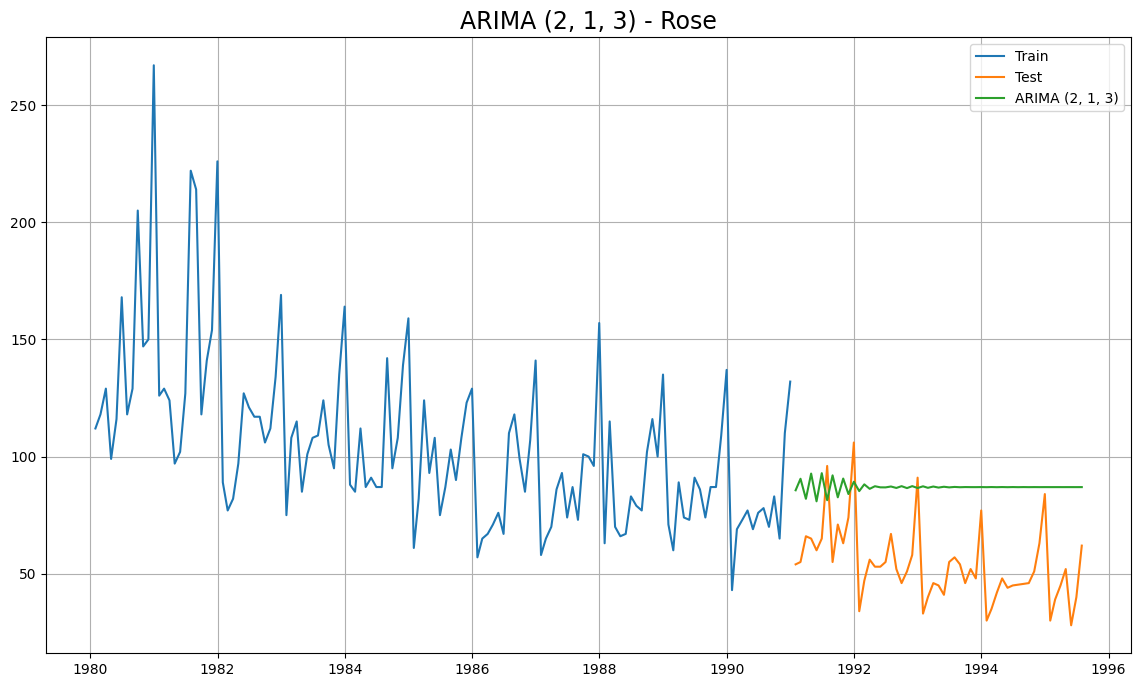

In [277]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(14, 8))
plt.plot(rtrain, label='Train')

plt.plot(rtest, label='Test')
plt.plot(predicted_auto_ARIMA,label='ARIMA (2, 1, 3)')


plt.legend(loc='best')
plt.grid()
plt.title('ARIMA (2, 1, 3) - Rose', fontsize=17);

plt.savefig('rose_arima_auto_213.jpg', bbox_inches='tight');

##Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots on ROSE dataset

Let us look at the ACF and the PACF plots once more.

In [278]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1400x800 with 0 Axes>

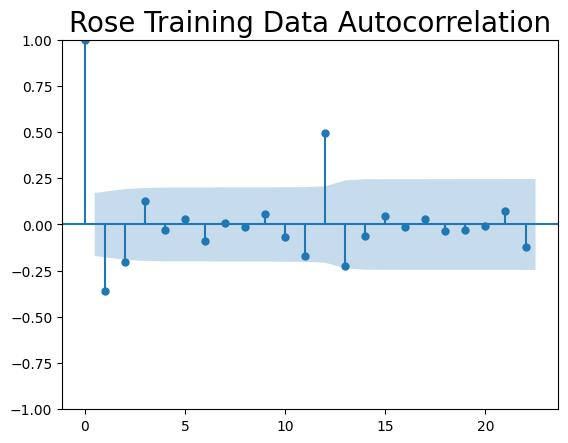

In [279]:
plt.figure(figsize=(14, 8))
plot_acf(rtrain.diff(), missing='drop', alpha=0.05)
plt.title('Rose Training Data Autocorrelation',fontsize=20)
plt.savefig('rose_train_acf.jpg', bbox_inches='tight');


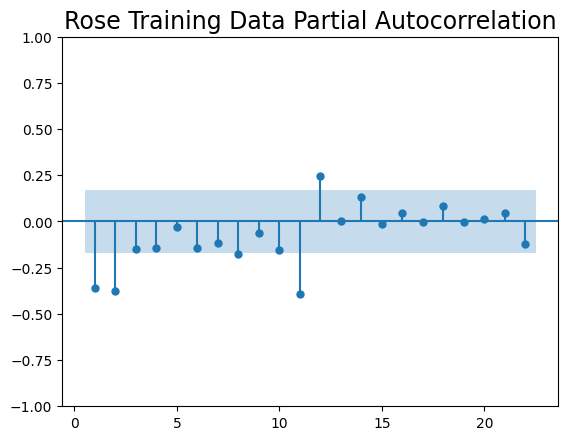

In [280]:
plot_pacf(rtrain.diff().dropna(), zero=False, alpha=0.05, method='ywmle')
plt.title('Rose Training Data Partial Autocorrelation',fontsize=17)
plt.savefig('rose_train_pacf.jpg', bbox_inches='tight');

Here, we have taken alpha=0.05.

1. The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off
2. The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off

By looking at the above plots, we will take the value of p and q to be 2 and 2 respectively.

In [281]:
manual_ARIMA = ARIMA(rtrain['Rose'], order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sat, 13 Apr 2024   AIC                           1281.871
Time:                        14:57:27   BIC                           1296.247
Sample:                    01-31-1980   HQIC                          1287.712
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

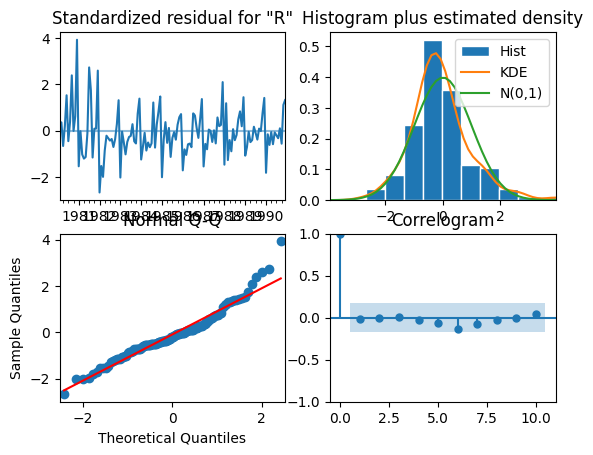

In [282]:
results_manual_ARIMA.plot_diagnostics();
plt.savefig('rose_train_manual_diag_plot.jpg', bbox_inches='tight');

##Predict on the Test Set using this model and evaluate the model.

In [283]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(rtest))

In [284]:
rmse = mean_squared_error(rtest['Rose'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.87119661282404 
MAPE: 76.05621270334557


In [285]:
temp_resultsR2 = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['ARIMA(2,1,2)'])


resultsR2 = pd.concat([resultsR0,temp_resultsR2])

resultsR2

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)       36.815186       75.843732
ARIMA(2,1,2)       36.871197       76.056213

In [286]:
resultsR0 = resultsR2.copy()
resultsR0

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)       36.815186       75.843732
ARIMA(2,1,2)       36.871197       76.056213

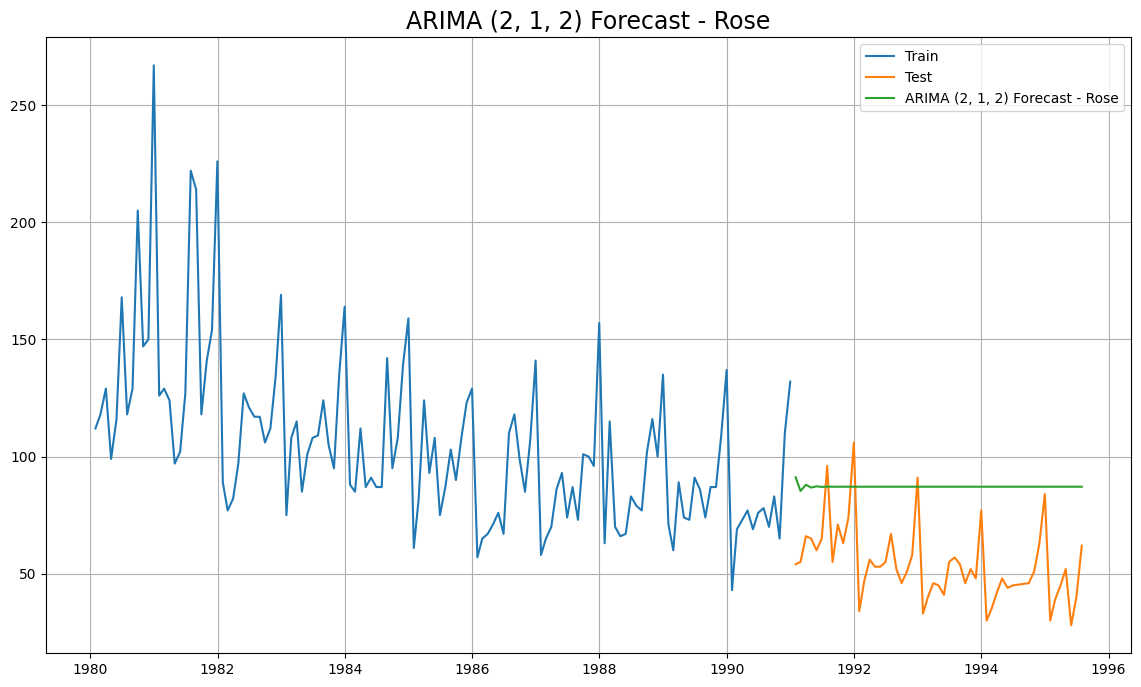

In [287]:
plt.figure(figsize=(14, 8))
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(predicted_manual_ARIMA, label = 'ARIMA (2, 1, 2) Forecast - Rose')
plt.grid()
plt.legend(loc='best')
plt.title('ARIMA (2, 1, 2) Forecast - Rose', fontsize=17)
plt.savefig('rose_arima_manual_forecast.jpg', bbox_inches='tight');

##Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC) - ROSE DATA

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

<Figure size 1400x800 with 0 Axes>

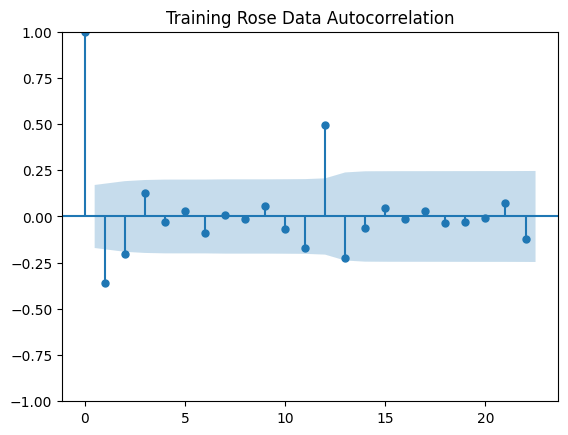

In [288]:
plt.figure(figsize=(14, 8))
plot_acf(rtrain.diff(),title='Training Rose Data Autocorrelation',missing='drop');

We can see that there is a seasonality.

In [289]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [290]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [291]:
import statsmodels.api as sm
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC
for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(rtrain['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        #SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        #SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        SARIMA_AIC.loc[len(SARIMA_AIC)] = {'param': param, 'seasonal': param_seasonal, 'AIC': results_SARIMA.aic}

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207298
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380895
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3537.579168905919
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386172
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.691363575225
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:4554.32909051064
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697556
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945757
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:4397.822817992214
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.7535403931095
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.7482702748039
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.53041361288
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3467.855628476979
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383966
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918337
SARIMA(0, 1, 1)x(0, 0, 2, 1

In [292]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
222  (3, 1, 1)  (3, 0, 2, 12)  774.400287
238  (3, 1, 2)  (3, 0, 2, 12)  774.880936
220  (3, 1, 1)  (3, 0, 0, 12)  775.426699
221  (3, 1, 1)  (3, 0, 1, 12)  775.495330
252  (3, 1, 3)  (3, 0, 0, 12)  775.561018

In [293]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.200
Date:                                 Sat, 13 Apr 2024   AIC                            774.400
Time:                                         15:05:14   BIC                            799.618
Sample:                                     01-31-1980   HQIC                           784.578
                                          - 12-31-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.126      0.367      0.714      -0.201       0

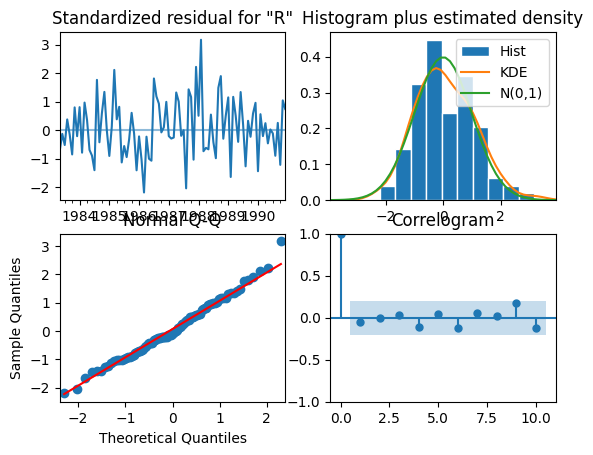

In [294]:
results_auto_SARIMA.plot_diagnostics();
plt.savefig('rose_sarima_auto_30212_diag_plot.jpg', bbox_inches='tight')

##Predict on the Test Set using this model and evaluate the model.

In [295]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(rtest))
predicted_auto_SARIMA1= results_auto_SARIMA.get_prediction(start=pd.to_datetime('1991-01-01'), dynamic=False)

In [296]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  55.237188  13.907058      27.979855      82.494520
1991-02-28  68.122541  13.990531      40.701604      95.543478
1991-03-31  67.909380  14.011597      40.447154      95.371605
1991-04-30  66.786145  14.098878      39.152852      94.419438
1991-05-31  69.761986  14.108245      42.110334      97.413638

In [297]:
predicted_auto_SARIMA1

In [298]:
rmse = mean_squared_error(rtest['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 18.88214562725671 
MAPE: 36.37650141386513


In [299]:
temp_resultsDf = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['SARIMA(3, 1, 1)(3, 0, 2, 12)'])


resultsDf = pd.concat([resultsR0,temp_resultsDf])

resultsDf

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                       36.815186       75.843732
ARIMA(2,1,2)                       36.871197       76.056213
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.882146       36.376501

In [300]:
resultsR0 = resultsDf.copy()
resultsR0.to_csv('rose_auto_sarima.csv')
resultsR0

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                       36.815186       75.843732
ARIMA(2,1,2)                       36.871197       76.056213
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.882146       36.376501

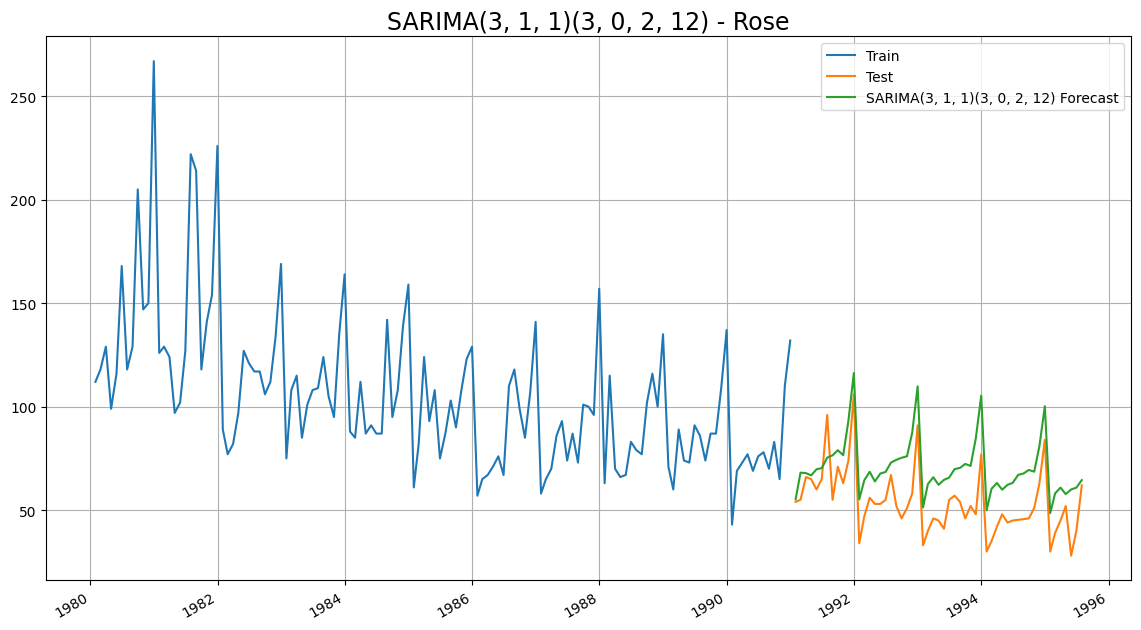

In [301]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(14, 8))
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')
# plt.plot(predicted_auto_SARIMA,label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
# predicted_auto_SARIMA.plot(label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
predicted_auto_SARIMA.predicted_mean.plot(label='SARIMA(3, 1, 1)(3, 0, 2, 12) Forecast')


plt.legend(loc='best')
plt.grid()
plt.title('SARIMA(3, 1, 1)(3, 0, 2, 12) - Rose', fontsize=17);

plt.savefig('rose_sarima_auto_30212.jpg', bbox_inches='tight');

##Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12

Let us look at the ACF and the PACF plots once more.

<Figure size 1400x800 with 0 Axes>

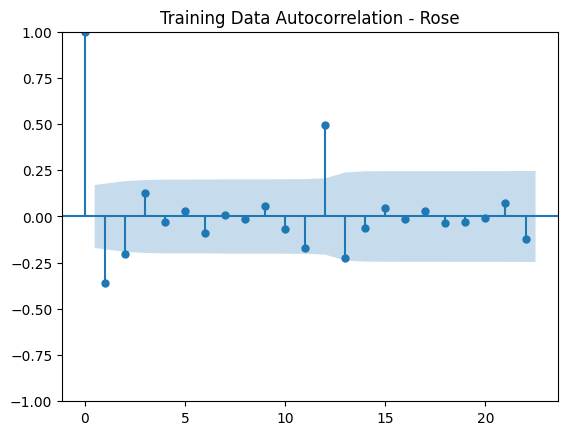

<Figure size 1400x800 with 0 Axes>

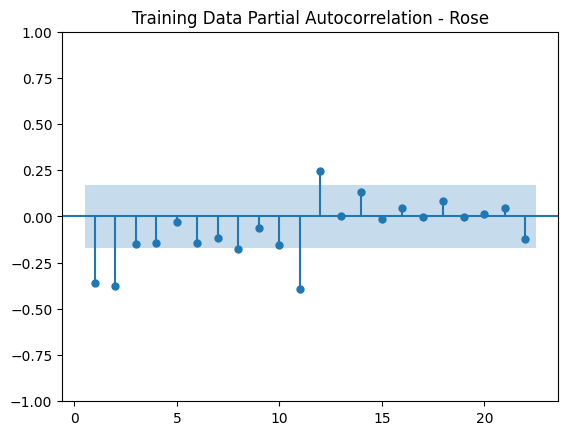

In [302]:
plt.figure(figsize=(14, 8))
plot_acf(rtrain.diff(),title='Training Data Autocorrelation - Rose',missing='drop')
plt.figure(figsize=(14, 8))
plot_pacf(rtrain.diff().dropna(),title='Training Data Partial Autocorrelation - Rose',zero=False,method='ywmle');

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12 We are taking the p value to be 2 and the q value also to be 2 as the parameters same as the ARIMA model.

1.The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0.

2.The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 3.

In [303]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -379.498
Date:                            Sat, 13 Apr 2024   AIC                            776.996
Time:                                    15:05:23   BIC                            799.692
Sample:                                01-31-1980   HQIC                           786.156
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8551      0.146     -5.838      0.000      -1.142      -0.568
ar.L2         -0.0022      0.125   

In [304]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(2,1,2),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA1 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -334.893
Date:                            Sat, 13 Apr 2024   AIC                            689.786
Time:                                    15:05:38   BIC                            713.730
Sample:                                01-31-1980   HQIC                           699.393
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7094      0.403      1.758      0.079      -0.081       1.500
ar.L2         -0.1492      0.176   

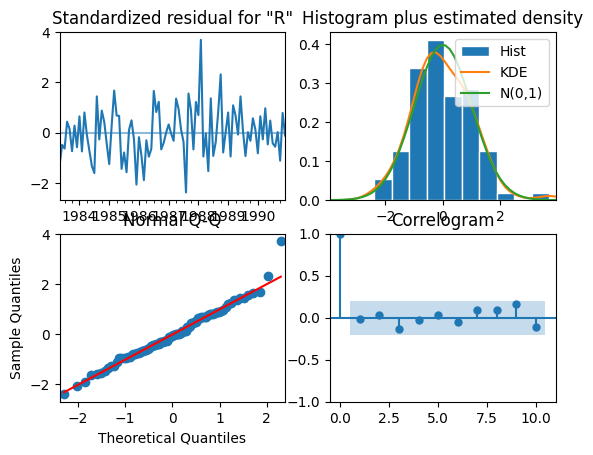

In [305]:
results_manual_SARIMA.plot_diagnostics()
plt.savefig('rose_sarima_21212.jpg', bbox_inches='tight');

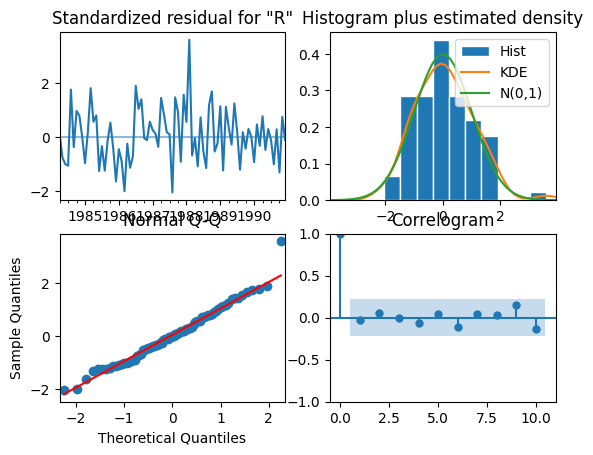

In [306]:
results_manual_SARIMA1.plot_diagnostics()
plt.savefig('rose_sarima_31212.jpg', bbox_inches='tight');

##Predict on the Test Set using this model and evaluate the model.

In [307]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(rtest))

predicted_manual_SARIMA1 = results_manual_SARIMA1.get_forecast(steps=len(rtest))

In [308]:
rmse = mean_squared_error(rtest['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 16.55099114648597 
MAPE: 25.47756874607696


In [309]:
rmse = mean_squared_error(rtest['Rose'],predicted_manual_SARIMA1.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_SARIMA1.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 15.360839199254016 
MAPE: 22.9648904357463


In [310]:
temp_resultsDf = pd.DataFrame({'Test RMSE Rose': [rmse],'Test MAPE Rose':mape}
                           ,index=['SARIMA(2,1,2)(3,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                       36.815186       75.843732
ARIMA(2,1,2)                       36.871197       76.056213
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.882146       36.376501
SARIMA(2,1,2)(3,1,2,12)            15.360839       22.964890

In [311]:
resultsR0 = resultsDf.copy()

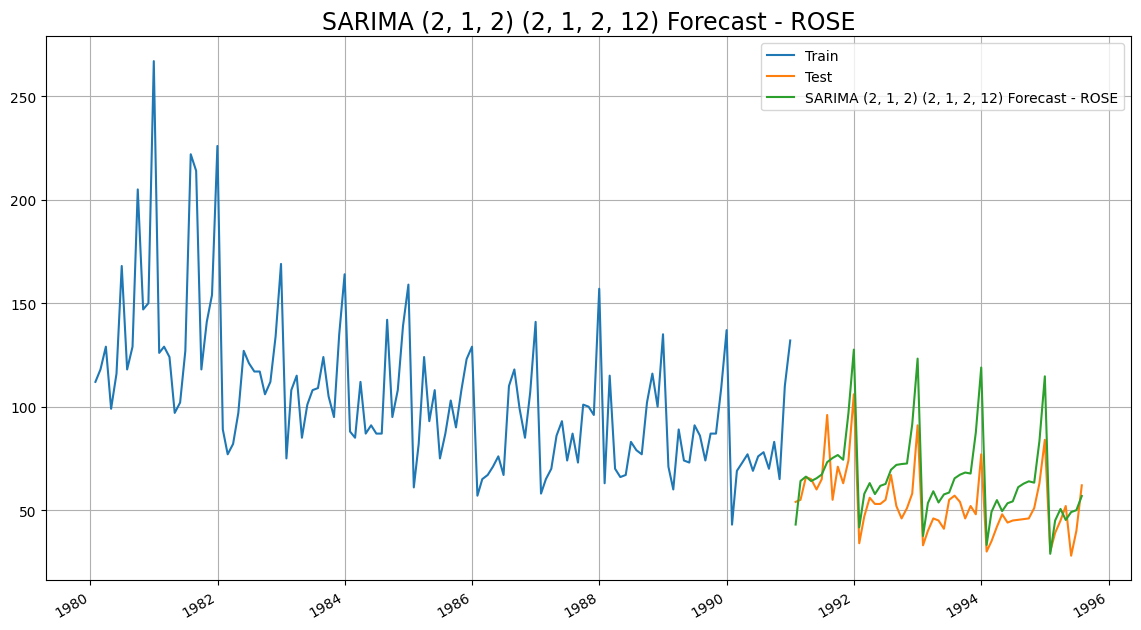

In [312]:
plt.figure(figsize=(14, 8))
plt.plot(rtrain, label='Train')
plt.plot(rtest, label ='Test')

predicted_manual_SARIMA.predicted_mean.plot(label = 'SARIMA (2, 1, 2) (2, 1, 2, 12) Forecast - ROSE')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (2, 1, 2) (2, 1, 2, 12) Forecast - ROSE', fontsize=17)
plt.savefig('rose_sarima_manual_forecast.jpg', bbox_inches='tight');

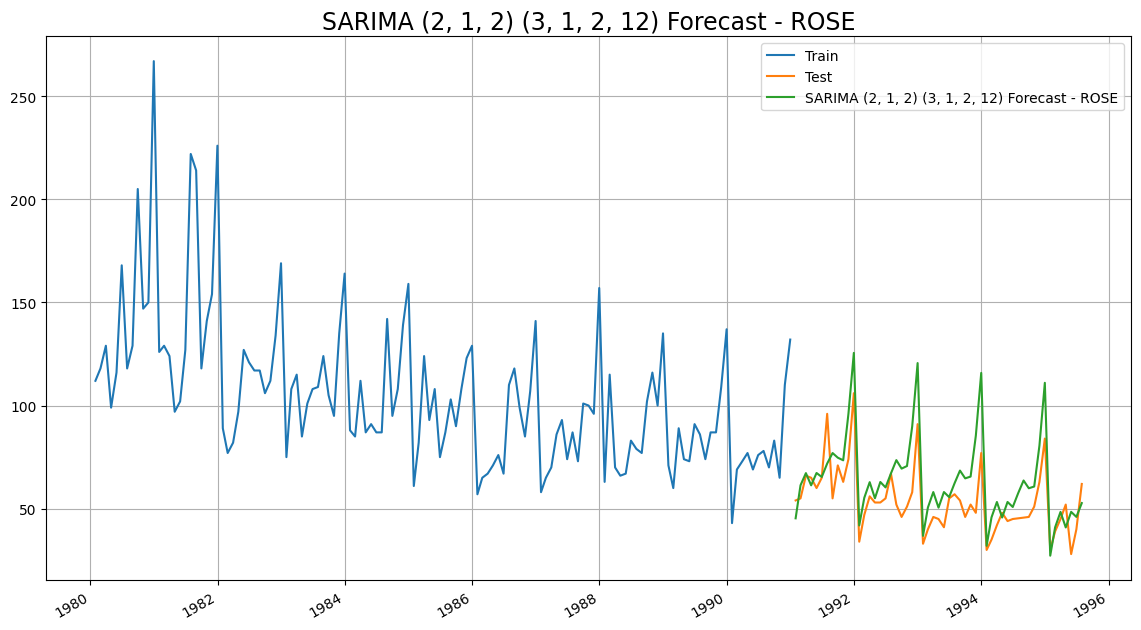

In [313]:
plt.figure(figsize=(14, 8))
plt.plot(rtrain, label='Train')
plt.plot(rtest, label ='Test')

predicted_manual_SARIMA1.predicted_mean.plot(label = 'SARIMA (2, 1, 2) (3, 1, 2, 12) Forecast - ROSE')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (2, 1, 2) (3, 1, 2, 12) Forecast - ROSE', fontsize=17)
plt.savefig('rose_sarima_manual_forecast1.jpg', bbox_inches='tight');

##Building the most optimum model on the Full Data.

Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

In [314]:
full_data_model = sm.tsa.statespace.SARIMAX(dfr['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -587.531
Date:                            Sat, 13 Apr 2024   AIC                           1193.062
Time:                                    15:05:48   BIC                           1219.976
Sample:                                01-31-1980   HQIC                          1203.997
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8649      0.101     -8.561      0.000      -1.063      -0.667
ar.L2          0.0340      0.091   

##Evaluate the model on the whole data and predict 12 months into the future

In [315]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [316]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  43.083340  12.674114      18.242534      67.924146
1995-09-30  43.341396  12.959900      17.940459      68.742334
1995-10-31  45.826957  12.963894      20.418191      71.235723
1995-11-30  57.397169  13.124617      31.673392      83.120947
1995-12-31  85.074774  13.133444      59.333697     110.815851

In [317]:
rmse = mean_squared_error(dfr['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 35.91094928664499


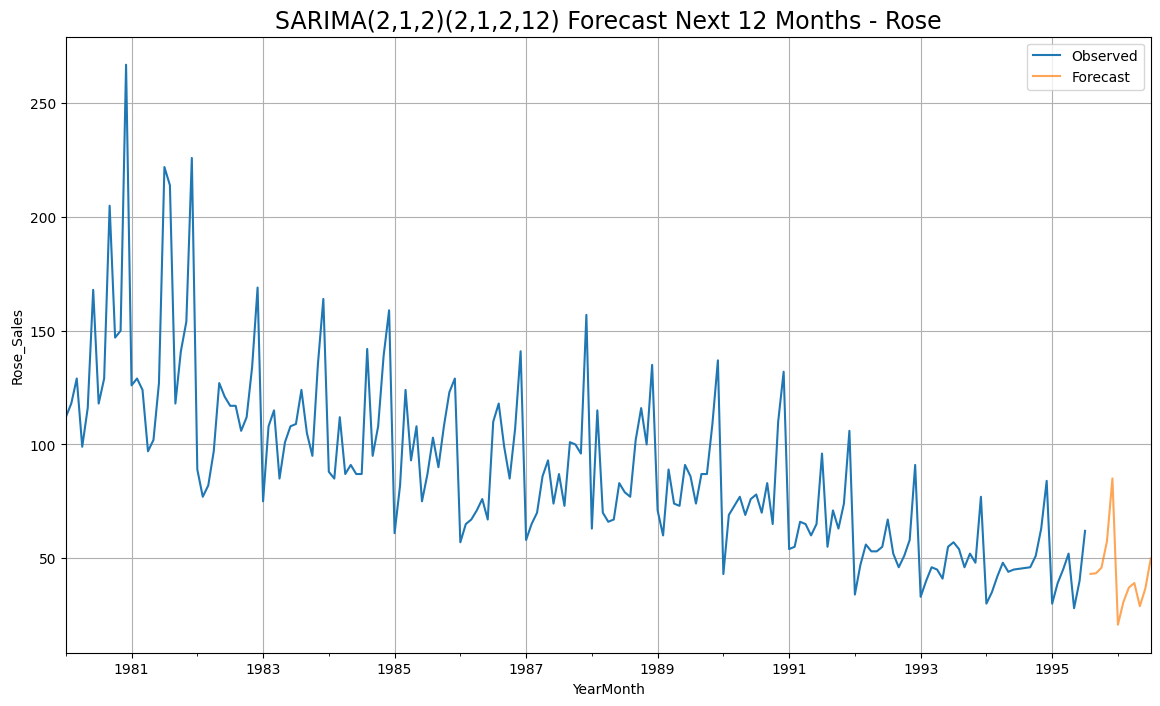

In [318]:
plt.figure(figsize=(14, 8))
axis = dfr['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('YearMonth')
axis.set_ylabel('Rose_Sales')
plt.legend(loc='best')
plt.grid();
plt.title('SARIMA(2,1,2)(2,1,2,12) Forecast Next 12 Months - Rose', fontsize=17);
plt.savefig('rose_forecast.jpg', bbox_inches='tight');

In [319]:
resultsDf

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                       36.815186       75.843732
ARIMA(2,1,2)                       36.871197       76.056213
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.882146       36.376501
SARIMA(2,1,2)(3,1,2,12)            15.360839       22.964890

In [320]:
resultsR0 = resultsDf.copy()
resultsR0.to_csv('rose_all_arima.csv')

In [321]:
results_rose = pd.concat([resultsDf14, resultsR0], axis=0)
results_rose

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796225   
Double Exponential Smoothing                             15.270968   
Triple Exponential Smoothing (Additive Season)           14.243240   
Triple Exponential Smoothing (Multiplicative Se...       19.113110   
ARIMA(2,1,3)                                             36.815186   
ARIMA(2,1,2)                                             36.871197   
SARIMA(3, 1, 1)(3, 0, 2, 12)                             18.882146   
SARIMA(2,1,2)(3,1,2,12)                                  15.360839   

                                                    Test RMSE Sparkling  \
RegressionOnTime                                            1389.135175   
NaiveModel                                                  3864.279352   
SimpleAverageModel                                          1275.081804   
2pointTrailingMovingAverage                                  813.400684   
4pointTrailingMovingAverage                                 1156.589694   
6pointTrailingMovingAverage                                 1283.927428   
9pointTrailingMovingAverage                                 1346.278315   
Simple Exponential Smoothing                                1338.004623   
Double Exponential Smoothing                                5291.879833   
Triple Exponential Smoothing (Additive Season)               378.626241   
Triple Exponential Smoothing (Multiplicative Se...           403.706228   
ARIMA(2,1,3)                                                        NaN   
ARIMA(2,1,2)                                                        NaN   
SARIMA(3, 1, 1)(3, 0, 2, 12)                                        NaN   
SARIMA(2,1,2)(3,1,2,12)                                             NaN   

                                                    Test MAPE Rose  
RegressionOnTime                                               NaN  
NaiveModel                                                     NaN  
SimpleAverageModel                                             NaN  
2pointTrailingMovingAverage                                    NaN  
4pointTrailingMovingAverage                                    NaN  
6pointTrailingMovingAverage                                    NaN  
9pointTrailingMovingAverage                                    NaN  
Simple Exponential Smoothing                                   NaN  
Double Exponential Smoothing                                   NaN  
Triple Exponential Smoothing (Additive Season)                 NaN  
Triple Exponential Smoothing (Multiplicative Se...             NaN  
ARIMA(2,1,3)                                             75.843732  
ARIMA(2,1,2)                                             76.056213  
SARIMA(3, 1, 1)(3, 0, 2, 12)                             36.376501  
SARIMA(2,1,2)(3,1,2,12)                                  22.964890

In [322]:
results_rose.sort_values(by=['Test RMSE Rose']).to_csv('results_rose.csv')

In [323]:
resultsDf.sort_values(by=['Test RMSE Rose'])

Test RMSE Rose  Test MAPE Rose
SARIMA(2,1,2)(3,1,2,12)            15.360839       22.964890
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.882146       36.376501
ARIMA(2,1,3)                       36.815186       75.843732
ARIMA(2,1,2)                       36.871197       76.056213

#ARIMA / SARIMA Modelling on SPARKLING dataset

##Check for stationarity of the Training Data - Sparkling

Let us plot the training data once.

<Figure size 1400x800 with 0 Axes>

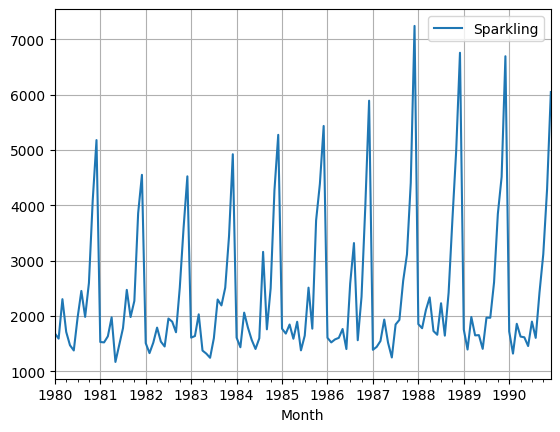

<Figure size 1400x800 with 0 Axes>

In [324]:

strain.plot(grid=True);
plt.figure(figsize=(14, 8))

In [325]:
dftest = adfuller(strain,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.062
DF test p-value is 0.5674110388593714
Number of lags used 12


The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

In [326]:
dftest = adfuller(strain.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -7.968
DF test p-value is 8.4792106555143e-11
Number of lags used 11


Training data is now Stationary Now, let us go ahead and plot the differenced training data.

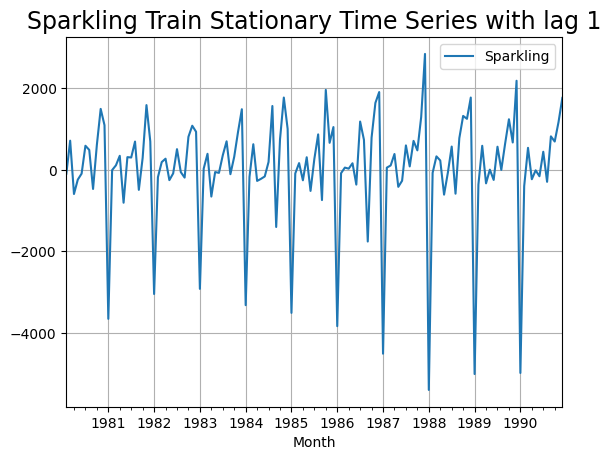

In [327]:
strain.diff().dropna().plot(grid=True);
plt.title('Sparkling Train Stationary Time Series with lag 1', fontsize=17);
plt.savefig('spark_train_stationary.jpg', bbox_inches='tight');

In [328]:
strain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


##Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC) - SPARKLING

Note: The data has some seasonality so ideally we should build a SARIMA model. But we'll check least AIC of ARIMA and then SARIMA

In [329]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [330]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [331]:
from statsmodels.tsa.arima.model import ARIMA


for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(strain['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    #ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    ARIMA_AIC.loc[len(ARIMA_AIC)] = {'param': param, 'AIC': ARIMA_model.aic}
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.0600155919765
ARIMA(0, 1, 2) - AIC:2234.4083231352784
ARIMA(0, 1, 3) - AIC:2233.994857751357
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.755094674255
ARIMA(1, 1, 2) - AIC:2234.5272004518056
ARIMA(1, 1, 3) - AIC:2235.607815816486
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.777626238336
ARIMA(2, 1, 2) - AIC:2213.5092125741553
ARIMA(2, 1, 3) - AIC:2232.8129550828717
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.5004238522542
ARIMA(3, 1, 2) - AIC:2230.789978305661
ARIMA(3, 1, 3) - AIC:2221.4573978076833


In [332]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
10  (2, 1, 2)  2213.509213
15  (3, 1, 3)  2221.457398
14  (3, 1, 2)  2230.789978
11  (2, 1, 3)  2232.812955
9   (2, 1, 1)  2233.777626

In [333]:
auto_ARIMA = ARIMA(strain, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sat, 13 Apr 2024   AIC                           2213.509
Time:                        15:05:56   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.215      0.0

##Diagnostics plot - Sparkling

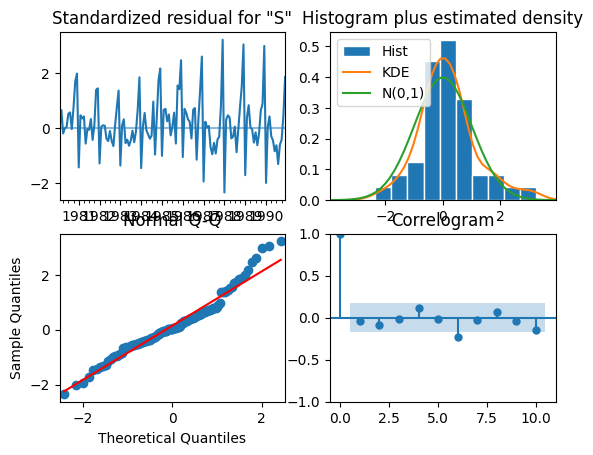

In [334]:
results_auto_ARIMA.plot_diagnostics();
plt.savefig('spark_arima_diag_plot.jpg', bbox_inches='tight');

##Predict on the Test Set using this model and evaluate the model.

In [335]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(stest))

In [336]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [337]:
rmse = mean_squared_error(stest['Sparkling'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1299.9797494286825 
MAPE: 47.099993969420964


In [338]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])

resultsDf.to_csv('spark_arima_auto_212.csv')

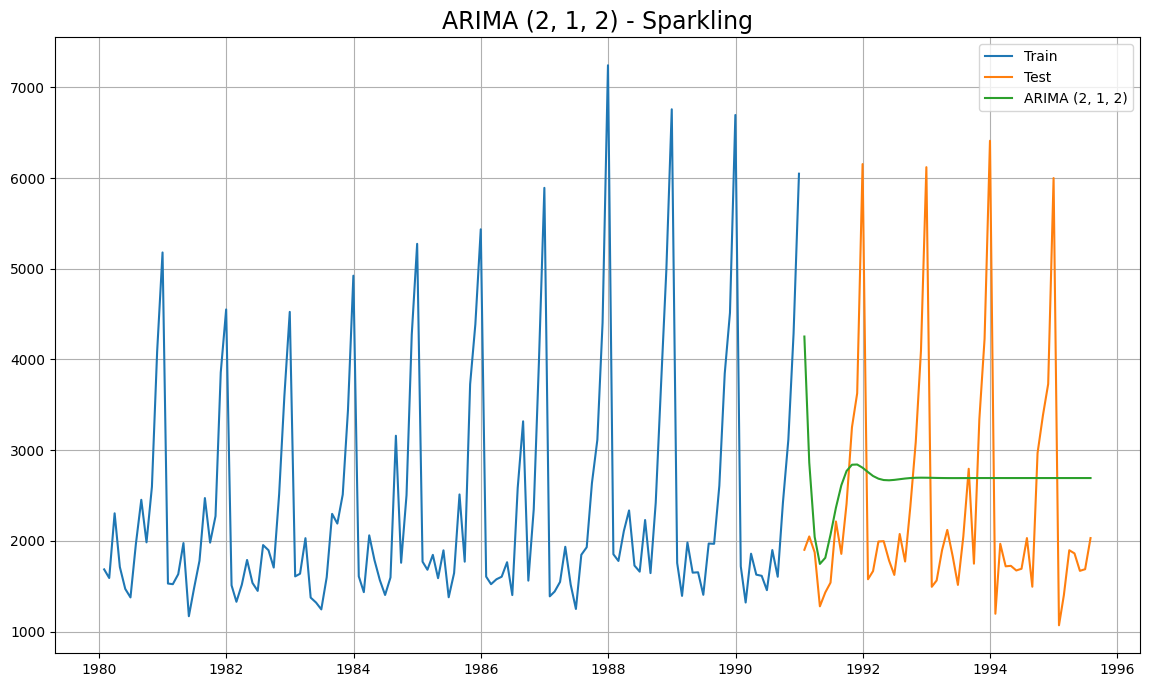

In [339]:
plt.figure(figsize=(14, 8))
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
plt.plot(predicted_auto_ARIMA, label='ARIMA (2, 1, 2)')

plt.title('ARIMA (2, 1, 2) - Sparkling', fontsize=17)
plt.grid()
plt.legend(loc='best')

plt.savefig('spark_arima_auto_212.jpg', bbox_inches='tight');

## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots - SPARKLING

Let us look at the ACF and the PACF plots once more.

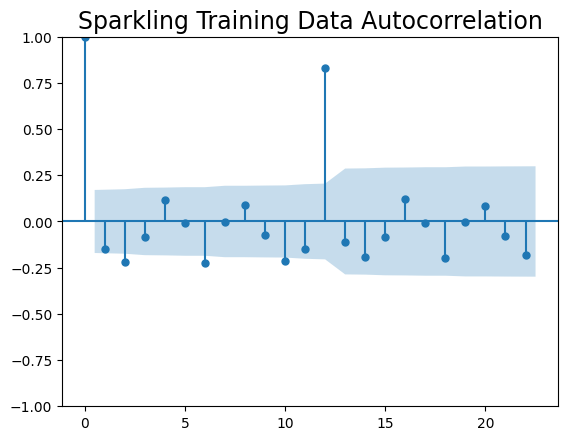

In [340]:
plot_acf(strain.diff(),missing='drop')
plt.title('Sparkling Training Data Autocorrelation', fontsize=17)
plt.savefig('spark_train_acf.jpg', bbox_inches='tight');

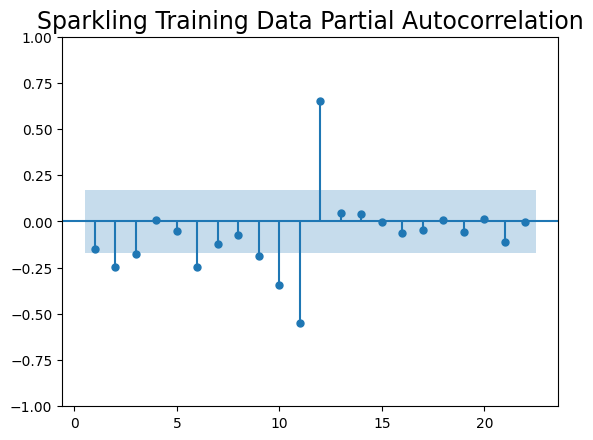

In [341]:
plot_pacf(strain.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.title('Sparkling Training Data Partial Autocorrelation', fontsize=17)
plt.savefig('spark_train_pacf.jpg', bbox_inches='tight');

By looking at the above plots, we will take the value of p and q to be 0 and 0 respectively.

In [342]:
manual_ARIMA = ARIMA(strain['Sparkling'], order=(0,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Sat, 13 Apr 2024   AIC                           2267.663
Time:                        15:06:00   BIC                           2270.538
Sample:                    01-31-1980   HQIC                          2268.831
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                              0.08   Pr

Let us analyse the residuals from the various diagnostics plot.

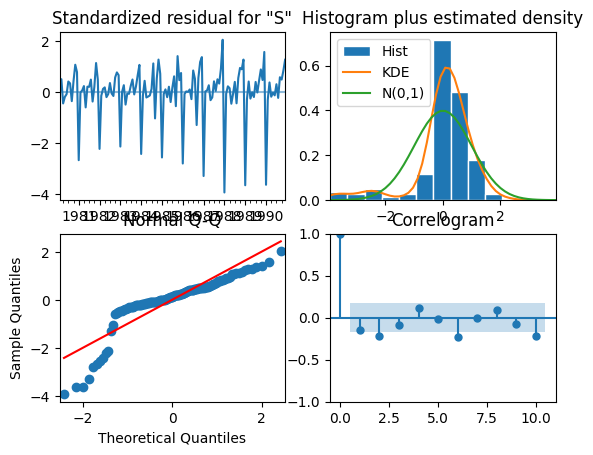

In [343]:
results_manual_ARIMA.plot_diagnostics();

plt.savefig('spark_train_diag_plot.jpg', bbox_inches='tight');

##Predict on the Test Set using this model and evaluate the model.

In [344]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(stest))

In [345]:
rmse = mean_squared_error(stest['Sparkling'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 3864.2793518443914 
MAPE: 201.3276495035274


In [346]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(0,1,0)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE        MAPE
ARIMA(2,1,2)  1299.979749   47.099994
ARIMA(0,1,0)  3864.279352  201.327650

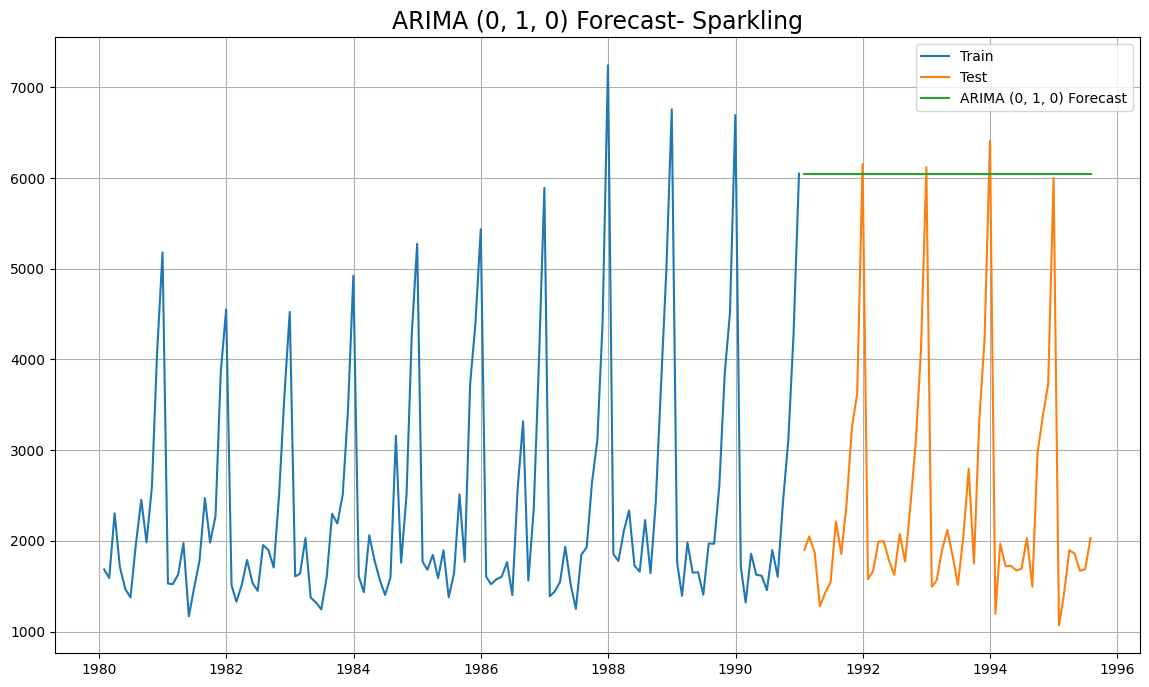

In [347]:
plt.figure(figsize=(14, 8))
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
plt.plot(predicted_manual_ARIMA, label='ARIMA (0, 1, 0) Forecast')

plt.grid()
plt.legend(loc='best')
plt.title('ARIMA (0, 1, 0) Forecast- Sparkling', fontsize=17)
plt.savefig('spark_manual_arima_010.jpg', bbox_inches='tight');

##Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC) - SPARKLING

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

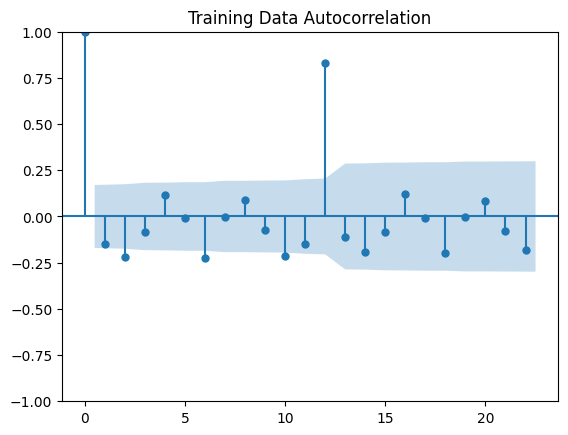

In [348]:
plot_acf(strain.diff(),title='Training Data Autocorrelation',missing='drop');

We can see that there is a seasonality.

In [349]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [350]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [351]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(strain['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        #SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        SARIMA_AIC.loc[len(SARIMA_AIC)] = {'param': param, 'seasonal':param_seasonal,'AIC': ARIMA_model.aic}

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616844573
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.153364023447
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:4047.750993647416
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456677
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.990530138882
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791837
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:4198.7747798418895
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158613616
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920804
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3534.298287308879
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1467.4574095308406
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1469.1871052625634
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1471.0594530064295
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:1660.0206716336645
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566603
SARIMA(0, 1, 1)

In [352]:
SARIMA_AIC.sort_values(by=['AIC']).head(40)

param       seasonal          AIC
0    (0, 1, 0)  (0, 0, 0, 12)  2221.457398
162  (2, 1, 2)  (0, 0, 2, 12)  2221.457398
163  (2, 1, 2)  (0, 0, 3, 12)  2221.457398
164  (2, 1, 2)  (1, 0, 0, 12)  2221.457398
165  (2, 1, 2)  (1, 0, 1, 12)  2221.457398
166  (2, 1, 2)  (1, 0, 2, 12)  2221.457398
167  (2, 1, 2)  (1, 0, 3, 12)  2221.457398
168  (2, 1, 2)  (2, 0, 0, 12)  2221.457398
169  (2, 1, 2)  (2, 0, 1, 12)  2221.457398
170  (2, 1, 2)  (2, 0, 2, 12)  2221.457398
171  (2, 1, 2)  (2, 0, 3, 12)  2221.457398
172  (2, 1, 2)  (3, 0, 0, 12)  2221.457398
173  (2, 1, 2)  (3, 0, 1, 12)  2221.457398
174  (2, 1, 2)  (3, 0, 2, 12)  2221.457398
161  (2, 1, 2)  (0, 0, 1, 12)  2221.457398
175  (2, 1, 2)  (3, 0, 3, 12)  2221.457398
177  (2, 1, 3)  (0, 0, 1, 12)  2221.457398
178  (2, 1, 3)  (0, 0, 2, 12)  2221.457398
179  (2, 1, 3)  (0, 0, 3, 12)  2221.457398
180  (2, 1, 3)  (1, 0, 0, 12)  2221.457398
181  (2, 1, 3)  (1, 0, 1, 12)  2221.457398
182  (2, 1, 3)  (1, 0, 2, 12)  2221.457398
183  (2, 1, 3)  (1, 0, 3, 12)  2221.457398
184  (2, 1, 3)  (2, 0, 0, 12)  2221.457398
185  (2, 1, 3)  (2, 0, 1, 12)  2221.457398
186  (2, 1, 3)  (2, 0, 2, 12)  2221.457398
187  (2, 1, 3)  (2, 0, 3, 12)  2221.457398
188  (2, 1, 3)  (3, 0, 0, 12)  2221.457398
189  (2, 1, 3)  (3, 0, 1, 12)  2221.457398
176  (2, 1, 3)  (0, 0, 0, 12)  2221.457398
190  (2, 1, 3)  (3, 0, 2, 12)  2221.457398
160  (2, 1, 2)  (0, 0, 0, 12)  2221.457398
158  (2, 1, 1)  (3, 0, 2, 12)  2221.457398
130  (2, 1, 0)  (0, 0, 2, 12)  2221.457398
131  (2, 1, 0)  (0, 0, 3, 12)  2221.457398
132  (2, 1, 0)  (1, 0, 0, 12)  2221.457398
133  (2, 1, 0)  (1, 0, 1, 12)  2221.457398
134  (2, 1, 0)  (1, 0, 2, 12)  2221.457398
135  (2, 1, 0)  (1, 0, 3, 12)  2221.457398
136  (2, 1, 0)  (2, 0, 0, 12)  2221.457398

In [353]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [], 12)   Log Likelihood                -685.894
Date:                             Sat, 13 Apr 2024   AIC                           1387.788
Time:                                     15:18:41   BIC                           1407.963
Sample:                                 01-31-1980   HQIC                          1395.931
                                      - 12-31-1990                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1615      0.150      1.075      0.282      -0.133       0.456
ar.L2         -0.0928      

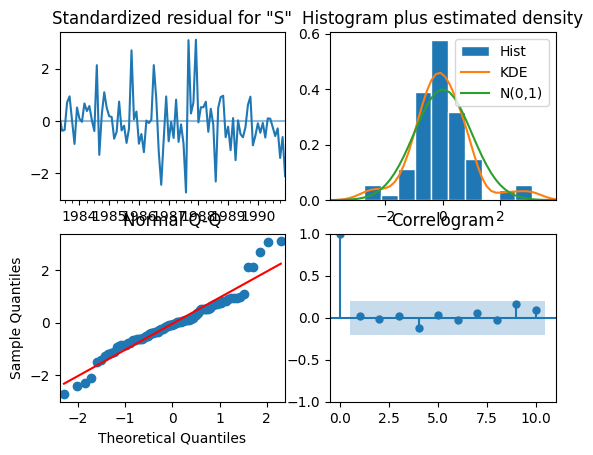

In [354]:
results_auto_SARIMA.plot_diagnostics()
plt.savefig('spark_sarima00312_diag_plot.jpg', bbox_inches='tight');
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [355]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(stest))

In [356]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  1389.352553  415.860907     574.280152    2204.424954
1991-02-28  1224.639994  427.862873     386.044172    2063.235816
1991-03-31  1673.308894  428.007628     834.429357    2512.188430
1991-04-30  1533.299236  432.772877     685.079983    2381.518489
1991-05-31  1425.942821  435.886701     571.620586    2280.265057

In [357]:
rmse = mean_squared_error(stest['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 601.2542692705748 
MAPE: 25.87121398561717


In [358]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(3,1,1)(3,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE        MAPE
ARIMA(2,1,2)             1299.979749   47.099994
ARIMA(0,1,0)             3864.279352  201.327650
SARIMA(3,1,1)(3,0,2,12)   601.254269   25.871214

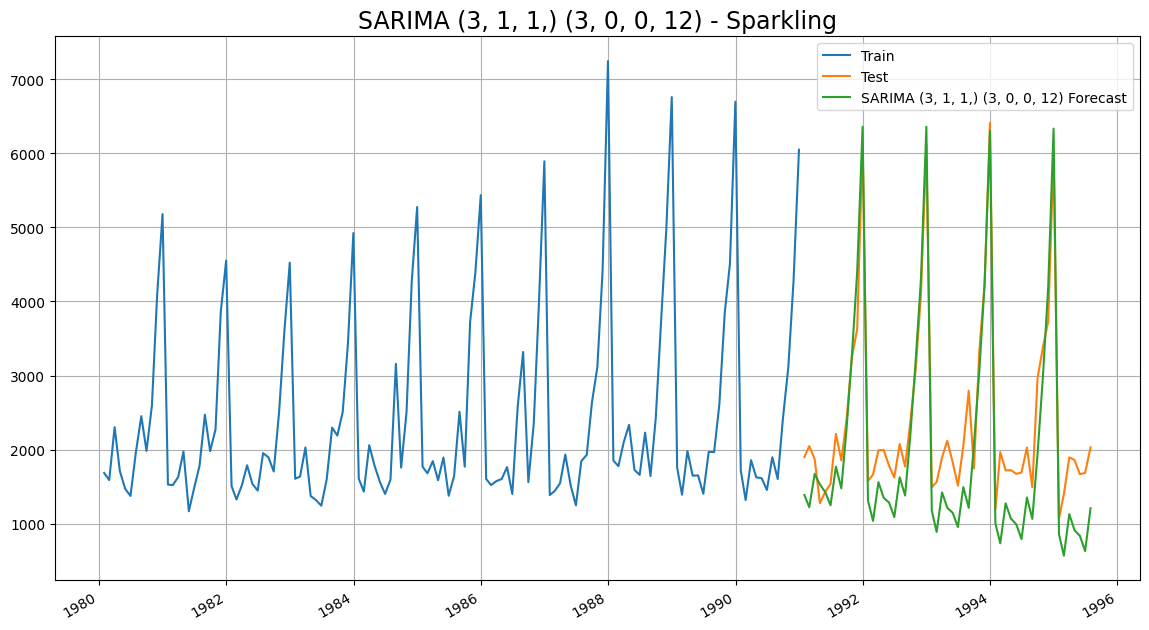

In [359]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(14, 8))
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
# plt.plot(predicted_auto_SARIMA,label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
# predicted_auto_SARIMA.plot(label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
predicted_auto_SARIMA.predicted_mean.plot(label='SARIMA (3, 1, 1,) (3, 0, 0, 12) Forecast')


plt.legend(loc='best')
plt.grid()
plt.title('SARIMA (3, 1, 1,) (3, 0, 0, 12) - Sparkling', fontsize=17);

plt.savefig('spark_sarima_auto_30012.jpg', bbox_inches='tight');

##Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12 - SPARKLING

Let us look at the ACF and the PACF plots once more.

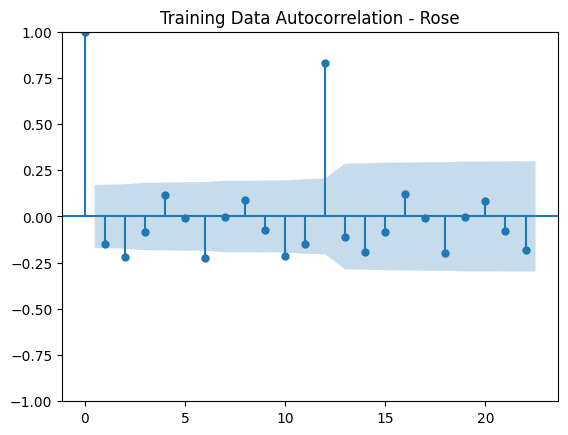

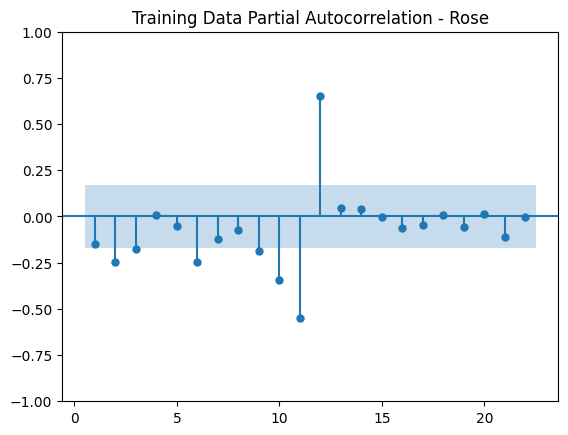

In [360]:
plot_acf(strain.diff(),title='Training Data Autocorrelation - Rose',missing='drop')
plot_pacf(strain.diff().dropna(),title='Training Data Partial Autocorrelation - Rose',zero=False,method='ywmle');

In [361]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                      SARIMAX Results                                       
Dep. Variable:                            Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -811.162
Date:                              Sat, 13 Apr 2024   AIC                           1628.324
Time:                                      15:18:45   BIC                           1636.315
Sample:                                  01-31-1980   HQIC                          1631.563
                                       - 12-31-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.1482      0.223      0.664      0.507      -0.289       0.586
ma.S.L12      -0.57

In [362]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA1 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA1.summary())

                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(2, 1, [1, 2], 12)   Log Likelihood                -722.996
Date:                                 Sat, 13 Apr 2024   AIC                           1455.991
Time:                                         15:18:46   BIC                           1468.708
Sample:                                     01-31-1980   HQIC                          1461.128
                                          - 12-31-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.2445      0.879     -0.278      0.781      -1.967       1

In [363]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA2 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA2.summary())

                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(3, 1, [1, 2], 12)   Log Likelihood                -638.304
Date:                                 Sat, 13 Apr 2024   AIC                           1288.607
Time:                                         15:18:49   BIC                           1303.120
Sample:                                     01-31-1980   HQIC                          1294.438
                                          - 12-31-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -1.0545      0.201     -5.254      0.000      -1.448      -0

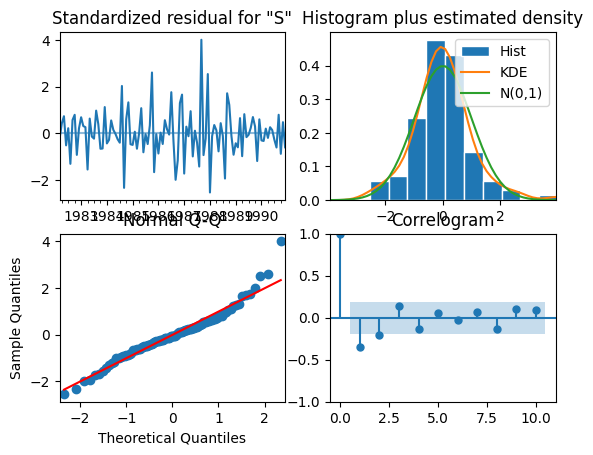

In [364]:
results_manual_SARIMA.plot_diagnostics()
plt.savefig('spark_sarima_11112.jpg', bbox_inches='tight');

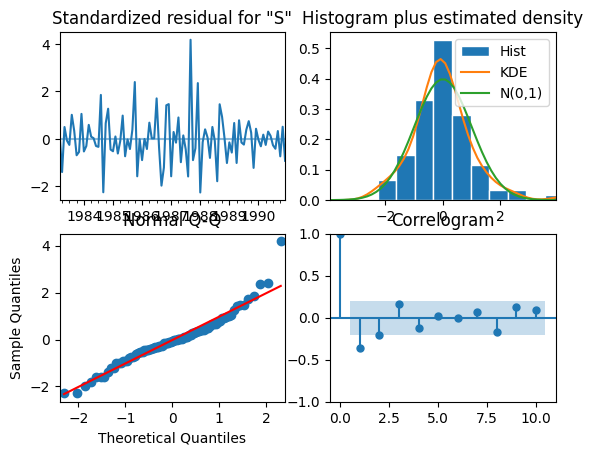

In [365]:
results_manual_SARIMA1.plot_diagnostics()
plt.savefig('spark_sarima_21212.jpg', bbox_inches='tight');

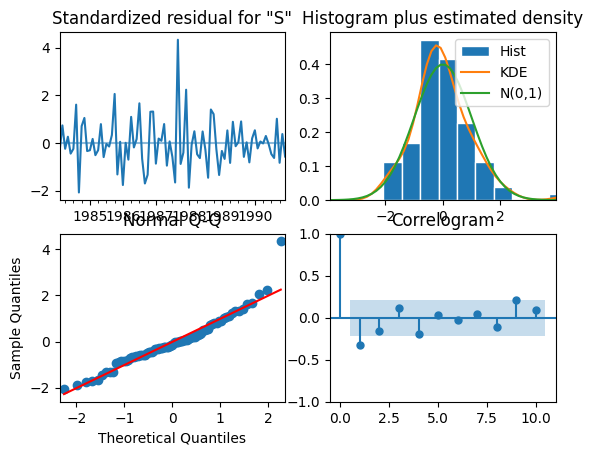

In [366]:
results_manual_SARIMA2.plot_diagnostics()
plt.savefig('spark_sarima_31212.jpg', bbox_inches='tight');

##Predict on the Test Set using this model and evaluate the model.

In [367]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(stest))

predicted_manual_SARIMA1 = results_manual_SARIMA1.get_forecast(steps=len(stest))

predicted_manual_SARIMA2 = results_manual_SARIMA2.get_forecast(steps=len(stest))

In [368]:
rmse = mean_squared_error(stest['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1189.835768813316 
MAPE: 54.87253499800154


In [369]:
rmse1 = mean_squared_error(stest['Sparkling'],predicted_manual_SARIMA1.predicted_mean,squared=False)
mape1 = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_SARIMA1.predicted_mean)
print('RMSE:',rmse1,'\nMAPE:',mape1)

RMSE: 1757.727605465248 
MAPE: 81.78526845041715


In [370]:
rmse2 = mean_squared_error(stest['Sparkling'],predicted_manual_SARIMA2.predicted_mean,squared=False)
mape2 = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_SARIMA2.predicted_mean)
print('RMSE:',rmse2,'\nMAPE:',mape2)

RMSE: 1551.646297674676 
MAPE: 71.56619745359744


In [371]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse, rmse1, rmse2],'MAPE':[mape, mape1, mape2]}
                           ,index=['SARIMA(0,1,0)(3,1,2,12)', 'SARIMA(0,1,0)(2,1,2,12)', 'SARIMA(0,1,0)(3,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE        MAPE
ARIMA(2,1,2)             1299.979749   47.099994
ARIMA(0,1,0)             3864.279352  201.327650
SARIMA(3,1,1)(3,0,2,12)   601.254269   25.871214
SARIMA(0,1,0)(3,1,2,12)  1189.835769   54.872535
SARIMA(0,1,0)(2,1,2,12)  1757.727605   81.785268
SARIMA(0,1,0)(3,1,2,12)  1551.646298   71.566197

In [372]:
resultsR0 = resultsDf.copy()

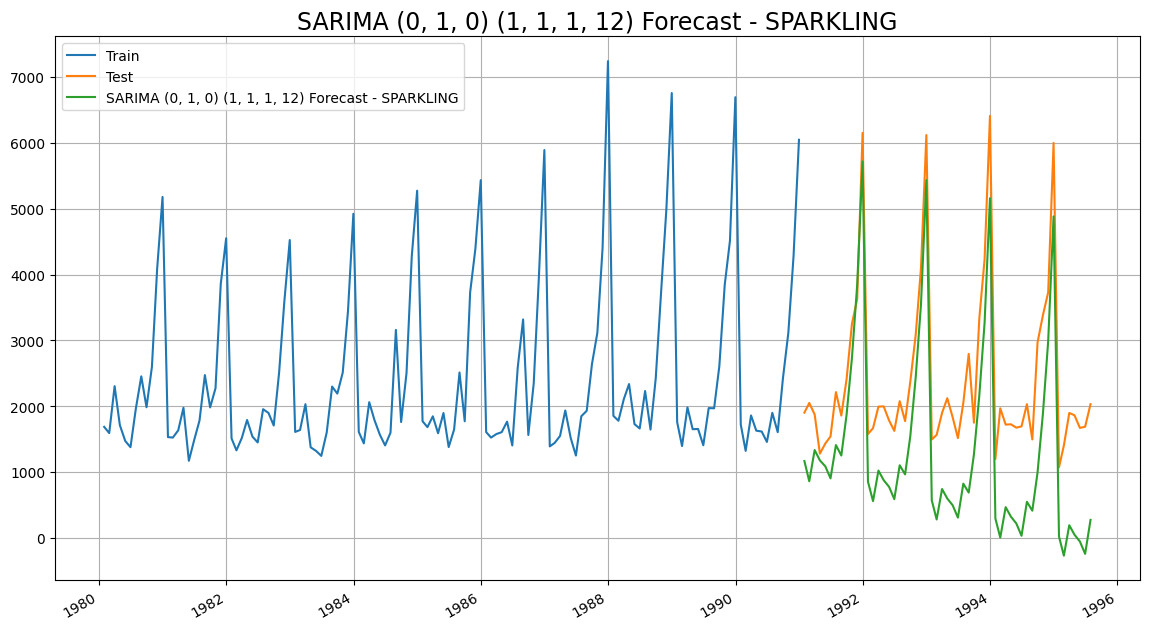

In [373]:
plt.figure(figsize=(14, 8))
plt.plot(strain, label='Train')
plt.plot(stest, label ='Test')

predicted_manual_SARIMA.predicted_mean.plot(label = 'SARIMA (0, 1, 0) (1, 1, 1, 12) Forecast - SPARKLING')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (0, 1, 0) (1, 1, 1, 12) Forecast - SPARKLING', fontsize=17)
plt.savefig('SPARK_sarima_manual_forecast_11112.jpg', bbox_inches='tight');

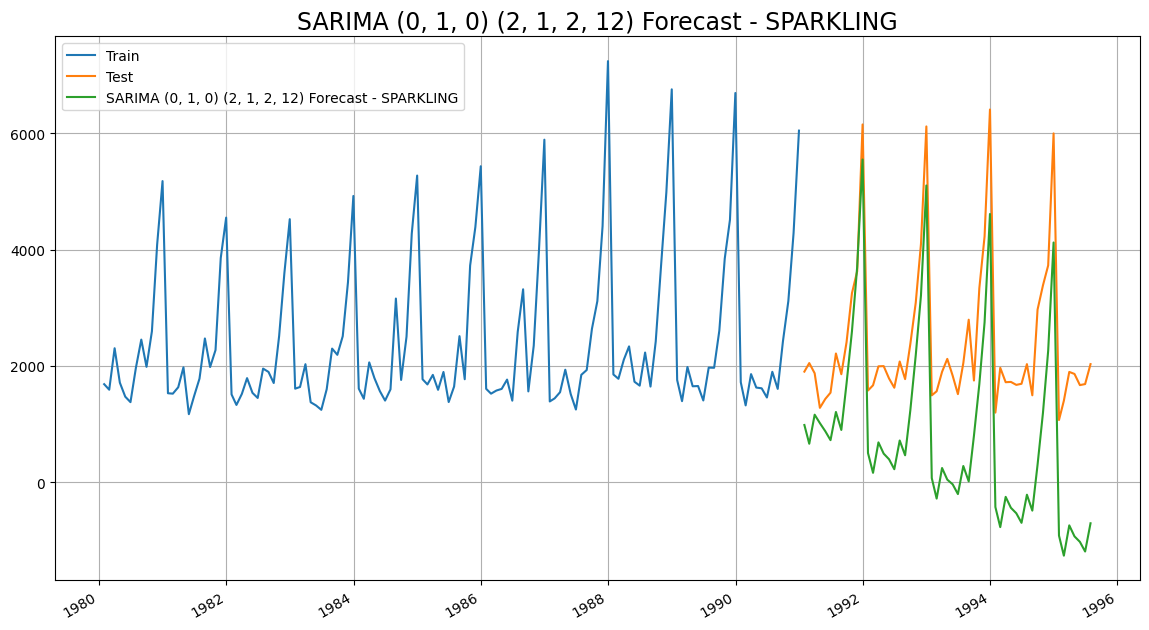

In [374]:
plt.figure(figsize=(14, 8))
plt.plot(strain, label='Train')
plt.plot(stest, label ='Test')

predicted_manual_SARIMA1.predicted_mean.plot(label = 'SARIMA (0, 1, 0) (2, 1, 2, 12) Forecast - SPARKLING')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (0, 1, 0) (2, 1, 2, 12) Forecast - SPARKLING', fontsize=17)
plt.savefig('spark_sarima_manual_forecast1.jpg', bbox_inches='tight');

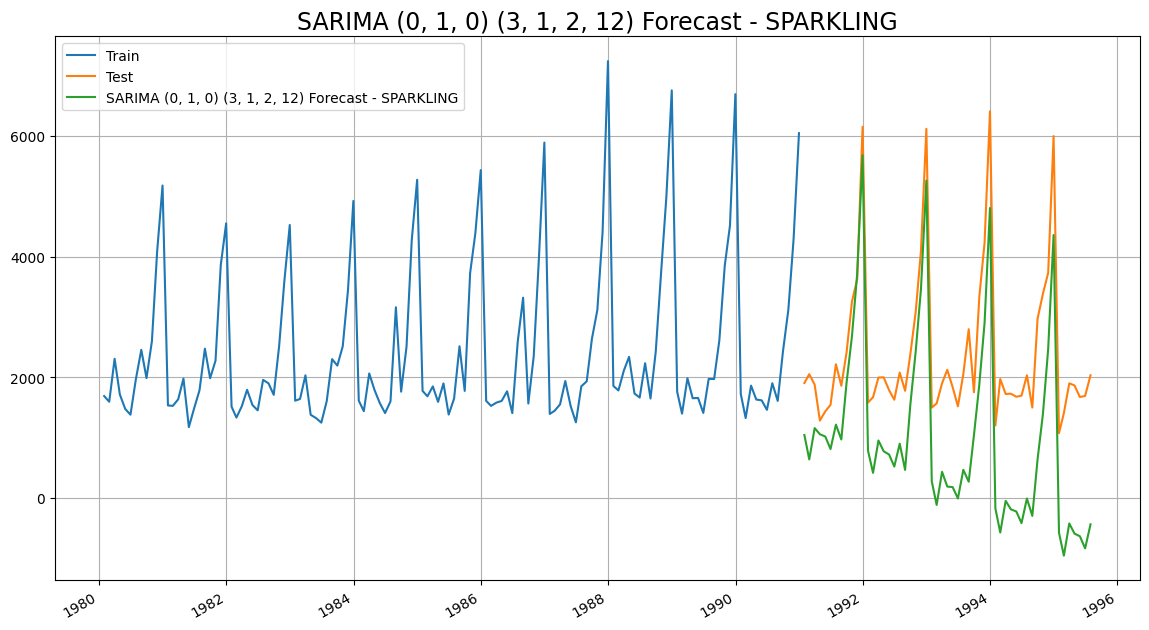

In [375]:
plt.figure(figsize=(14, 8))
plt.plot(strain, label='Train')
plt.plot(stest, label ='Test')

predicted_manual_SARIMA2.predicted_mean.plot(label = 'SARIMA (0, 1, 0) (3, 1, 2, 12) Forecast - SPARKLING')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (0, 1, 0) (3, 1, 2, 12) Forecast - SPARKLING', fontsize=17)
plt.savefig('spark_sarima_manual_forecast2.jpg', bbox_inches='tight');

## Building the most optimum model on the Full Data.

Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

In [376]:
full_data_model = sm.tsa.statespace.SARIMAX(dfr['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -587.531
Date:                            Sat, 13 Apr 2024   AIC                           1193.062
Time:                                    15:19:03   BIC                           1219.976
Sample:                                01-31-1980   HQIC                          1203.997
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8649      0.101     -8.561      0.000      -1.063      -0.667
ar.L2          0.0340      0.091   

## Evaluate the model on the whole data and predict 12 months into the future

In [377]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [378]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  43.083340  12.674114      18.242534      67.924146
1995-09-30  43.341396  12.959900      17.940459      68.742334
1995-10-31  45.826957  12.963894      20.418191      71.235723
1995-11-30  57.397169  13.124617      31.673392      83.120947
1995-12-31  85.074774  13.133444      59.333697     110.815851

In [379]:
rmse = mean_squared_error(dfr['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 35.91094928664499


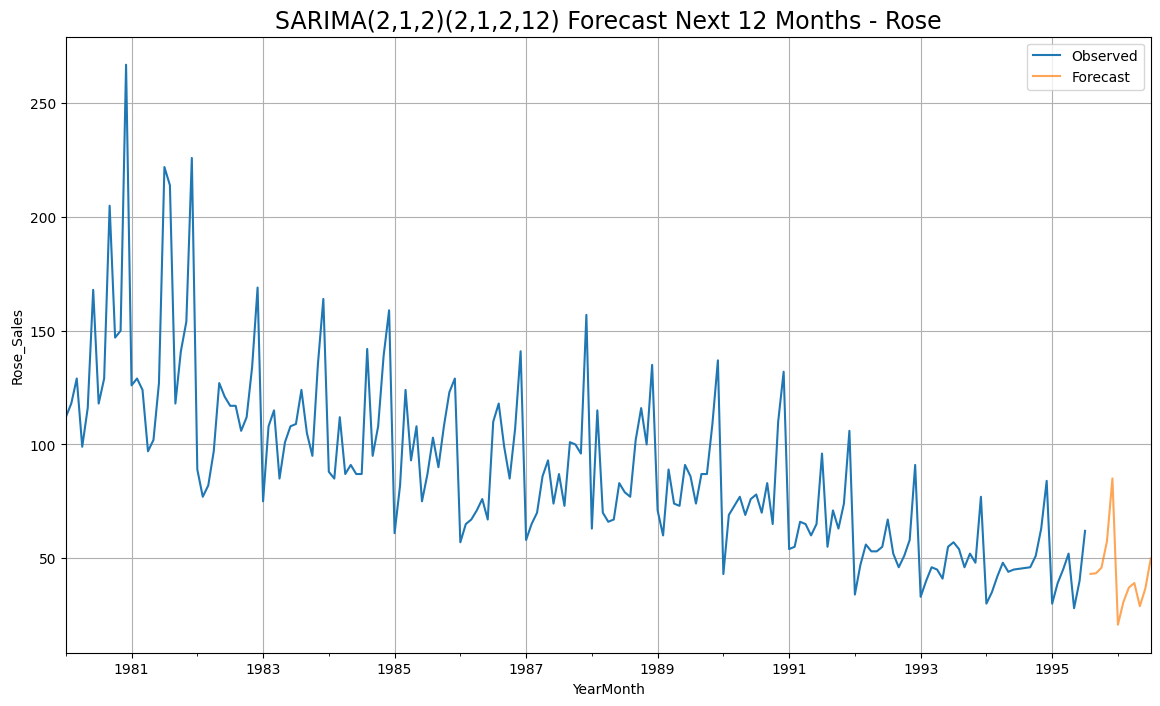

In [380]:
plt.figure(figsize=(14, 8))
axis = dfr['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('YearMonth')
axis.set_ylabel('Rose_Sales')
plt.legend(loc='best')
plt.grid();
plt.title('SARIMA(2,1,2)(2,1,2,12) Forecast Next 12 Months - Rose', fontsize=17);
plt.savefig('rose_forecast.jpg', bbox_inches='tight');

In [381]:
resultsDf

RMSE        MAPE
ARIMA(2,1,2)             1299.979749   47.099994
ARIMA(0,1,0)             3864.279352  201.327650
SARIMA(3,1,1)(3,0,2,12)   601.254269   25.871214
SARIMA(0,1,0)(3,1,2,12)  1189.835769   54.872535
SARIMA(0,1,0)(2,1,2,12)  1757.727605   81.785268
SARIMA(0,1,0)(3,1,2,12)  1551.646298   71.566197

In [382]:
resultsS0 = resultsDf.copy()

resultsS0.to_csv('spark_all_arima.csv')

In [383]:
results_all_spark = pd.concat([resultsDf14, resultsS0], axis=0)
results_all_spark

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796225   
Double Exponential Smoothing                             15.270968   
Triple Exponential Smoothing (Additive Season)           14.243240   
Triple Exponential Smoothing (Multiplicative Se...       19.113110   
ARIMA(2,1,2)                                                   NaN   
ARIMA(0,1,0)                                                   NaN   
SARIMA(3,1,1)(3,0,2,12)                                        NaN   
SARIMA(0,1,0)(3,1,2,12)                                        NaN   
SARIMA(0,1,0)(2,1,2,12)                                        NaN   
SARIMA(0,1,0)(3,1,2,12)                                        NaN   

                                                    Test RMSE Sparkling  \
RegressionOnTime                                            1389.135175   
NaiveModel                                                  3864.279352   
SimpleAverageModel                                          1275.081804   
2pointTrailingMovingAverage                                  813.400684   
4pointTrailingMovingAverage                                 1156.589694   
6pointTrailingMovingAverage                                 1283.927428   
9pointTrailingMovingAverage                                 1346.278315   
Simple Exponential Smoothing                                1338.004623   
Double Exponential Smoothing                                5291.879833   
Triple Exponential Smoothing (Additive Season)               378.626241   
Triple Exponential Smoothing (Multiplicative Se...           403.706228   
ARIMA(2,1,2)                                                        NaN   
ARIMA(0,1,0)                                                        NaN   
SARIMA(3,1,1)(3,0,2,12)                                             NaN   
SARIMA(0,1,0)(3,1,2,12)                                             NaN   
SARIMA(0,1,0)(2,1,2,12)                                             NaN   
SARIMA(0,1,0)(3,1,2,12)                                             NaN   

                                                           RMSE        MAPE  
RegressionOnTime                                            NaN         NaN  
NaiveModel                                                  NaN         NaN  
SimpleAverageModel                                          NaN         NaN  
2pointTrailingMovingAverage                                 NaN         NaN  
4pointTrailingMovingAverage                                 NaN         NaN  
6pointTrailingMovingAverage                                 NaN         NaN  
9pointTrailingMovingAverage                                 NaN         NaN  
Simple Exponential Smoothing                                NaN         NaN  
Double Exponential Smoothing                                NaN         NaN  
Triple Exponential Smoothing (Additive Season)              NaN         NaN  
Triple Exponential Smoothing (Multiplicative Se...          NaN         NaN  
ARIMA(2,1,2)                                        1299.979749   47.099994  
ARIMA(0,1,0)                                        3864.279352  201.327650  
SARIMA(3,1,1)(3,0,2,12)                              601.254269   25.871214  
SARIMA(0,1,0)(3,1,2,12)                             1189.835769   54.872535  
SARIMA(0,1,0)(2,1,2,12)                             1757.727605   81.785268  
SARIMA(0,1,0)(3,1,2,12)                             1551.646298   71.566197

In [384]:
results_all_spark.to_csv('results_all_spark.csv')

##Best Model for ROSE with Least RMSE - 2 Pt Moving Average

In [385]:
MovingAverage = dfr.copy()
MovingAverage.head()

Rose
Month            
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

###Trailing moving averages

In [386]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()

MovingAverage.head()
MovingAverage.tail()

Rose  Trailing_2
Month                       
1995-03-31  45.0        42.0
1995-04-30  52.0        48.5
1995-05-31  28.0        40.0
1995-06-30  40.0        34.0
1995-07-31  62.0        51.0

In [387]:
#Creating train and test set
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991']
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']


MovingAverage.head()

Rose  Trailing_2
Month                        
1980-01-31  112.0         NaN
1980-02-29  118.0       115.0
1980-03-31  129.0       123.5
1980-04-30   99.0       114.0
1980-05-31  116.0       107.5

In [388]:
import pandas as pd
from datetime import datetime

datelist = pd.date_range(start='08/01/1995', periods=12, freq='MS')
ts = pd.to_datetime(datelist, format="%Y-%m-%d")

ma_forecast = pd.DataFrame(columns=['Rose', 'Trailing_2', 'forecast_12'], index=ts)

MovingAverage = pd.concat([MovingAverage, ma_forecast], axis=0)
MovingAverage['forecast_12'] = MovingAverage['Rose'].rolling(2).mean()

In [389]:
MovingAverage.tail()
MovingAverage.shape
MovingAverage.fillna(0)
MovingAverage['Rose'].iloc[0:2]

1980-01-31    112.0
1980-02-29    118.0
Name: Rose, dtype: float64

In [390]:
import math
k = 2
yhat = []

for i in range(0,199):
    tmp = 0.0

    tmp = math.fsum(MovingAverage['Rose'].iloc[i:i+2])

    yhat.append(tmp/k)

yhat

[115.0,
 123.5,
 114.0,
 107.5,
 142.0,
 143.0,
 123.5,
 167.0,
 176.0,
 148.5,
 208.5,
 196.5,
 127.5,
 126.5,
 110.5,
 99.5,
 114.5,
 174.5,
 218.0,
 166.0,
 129.5,
 147.5,
 190.0,
 157.5,
 83.0,
 79.5,
 89.5,
 112.0,
 124.0,
 119.0,
 117.0,
 111.5,
 109.0,
 123.0,
 151.5,
 122.0,
 91.5,
 111.5,
 100.0,
 93.0,
 104.5,
 108.5,
 116.5,
 114.5,
 100.0,
 115.0,
 149.5,
 126.0,
 86.5,
 98.5,
 99.5,
 89.0,
 89.0,
 87.0,
 114.5,
 118.5,
 101.5,
 123.5,
 149.0,
 110.0,
 71.5,
 103.0,
 108.5,
 100.5,
 91.5,
 81.0,
 95.0,
 96.5,
 99.0,
 115.5,
 126.0,
 93.0,
 61.0,
 66.0,
 69.0,
 73.5,
 71.5,
 88.5,
 114.0,
 108.5,
 92.0,
 96.0,
 124.0,
 99.5,
 61.5,
 67.5,
 78.0,
 89.5,
 83.5,
 80.5,
 80.0,
 87.0,
 100.5,
 98.0,
 126.5,
 110.0,
 89.0,
 92.5,
 68.0,
 66.5,
 75.0,
 81.0,
 78.0,
 89.5,
 109.0,
 108.0,
 117.5,
 103.0,
 65.5,
 74.5,
 81.5,
 73.5,
 82.0,
 88.5,
 80.0,
 80.5,
 87.0,
 98.0,
 123.0,
 90.0,
 56.0,
 71.0,
 75.0,
 73.0,
 72.5,
 77.0,
 74.0,
 76.5,
 74.0,
 87.5,
 121.0,
 93.0,
 54.5,
 60.

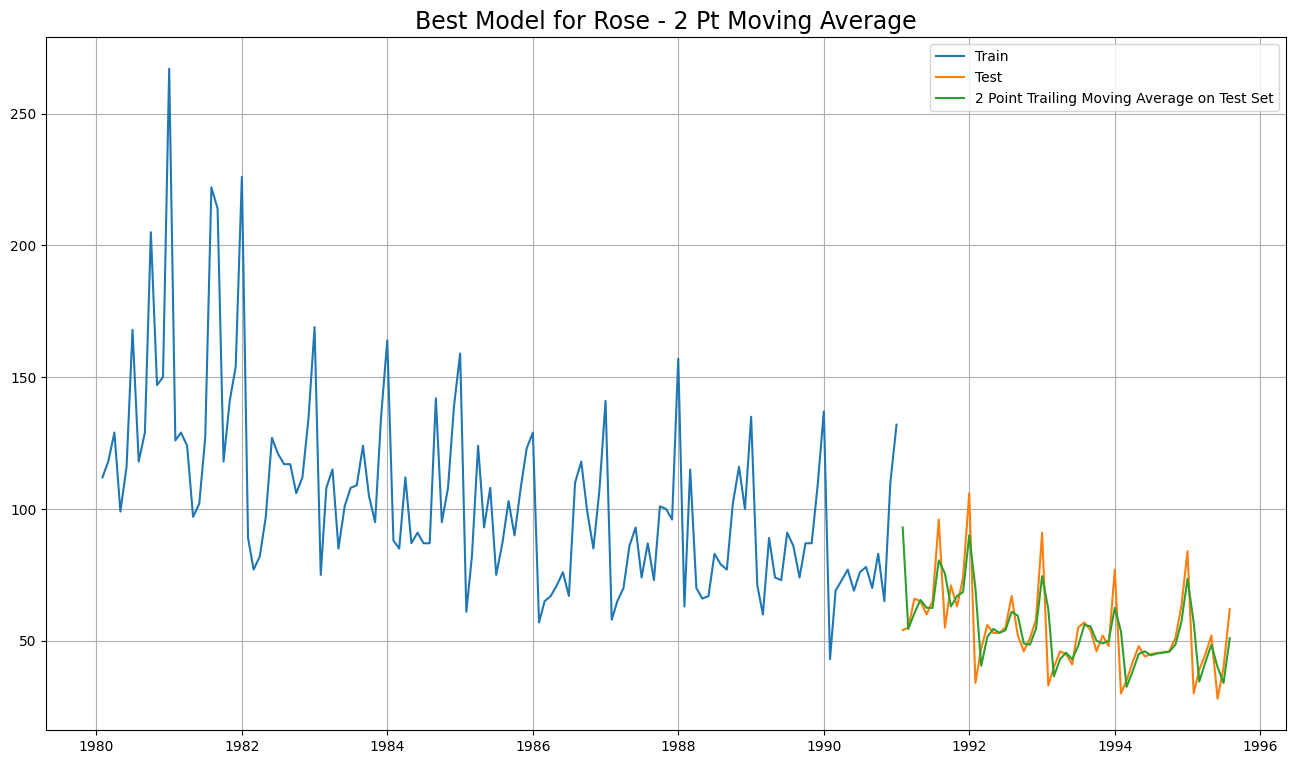

In [391]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')


plt.legend(loc = 'best')
plt.grid();
plt.title('Best Model for Rose - 2 Pt Moving Average', fontsize=17);
plt.savefig('rose_best_model_2pt.jpg', bbox_inches='tight');

In [392]:
dfr1 = MovingAverage.copy()
dfr1.head()

Rose  Trailing_2  forecast_12
1980-01-31  112.0         NaN          NaN
1980-02-29  118.0       115.0        115.0
1980-03-31  129.0       123.5        123.5
1980-04-30   99.0       114.0        114.0
1980-05-31  116.0       107.5        107.5

In [395]:
dfr1.rename(columns = {'Trailing_2':'Rose', 'forecast_12':'forecast'
                            }, inplace = True)

In [396]:
dfr1.head()

Rose   Rose  forecast
1980-01-31  112.0    NaN       NaN
1980-02-29  118.0  115.0     115.0
1980-03-31  129.0  123.5     123.5
1980-04-30   99.0  114.0     114.0
1980-05-31  116.0  107.5     107.5

#FORECAST ON NEXT 12 MONTHS - ROSE

##(Using 2 Pt Moving Average Model)

In [393]:
#dfr1 = pd.read_csv('/content/drive/MyDrive/Python Course/Rose.csv', parse_dates=True,index_col='YearMonth')
#dfr = pd.read_csv('/content/drive/MyDrive/Python Course/Rose.csv') ##  Fill the blank to read the data
dfr1.head()
dfr1.tail()

Rose  Trailing_2  forecast_12
1996-03-01   NaN         NaN          NaN
1996-04-01   NaN         NaN          NaN
1996-05-01   NaN         NaN          NaN
1996-06-01   NaN         NaN          NaN
1996-07-01   NaN         NaN          NaN

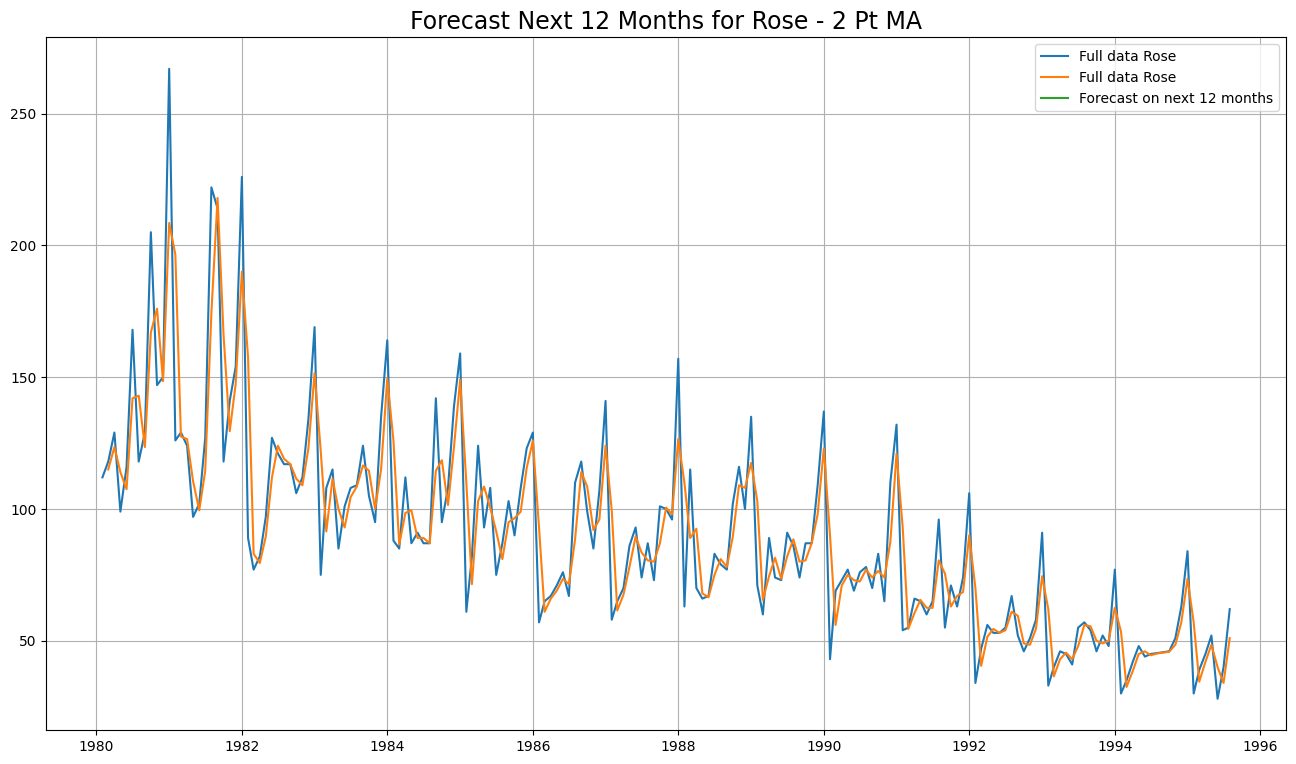

In [397]:
## FORECAST ON NEXT 12 MONTHS

plt.figure(figsize=(16,9))
plt.plot(dfr1['Rose'], label='Full data Rose')
plt.plot(dfr1['forecast'].iloc[-12:], label='Forecast on next 12 months')



plt.legend(loc='best')
plt.grid()
plt.title('Forecast Next 12 Months for Rose - 2 Pt MA', fontsize=17);

plt.savefig('rose_forecast_2ptma.jpg', bbox_inches='tight');

##Holt-Winters - ETS(A, A, M) - Best Model for Sparkling Till Now
###ETS(A, Ad, M) model - Taking MULTIPLICATIVE SEASONALITY

USING DAMPED TREND

In [398]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(dfs,trend='add',seasonal='multiplicative',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07571591750340637, 'smoothing_trend': 0.06489924562418184, 'smoothing_seasonal': 0.2738625830314173, 'damping_trend': 0.9899998705682354, 'initial_level': 2356.5347406793244, 'initial_trend': -13.396006155922343, 'initial_seasons': array([0.77173236, 0.71600393, 0.9173041 , 0.83138204, 0.68225091,
       0.67620719, 0.91532251, 1.1546779 , 0.94410173, 1.26995442,
       1.950702  , 2.52501085]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [401]:
# Forecasting using this model for the duration of the test set
TES_predict_am_damp_spark =  model_TES_am.forecast(steps=12)
TES_predict_am_damp_spark
prediction_1 = TES_predict_am_damp_spark
TES_predict_am_damp_spark.to_csv('spark_forecast_tes.csv')

In [399]:
plt.rcParams["figure.figsize"] = [16,9]

In [402]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(model_TES_am.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(model_TES_am.resid,ddof=1)})
pred_1_df.head()

lower_CI   prediction     upper_ci
1995-08-31  1252.078711  1931.441163  2610.803614
1995-09-30  1672.616279  2351.978730  3031.341182
1995-10-31  2500.098834  3179.461286  3858.823737
1995-11-30  3238.705575  3918.068026  4597.430478
1995-12-31  5306.539443  5985.901895  6665.264346

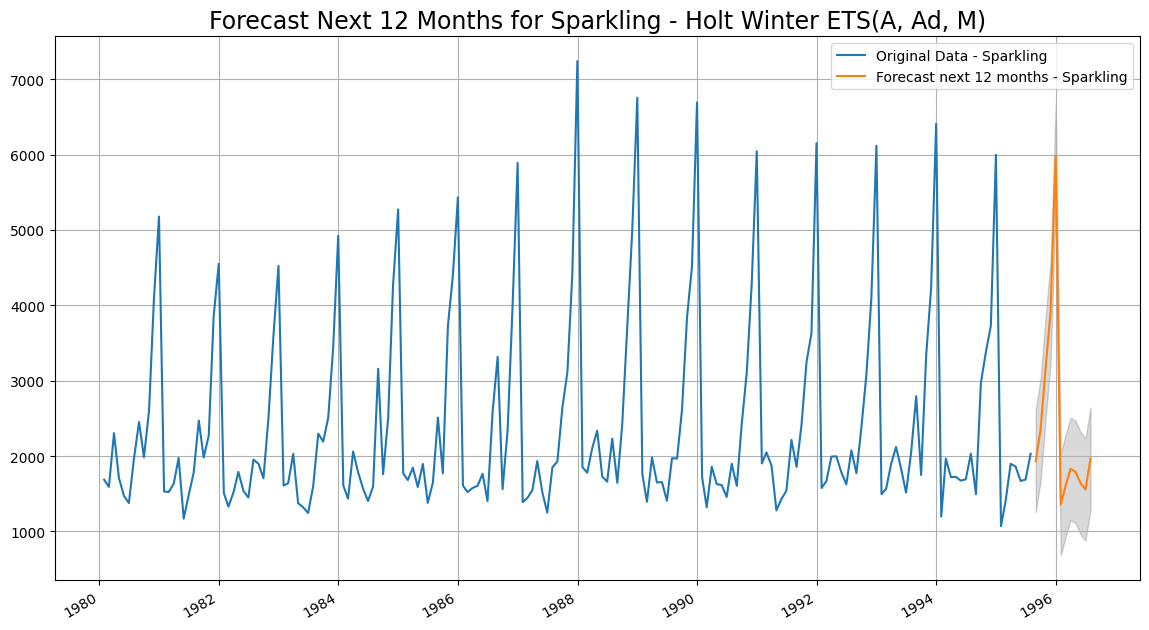

In [403]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(14, 8))
plt.plot(dfs['Sparkling'], label='Original Data - Sparkling')

ax =TES_predict_am_damp_spark.plot(label='Forecast next 12 months - Sparkling')


ax.fill_between(pred_1_df.index,pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)

plt.legend(loc='best')
plt.grid()
plt.title('Forecast Next 12 Months for Sparkling - Holt Winter ETS(A, Ad, M)', fontsize=17);

plt.savefig('spark_forecast_tes.jpg', bbox_inches='tight');

##Building the second most optimum model on ROSE - TES ETS(A, A, A)

Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

In [404]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(dfr,trend='add',seasonal='additive',initialization_method='estimated', damped_trend=False)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.09735117361719348, 'smoothing_trend': 5.507629753484272e-06, 'smoothing_seasonal': 0.0002767929725687986, 'damping_trend': nan, 'initial_level': 145.48998105259932, 'initial_trend': -0.53700374713204, 'initial_seasons': array([-28.14126307, -17.20156253,  -9.04796115, -15.68849474,
       -11.76246934,  -5.79244325,   5.28480569,   5.30230053,
         2.3165333 ,   2.29373567,  17.61244964,  55.0886928 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [405]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES_am.forecast(steps=12)
TES_predict
prediction_1 = TES_predict
TES_predict.to_csv('rose_forecast_tes.csv')

In [406]:
plt.rcParams["figure.figsize"] = [16,9]

In [407]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(model_TES_am.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(model_TES_am.resid,ddof=1)})
pred_1_df.head()

lower_CI  prediction    upper_ci
1995-08-31  15.305048   50.020850   84.736652
1995-09-30  11.783751   46.499553   81.215355
1995-10-31  11.220903   45.936706   80.652508
1995-11-30  26.002003   60.717805   95.433607
1995-12-31  62.946896   97.662698  132.378500

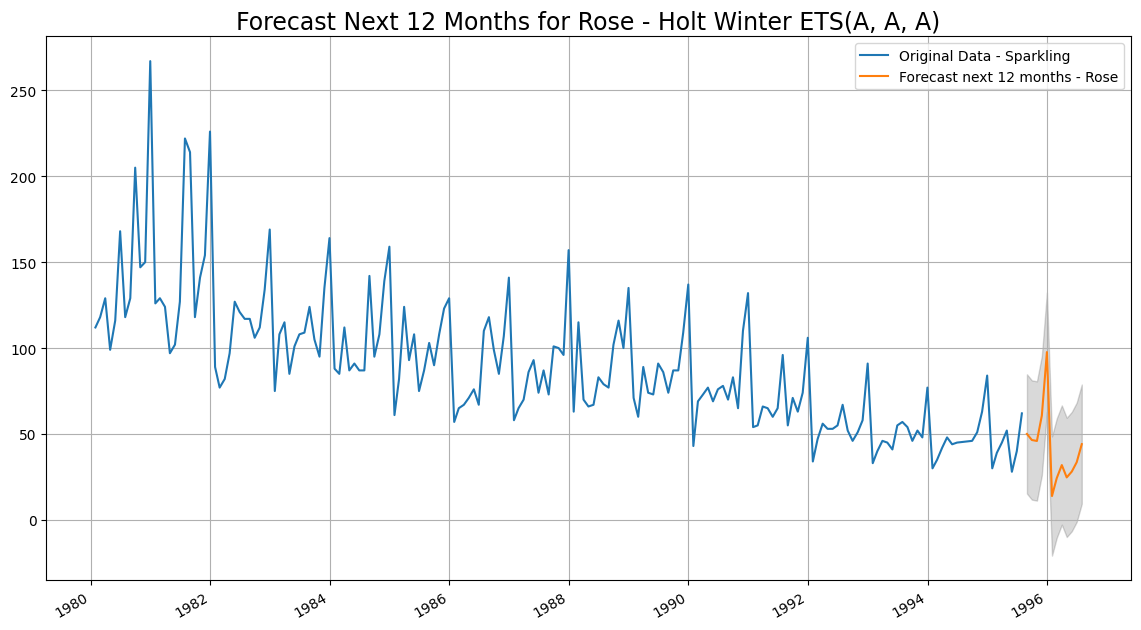

In [408]:
## Plotting the Training data, Test data and the forecasted values

plt.figure(figsize=(14, 8))
plt.plot(dfr['Rose'], label='Original Data - Sparkling')

ax =TES_predict.plot(label='Forecast next 12 months - Rose')


ax.fill_between(pred_1_df.index,pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)

plt.legend(loc='best')
plt.grid()
plt.title('Forecast Next 12 Months for Rose - Holt Winter ETS(A, A, A)', fontsize=17);

plt.savefig('rose_forecast_tes.jpg', bbox_inches='tight');